In [1]:
#CONDA ENV base (python 3.9.7)
#Import packages
#---------------------------------------
import sys
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from Bio import SeqIO
import pyranges as pr


#Import your modules
#---------------------------------------
import te_rna_f as ter
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:11) \n[GCC 9.4.0]'

# Load metadata




In [179]:
# For non-TSO analysis, Male, 10 timepoints (Glu + Gaba)
meta = pd.read_csv('/datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/PEC_RNAmeta.csv')


In [180]:
male_GABA = meta[np.array(meta['sex'] == 'Male') & np.array(meta['Cell Type'] == 'GABA')]
male_GLU = meta[np.array(meta['sex'] == 'Male') & np.array(meta['Cell Type'] == 'GLU')]


In [181]:
zipped_pairs = zip(male_GLU['AGEYEARS'], male_GLU['Sample ID'])
z = [x for x in sorted(zipped_pairs)]
ind = z[::3][2:]
names = np.asarray(ind)[:,1]
ind, names

([(4, '6032'),
  (11, '6285'),
  (15, '1823'),
  (17, '5643'),
  (30, 'Hct16HECA028'),
  (35, '1277'),
  (39, '1241'),
  (58, '1848'),
  (62, '5326'),
  (77, '5744')],
 array(['6032', '6285', '1823', '5643', 'Hct16HECA028', '1277', '1241',
        '1848', '5326', '5744'], dtype='<U21'))

In [182]:
#GLU DATA
male_GLU_df = male_GLU.iloc[[np.where(names[i] == male_GLU['Sample ID'])[0][0] for i in range(len(names))]]
male_GLU_df

Sample ID Cell Type  RIN Bulk tissue RNA RIN#  \
89           6032       GLU  6.5                    7   
91           6285       GLU  3.4                  5.5   
16           1823       GLU  6.1                    7   
71           5643       GLU  5.5                  7.8   
109  Hct16HECA028       GLU  4.2                  8.2   
9            1277       GLU  5.9                  8.9   
93           1241       GLU  4.4                  7.9   
18           1848       GLU  5.2                  7.8   
55           5326       GLU  5.1                  7.3   
73           5744       GLU  3.4                  9.5   

    RNAseq Library Prep Date Date  batch  \
89                      1/27/2022     10   
91                      2/16/2022     14   
16                      3/17/2022     18   
71                      3/17/2022     18   
109                     2/16/2022     14   
9                       3/10/2022     17   
93                      1/27/2022     10   
18                     11/29/2021      6   
55                       2/9/2022     13   
73                      3/25/2022     20   

                                            Brain Bank            DISORDER  \
89   University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
91   University of Maryland Brain and Tissue Bank(U...                 NaN   
16   University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
71   University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
109         University of Miami's Brain Endowment Bank  UNAFFECTED CONTROL   
9    University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
93                                     MSSM Brain Bank  Unaffected Control   
18   University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
55   University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
73   Human Brain and Spinal Fluid Resource Center (...  Unaffected Control   

                                             CDEATHOFF  AGEYEARS  AGEDAYS  \
89                                Head & Neck injuries         4     51.0   
91     Traumatic arrest/blunt trauma (ped. vs vehicle)        11     25.0   
16                                   Multiple Injuries        15    128.0   
71         Cardiac Arrhythmia due to conduction system        17    123.0   
109  Hypertensive and Atherosclerotic Cardiovascula...        30    279.0   
9      ASCVD (Arteriosclerotic Cardiovascular Disease)        35     27.0   
93                            manner of death: natural        39      NaN   
18                                              HASCVD        58     49.0   
55                                      Torso Injuries        62    107.0   
73                                        Undetermined        77      NaN   

      sex                       race Brain PH  PMI Hours            sample  \
89   Male                      White     6.34       25.0          6032-GLU   
91   Male                      White     7.02        8.0          6285-GLU   
16   Male                      White     5.55       18.0          1823-GLU   
71   Male  Black or African-American       ND       14.0          5643-GLU   
109  Male  Black or African-American     6.58       20.8  Hct16HECA028-GLU   
9    Male                      White     5.47       20.0          1277-GLU   
93   Male                      White        7       20.6          1241-GLU   
18   Male  Black or African-American     6.02        9.0          1848-GLU   
55   Male                      White     6.02        6.0          5326-GLU   
73   Male                      White      6.6       22.0          5744-GLU   

             period  
89   earlychildhood  
91    latechildhood  
16      adolescence  
71      adolescence  
109       adulthood  
9         adulthood  
93        adulthood  
18    lateadulthood  
55    lateadulthood  
73    lateadulthood

In [99]:
#GABA DATA
male_GABA_df = male_GABA.iloc[[np.where(names[i] == male_GABA['Sample ID'])[0][0] for i in range(len(names))]]
male_GABA_df

Sample ID Cell Type  RIN Bulk tissue RNA RIN#  \
88           6032      GABA  6.6                    7   
90           6285      GABA  4.4                  5.5   
15           1823      GABA  5.8                    7   
70           5643      GABA  5.4                  7.8   
108  Hct16HECA028      GABA  4.2                  8.2   
8            1277      GABA  5.6                  8.9   
92           1241      GABA  4.8                  7.9   
17           1848      GABA  5.2                  7.8   
54           5326      GABA  4.3                  7.3   
72           5744      GABA  3.4                  9.5   

    RNAseq Library Prep Date Date  batch  \
88                      1/27/2022     10   
90                      2/16/2022     14   
15                      3/17/2022     18   
70                      3/17/2022     18   
108                     2/16/2022     14   
8                       3/10/2022     17   
92                      1/27/2022     10   
17                     11/29/2021      6   
54                       2/9/2022     13   
72                      3/25/2022     20   

                                            Brain Bank            DISORDER  \
88   University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
90   University of Maryland Brain and Tissue Bank(U...                 NaN   
15   University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
70   University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
108         University of Miami's Brain Endowment Bank  UNAFFECTED CONTROL   
8    University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
92                                     MSSM Brain Bank  Unaffected Control   
17   University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
54   University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
72   Human Brain and Spinal Fluid Resource Center (...  Unaffected Control   

                                             CDEATHOFF  AGEYEARS  AGEDAYS  \
88                                Head & Neck injuries         4     51.0   
90     Traumatic arrest/blunt trauma (ped. vs vehicle)        11     25.0   
15                                   Multiple Injuries        15    128.0   
70         Cardiac Arrhythmia due to conduction system        17    123.0   
108  Hypertensive and Atherosclerotic Cardiovascula...        30    279.0   
8      ASCVD (Arteriosclerotic Cardiovascular Disease)        35     27.0   
92                            manner of death: natural        39      NaN   
17                                              HASCVD        58     49.0   
54                                      Torso Injuries        62    107.0   
72                                        Undetermined        77      NaN   

      sex                       race Brain PH  PMI Hours             sample  \
88   Male                      White     6.34       25.0          6032-GABA   
90   Male                      White     7.02        8.0          6285-GABA   
15   Male                      White     5.55       18.0          1823-GABA   
70   Male  Black or African-American       ND       14.0          5643-GABA   
108  Male  Black or African-American     6.58       20.8  Hct16HECA028-GABA   
8    Male                      White     5.47       20.0          1277-GABA   
92   Male                      White        7       20.6          1241-GABA   
17   Male  Black or African-American     6.02        9.0          1848-GABA   
54   Male                      White     6.02        6.0          5326-GABA   
72   Male                      White      6.6       22.0          5744-GABA   

             period  
88   earlychildhood  
90    latechildhood  
15      adolescence  
70      adolescence  
108       adulthood  
8         adulthood  
92        adulthood  
17    lateadulthood  
54    lateadulthood  
72    lateadulthood

In [11]:
prac = pd.read_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/ATEM_counts.csv', index_col=0)
prac

1105-GABA  1105-GLU  1133-GABA  1133-GLU  1134-GABA  1134-GLU  \
element                                                                   
L1PA3           577       459       1035       930        613       641   
L1PA5           668       521       1168       901        793       597   
L1HS            906       527       2233      1879       1083      1124   
L1PA6           373       283        530       525        359       345   
L1PA7           398       440        738       624        466       442   
...             ...       ...        ...       ...        ...       ...   
AluYk12          48        55        147        89        122        45   
FLAM_C            1         1          2        13          4         3   
MIR1_Amn          7         2          1         6          9         1   
AluYh7           23         0         97        55          6        22   
AluYh9            3         0          9         4          3         1   

          1275-GABA  1275-GLU  1277-GABA  1277-GLU  ...  Hct16HCQA020-GABA  \
element                                             ...                      
L1PA3           883       620        565       664  ...                672   
L1PA5           838       480        583       695  ...               1014   
L1HS           1561      1073        954      1340  ...               1432   
L1PA6           440       174        324       361  ...                431   
L1PA7           626       402        407       454  ...                516   
...             ...       ...        ...       ...  ...                ...   
AluYk12          40        29         30       166  ...                 98   
FLAM_C            1         5          7         3  ...                  4   
MIR1_Amn          5         7          9         2  ...                  3   
AluYh7           31        86         34        48  ...                 49   
AluYh9            1         8          2         3  ...                  3   

          Hct16HCQA020-GLU  Hct16HECA028-GABA  Hct16HECA028-GLU  \
element                                                           
L1PA3                  619                562               543   
L1PA5                  730                643               686   
L1HS                  1104               1151              1084   
L1PA6                  392                317               334   
L1PA7                  358                485               402   
...                    ...                ...               ...   
AluYk12                 79                 58                56   
FLAM_C                   3                  2                 3   
MIR1_Amn                 2                  2                 4   
AluYh7                   1                  8                 4   
AluYh9                   1                  2                 2   

          Hct17HEIA010-GABA  Hct17HEIA010-GLU  HctYPA008-GABA  HctYPA008-GLU  \
element                                                                        
L1PA3                   738               568             679            778   
L1PA5                   936               610             975            862   
L1HS                    964              1001             987           1228   
L1PA6                   507               360             497            489   
L1PA7                   524               442             435            531   
...                     ...               ...             ...            ...   
AluYk12                 129                35              31             28   
FLAM_C                    1                 1               2              1   
MIR1_Amn                  5                 1               1              1   
AluYh7                   26                31               9              9   
AluYh9                    2                 2               0              0   

          HctZZNA014-GABA  HctZZNA014-GLU  
element                                    
L1PA3             

In [ ]:
prac.loc['']

# TE RNA over lifespan

### Psychencode Bulk
* check that you are using DESEQ correctly

In [2]:
# Metadata
meta = pd.read_csv('/datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/PEC_RNAmeta.csv')
ev_df = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/evolutionary_age.csv')
meta

Sample ID Cell Type  RIN Bulk tissue RNA RIN#  \
0            1105      GABA  6.5                  9.1   
1            1105       GLU  6.2                  9.1   
2            1133      GABA  5.8                  9.1   
3            1133       GLU  5.7                  9.1   
4            1134      GABA  5.3                  8.9   
..            ...       ...  ...                  ...   
111  Hct17HEIA010       GLU  4.2                  9.6   
112     HctYPA008      GABA  2.3                  9.4   
113     HctYPA008       GLU  2.2                  9.4   
114    HctZZNA014      GABA  3.8                  8.7   
115    HctZZNA014       GLU  3.7                  8.7   

    RNAseq Library Prep Date Date  batch  \
0                       3/25/2022     20   
1                       3/25/2022     20   
2                      11/15/2021      4   
3                      11/15/2021      4   
4                       2/16/2022     14   
..                            ...    ...   
111                     3/10/2022     17   
112                     3/22/2022     19   
113                     3/22/2022     19   
114                      4/1/2022     21   
115                      4/1/2022     21   

                                            Brain Bank            DISORDER  \
0    University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
1    University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
2    University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
3    University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
4    University of Maryland Brain and Tissue Bank(U...  Unaffected Control   
..                                                 ...                 ...   
111         University of Miami's Brain Endowment Bank  UNAFFECTED CONTROL   
112         University of Miami's Brain Endowment Bank  UNAFFECTED CONTROL   
113         University of Miami's Brain Endowment Bank  UNAFFECTED CONTROL   
114         University of Miami's Brain Endowment Bank  UNAFFECTED CONTROL   
115         University of Miami's Brain Endowment Bank  UNAFFECTED CONTROL   

                                             CDEATHOFF  AGEYEARS  AGEDAYS  \
0                                    Multiple Injuries        16    341.0   
1                                    Multiple Injuries        16    341.0   
2                                 Cocaine intoxication        38    178.0   
3                                 Cocaine intoxication        38    178.0   
4      ASCVD (Arteriosclerotic Cardiovascular Disease)        41    252.0   
..                                                 ...       ...      ...   
111       Complications of Treatment for Food Asphyxia         3     70.0   
112  Coronary Artery Disease; Aortic Valve Replacem...        75    193.0   
113  Coronary Artery Disease; Aortic Valve Replacem...        75    193.0   
114  Cardiac Tamponade; Lg Pericardial Effusion; Co...        39     68.0   
115  Cardiac Tamponade; Lg Pericardial Effusion; Co...        39     68.0   

        sex   race Brain PH  PMI Hours            sample          period  
0      Male  White     5.13       17.0         1105-GABA     adolescence  
1      Male  White     5.13       17.0          1105-GLU     adolescence  
2      Male  White     5.45        9.0         1133-GABA       adulthood  
3      Male  White     5.45        9.0          1133-GLU       adulthood  
4      Male  White     5.89       15.0         1134-GABA       adulthood  
..      ...    ...      ...        ...               ...             ...  
111  Female  White     6.45       14.2  Hct17HEIA010-GLU  earlychildhood  
112    Male  White     6.21       14.2    HctYPA008-GABA   lateadulthood  
113    Male  White     6.21       14.2     HctYPA008-GLU   lateadulthood  
114  Female  White     6.22       21.7   HctZZNA014-GABA       adulthood  
115  Female  White     6.22       21.7    HctZZNA014-GLU       adulthood  

[116 rows x 17 columns]

In [4]:
ID_l = meta['sample'].values
ID_l

array(['1105-GABA', '1105-GLU', '1133-GABA', '1133-GLU', '1134-GABA',
       '1134-GLU', '1275-GABA', '1275-GLU', '1277-GABA', '1277-GLU',
       '1535-GLU', '1539-GABA', '1539-GLU', '1648-GABA', '1648-GLU',
       '1823-GABA', '1823-GLU', '1848-GABA', '1848-GLU', '3739-GLU',
       '4321-GABA', '4321-GLU', '4332-GABA', '4332-GLU', '4337-GABA',
       '4337-GLU', '4369-GABA', '4369-GLU', '4379-GABA', '4379-GLU',
       '4411-GABA', '4411-GLU', '4414-GABA', '4414-GLU', '4425-GABA',
       '4425-GLU', '4428-GABA', '4428-GLU', '4545-GABA', '4545-GLU',
       '4725-GABA', '4725-GLU', '5077-GABA', '5077-GLU', '5086-GABA',
       '5086-GLU', '5161-GABA', '5161-GLU', '5184-GABA', '5184-GLU',
       '5293-GABA', '5293-GLU', '5309-GABA', '5309-GLU', '5326-GABA',
       '5326-GLU', '5387-GABA', '5387-GLU', '5401-GABA', '5401-GLU',
       '5446-GABA', '5446-GLU', '5451-GABA', '5451-GLU', '5570-GABA',
       '5570-GLU', '5606-GABA', '5606-GLU', '5617-GABA', '5617-GLU',
       '5643-GABA', '5643-GL

In [5]:
#Load in PE data for each sample
ID_l = meta['sample'].values
parent_path = '/cndd3/dburrows/DATA/te/rna/PE.counts/ATEM/'
te = ev_df['element'].values
dict = {'element':te}
for ID in ID_l:
    te_v = ter.load_ATEM_family(parent_path + '/Sample_' + ID + '/ATEM_counts.csv', te)
    assert len(te) == len(te_v), 'Error: Not all TE elements were counted'
    #Add to dict
    dict[ID] = te_v
df = pd.DataFrame(dict)
#set first column to index
df.set_index('element', inplace=True)
df = df.astype(int)

#write to csv
df.to_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/ATEM_counts.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [19]:
# make design matrix 
# only keep some columns in meta
dm = meta[['Cell Type', 'sex', 'race', 'AGEYEARS']]
dm['race'][dm['race'] !='White'] = 'Black'
age_ = dm['AGEYEARS'].values
new_age = (age_ - np.mean(age_))/np.std(age_)
dm['AGEYEARS'] = new_age
dm.index = meta['sample'].values
dm.to_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/ATEM_design.csv')

/tmp/ipykernel_2210194/1278423337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm['race'][dm['race'] !='White'] = 'Black'
/tmp/ipykernel_2210194/1278423337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm['AGEYEARS'] = new_age


In [9]:
#Load in CPMS
df = pd.read_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/ATEM_CPM.csv', index_col=0)
#Load in evolutionary age
evol_age = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/evolutionary_age.csv')
#Load in DESEQ2 results
# age_res = pd.read_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/DESEQ_age.csv', index_col=0)
# cell_res = pd.read_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/DESEQ_cell.csv', index_col=0)
# sex_res = pd.read_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/DESEQ_sex.csv', index_col=0)
# race_res = pd.read_csv('/cndd3/dburrows/DATA/te/rna/PE.counts/DESEQ/DESEQ_race.csv', index_col=0)


KeyError: 'evolutionary_age'

In [ ]:
#######
#AGE
#######

In [94]:
age_res['geneid'] = age_res.index
age_res

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj  \
L1PA3      684.236024        0.001709  0.020077  0.085126  0.932161  0.973136   
L1PA5      739.871915        0.033541  0.023097  1.452163  0.146456  0.479771   
L1HS      1301.311557       -0.017488  0.032150 -0.543928  0.586491  0.785265   
L1PA6      374.712410        0.055358  0.029155  1.898761  0.057596  0.360417   
L1PA7      472.124195        0.023063  0.019431  1.186886  0.235273  0.601867   
...               ...             ...       ...       ...       ...       ...   
AluYk12     67.902751       -0.248245  0.067740 -3.664664  0.000248  0.011764   
FLAM_C       3.004916        0.051090  0.119096  0.428981  0.667937  0.857462   
MIR1_Amn     4.336755       -0.131075  0.100971 -1.298145  0.194238  0.542722   
AluYh7      31.173214        0.068319  0.128566  0.531390  0.595149  0.785265   
AluYh9       2.402415        0.149128  0.135544  1.100216  0.271238  0.613515   

            geneid  
L1PA3        L1PA3  
L1PA5        L1PA5  
L1HS          L1HS  
L1PA6        L1PA6  
L1PA7        L1PA7  
...            ...  
AluYk12    AluYk12  
FLAM_C      FLAM_C  
MIR1_Amn  MIR1_Amn  
AluYh7      AluYh7  
AluYh9      AluYh9  

[95 rows x 7 columns]

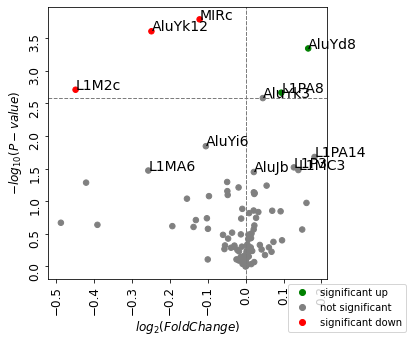

In [120]:
from bioinfokit import analys, visuz
age_res['geneid'] = age_res.index
normp_inadj = np.max(age_res['pvalue'][age_res['padj'] < 0.05])

# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=age_res, lfc='log2FoldChange', pv='pvalue', dim = (5,5), dotsize=30, 
                             geneid = 'geneid', genenames = tuple(age_res[age_res['pvalue'] < 0.05]['geneid'].values), 
                             valpha = 1,gstyle=1, sign_line=True
                             ,plotlegend=True, legendpos='upper right',
                             legendanchor=(1.30,0), pv_thr = (normp_inadj,normp_inadj), lfc_thr=(0,0), 
                             axtickfontsize=12, axlabelfontsize=12, gfont=14, figtype='svg', figname=s_fig + '/ATEM_PE_age', show=True)
                            

In [176]:
pos_df = df.iloc[np.where((age_res['padj'] < 0.05) & (age_res['log2FoldChange'] > 0))[0]]
neg_df = df.iloc[np.where((age_res['padj'] < 0.05) & (age_res['log2FoldChange'] < 0))[0]]

In [175]:
neg_df

1105-GABA  1105-GLU  1133-GABA  1133-GLU  1134-GABA  1134-GLU  \
element                                                                  
L1M2c     0.013352  0.029091   0.011897  0.034853   0.000000  0.039379   
MIRc      1.356559  1.331740   1.660776  1.452227   2.328950  1.676899   
AluYk12   0.129514  0.180259   0.350317  0.259997   0.397876  0.149860   

         1275-GABA  1275-GLU  1277-GABA  1277-GLU  ...  Hct16HCQA020-GABA  \
element                                            ...                      
L1M2c     0.013249  0.000000   0.012650  0.032387  ...           0.000000   
MIRc      1.841645  2.141771   1.457947  1.432222  ...           1.189654   
AluYk12   0.134149  0.108694   0.096459  0.597899  ...           0.280930   

         Hct16HCQA020-GLU  Hct16HECA028-GABA  Hct16HECA028-GLU  \
element                                                          
L1M2c            0.006852           0.000000          0.035663   
MIRc             0.955790           1.280434          1.333815   
AluYk12          0.272349           0.200418          0.201499   

         Hct17HEIA010-GABA  Hct17HEIA010-GLU  HctYPA008-GABA  HctYPA008-GLU  \
element                                                                       
L1M2c             0.008853          0.034910        0.003840       0.006691   
MIRc              1.915131          1.815332        1.167358       1.124079   
AluYk12           0.383124          0.139447        0.122240       0.095458   

         HctZZNA014-GABA  HctZZNA014-GLU  
element                                   
L1M2c           0.000000        0.019286  
MIRc            1.465882        1.539061  
AluYk12         0.254000        0.271618  

[3 rows x 116 columns]

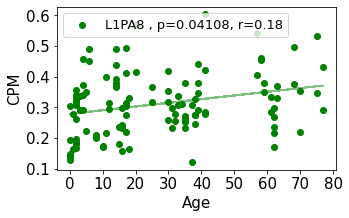

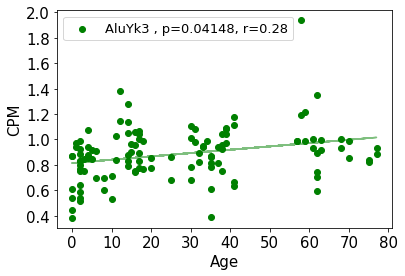

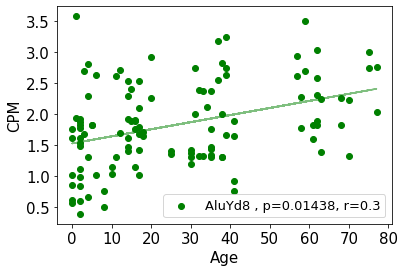

In [185]:
#Visualise up and down regulated genes with age
curr_df = pos_df
col = 'green'
#plot each plot as a panel on a subplot
fig,ax = plt.subplots(figsize=(5,3))
for x,c in enumerate(curr_df.index.values):
    plt.scatter(age, curr_df.loc[c].values, alpha=1, c=col, label=c + ' , p=' + np.round(age_res[age_res['padj'] < 0.05].loc[c]['padj'],5).astype(str) + ', r=' + np.round(stat[pval < 0.05][x],2).astype(str))
    #fit linear regression line to data
    slope, intercept, r_value, p_value, std_err = stats.linregress(age, curr_df.loc[c].values)
    plt.plot(age, intercept + slope*age, c=col, alpha=0.5)

    plt.legend(fontsize=13)
    plt.xlabel('Age', fontsize=15)
    plt.ylabel('CPM', fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.savefig(s_fig + '/UP_ATEM_PE_age_scatter' + str(x)+'.svg', transparent=True)
    plt.show()


In [15]:
sort_, sort_name = adm.sort_2list(ev_df['age'][ev_df['family']=='LINE'], ev_df['element'][ev_df['family']=='LINE'])
sort_name[:5]

['L1HS', 'L1PA2', 'L1PA3', 'L1PA4', 'L1PA5']

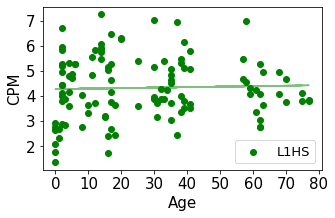

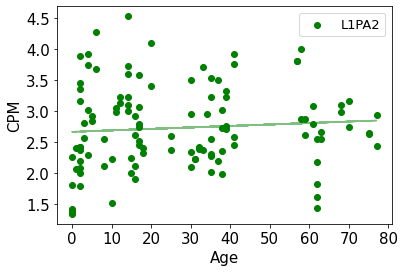

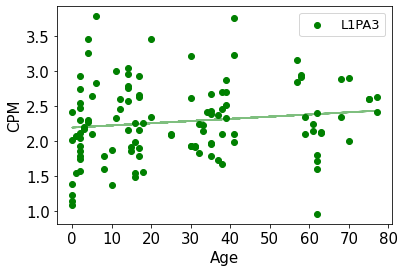

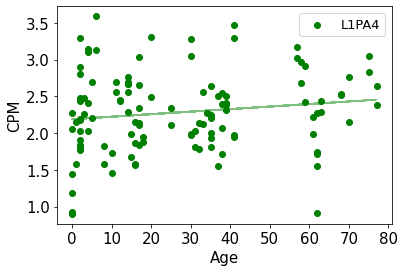

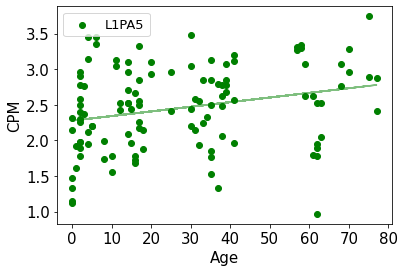

In [23]:
#Plot youngest elements
age = meta['AGEYEARS'].values
from scipy import stats

#Visualise up and down regulated genes with age
curr_df = df
col = 'green'
#plot each plot as a panel on a subplot
fig,ax = plt.subplots(figsize=(5,3))
for x,c in enumerate(sort_name[:5]):
    plt.scatter(age, curr_df.loc[c].values, alpha=1, c=col, label=c)
    #fit linear regression line to data
    slope, intercept, r_value, p_value, std_err = stats.linregress(age, curr_df.loc[c].values)
    plt.plot(age, intercept + slope*age, c=col, alpha=0.5)

    plt.legend(fontsize=13)
    plt.xlabel('Age', fontsize=15)
    plt.ylabel('CPM', fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    #plt.savefig(s_fig + '/UP_ATEM_PE_age_scatter' + str(x)+'.svg', transparent=True)
    plt.show()


In [ ]:
#Plot L!HS

#Visualise up and down regulated genes with age
curr_df = pos_df
col = 'green'
#plot each plot as a panel on a subplot
fig,ax = plt.subplots(figsize=(5,3))
for x,c in enumerate(curr_df.index.values):
    plt.scatter(age, curr_df.loc[c].values, alpha=1, c=col, label=c + ' , p=' + np.round(age_res[age_res['padj'] < 0.05].loc[c]['padj'],5).astype(str) + ', r=' + np.round(stat[pval < 0.05][x],2).astype(str))
    #fit linear regression line to data
    slope, intercept, r_value, p_value, std_err = stats.linregress(age, curr_df.loc[c].values)
    plt.plot(age, intercept + slope*age, c=col, alpha=0.5)

    plt.legend(fontsize=13)
    plt.xlabel('Age', fontsize=15)
    plt.ylabel('CPM', fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.savefig(s_fig + '/UP_ATEM_PE_age_scatter' + str(x)+'.svg', transparent=True)
    plt.show()


In [6]:
#Load in evolutionary age
evol_age = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/evolutionary_age.csv')



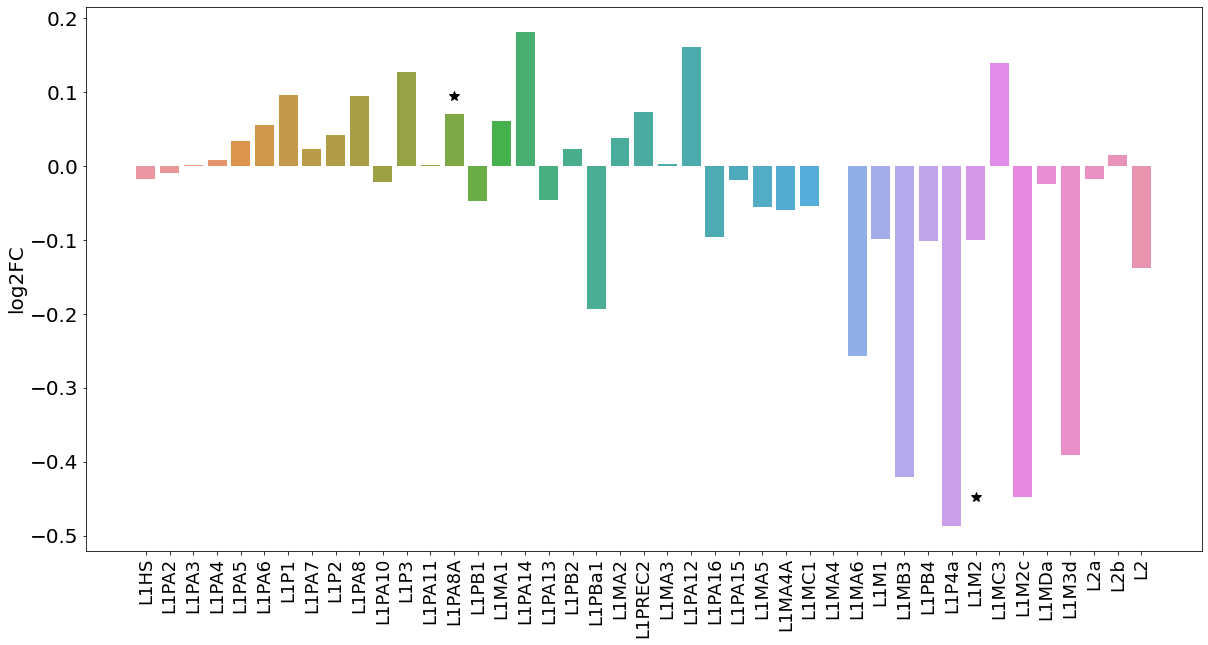

In [110]:
str_arg = 'LINE'
sub_ = age_res.loc[(evol_age['family'] == str_arg).values]
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sub_, x=sub_.index, y="log2FoldChange", order=sort_name)
# add * symbol above bars with p < 0.05
plt.plot(np.where(sub_['padj'] < 0.05)[0], sub_[sub_['padj'] < 0.05]['log2FoldChange'], '*', color='k', markersize=10)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('log2FC', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
plt.savefig(s_fig + '/ATEM_PE_LINE_age_bar.svg', transparent=True)
plt.show()

In [7]:
# Log FC against evol age
str_arg = 'LINE'
sub_ = age_res.loc[(evol_age['family'] == str_arg).values]
#sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)


In [29]:
#pearson correlation
from scipy import stats
stat, pval = stats.pearsonr(evol_age[evol_age['family'] == str_arg]['age'].values, sub_['log2FoldChange'].values)
stat, pval

(-0.4208367778441728, 0.004952660064706171)

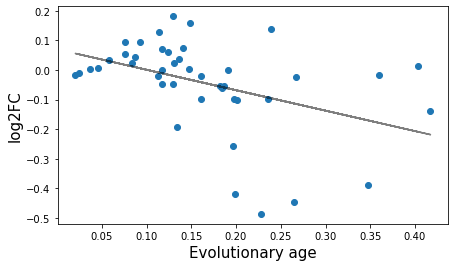

In [27]:
plt.subplots(figsize=(7,4))
plt.scatter(evol_age[evol_age['family'] == str_arg]['age'].values, sub_['log2FoldChange'].values)
#fit linear regression line to data
slope, intercept, r_value, p_value, std_err = stats.linregress(evol_age[evol_age['family'] == str_arg]['age'].values, sub_['log2FoldChange'].values)
#plot line
plt.plot(evol_age[evol_age['family'] == str_arg]['age'].values, intercept + slope*evol_age[evol_age['family'] == str_arg]['age'].values, c='k', alpha=0.5)
plt.xlabel('Evolutionary age', fontsize=15)
plt.ylabel('log2FC', fontsize=15)
plt.savefig(s_fig + '/ATEM_PE_LINE_age_scatter.svg', transparent=True)
plt.show()

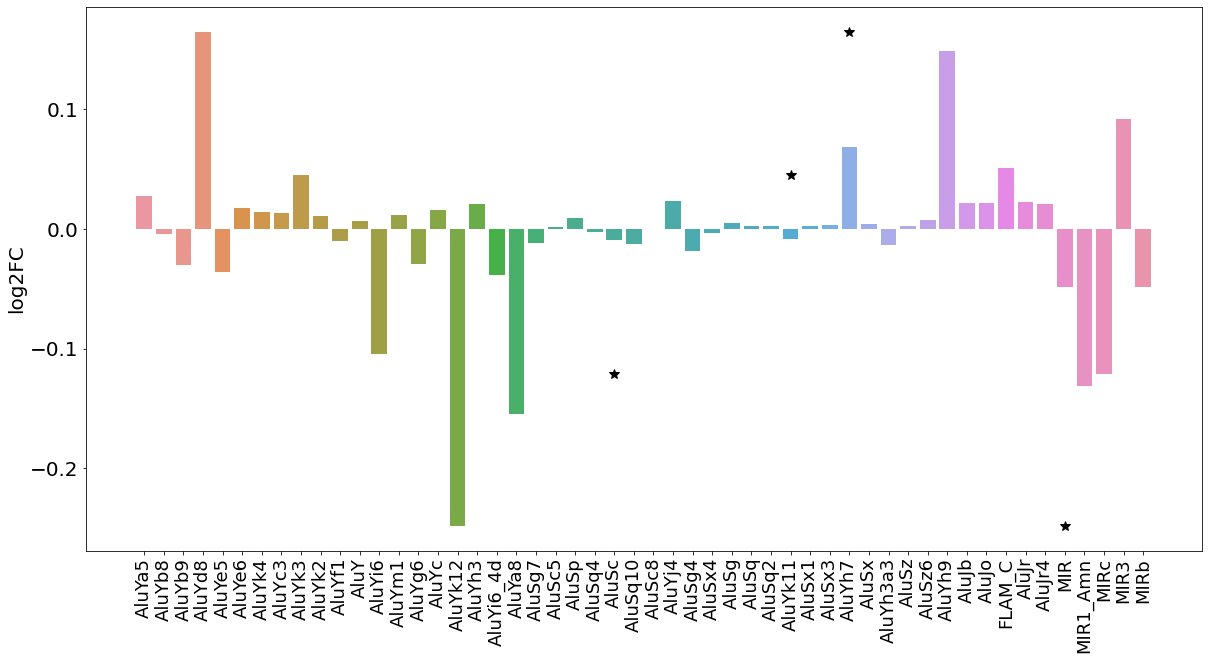

In [111]:
str_arg = 'SINE'
sub_ = age_res.loc[(evol_age['family'] == str_arg).values]
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sub_, x=sub_.index, y="log2FoldChange", order=sort_name)
# add * symbol above bars with p < 0.05
plt.plot(np.where(sub_['padj'] < 0.05)[0], sub_[sub_['padj'] < 0.05]['log2FoldChange'], '*', color='k', markersize=10)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('log2FC', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
plt.savefig(s_fig + '/ATEM_PE_SINE_age_bar.svg', transparent=True)
plt.show()

In [28]:
# Calculate spearman's correlation for each subfamily
import scipy.stats as stats
import mne 
age = meta['AGEYEARS'].values
res = stats.spearmanr(np.reshape(age, (1,len(age))), np.asarray(df), axis=1)
stat = res.statistic[1:,0]
pval = res.pvalue[1:,0]

sig_v, adj_p_vals = mne.stats.fdr_correction(pval, 0.05, 'indep') #Use Benjamini hochberg FDR test 

spear_age_res = pd.DataFrame({'stat':stat, 'pval':pval, 'adj_pval':adj_p_vals}, index=df.index.values)
spear_age_res['geneid'] = spear_age_res.index
spear_age_res


stat      pval  adj_pval    geneid
L1PA3     0.182499  0.049904  0.131690     L1PA3
L1PA5     0.282478  0.002124  0.033637     L1PA5
L1HS      0.067023  0.474701  0.570843      L1HS
L1PA6     0.303004  0.000946  0.024372     L1PA6
L1PA7     0.226553  0.014465  0.072324     L1PA7
...            ...       ...       ...       ...
AluYk12  -0.121594  0.193513  0.311588   AluYk12
FLAM_C    0.090433  0.334334  0.460314    FLAM_C
MIR1_Amn -0.071876  0.443238  0.546852  MIR1_Amn
AluYh7    0.127373  0.173025  0.291192    AluYh7
AluYh9    0.168438  0.070696  0.149247    AluYh9

[95 rows x 4 columns]

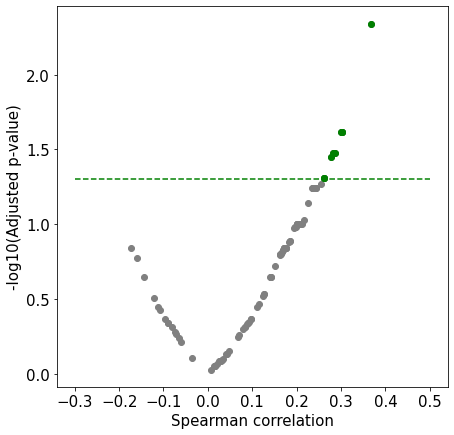

In [53]:
plt.subplots(figsize=(7,7))
plt.scatter(spear_age_res['stat'], -1*np.log10(spear_age_res['adj_pval']), c = 'grey')
plt.scatter(spear_age_res['stat'][spear_age_res['adj_pval'] < 0.05], -1*np.log10(spear_age_res['adj_pval'][spear_age_res['adj_pval'] < 0.05]), c = 'green')
#add horizontal red line at -log10(0.05)
plt.plot([-0.3,0.5], [-1*np.log10(0.05), -1*np.log10(0.05)], c='green', linestyle='--')
plt.ylabel('-log10(Adjusted p-value)', fontsize=15)
plt.xlabel('Spearman correlation', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(s_fig + '/ATEM_PE_age_spearman.svg', transparent=True)
plt.show()

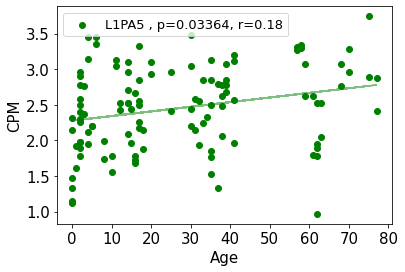

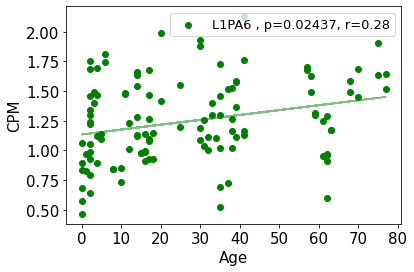

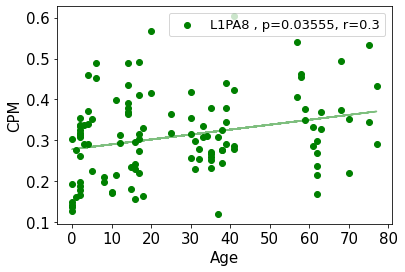

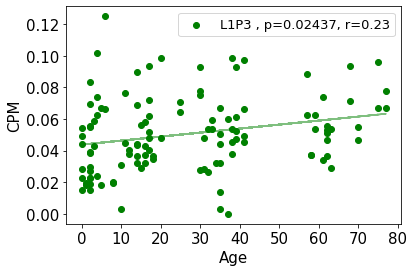

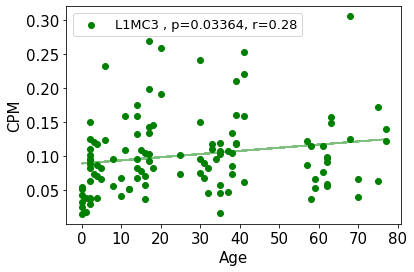

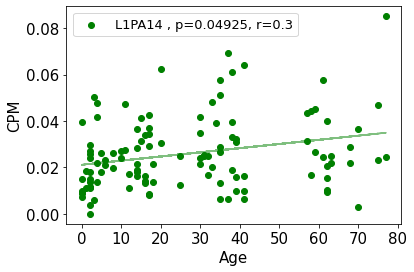

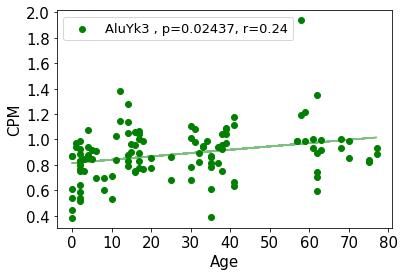

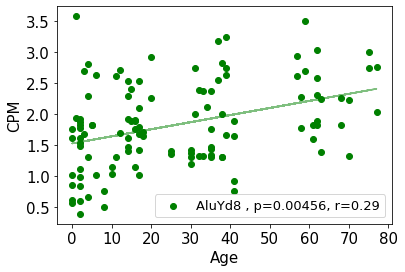

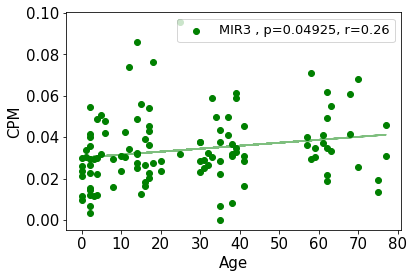

In [196]:
#Visualise up and down regulated genes with age
curr_df = df[sig_v]
col = 'green'
age=age

for x,c in enumerate(curr_df.index.values):
    plt.scatter(age, curr_df.loc[c].values, alpha=1, c=col, label=c + ' , p=' + np.round(adj_p_vals[sig_v][x],5).astype(str) + ', r=' + np.round(stat[pval < 0.05][x],2).astype(str))
    slope, intercept, r_value, p_value, std_err = stats.linregress(age, curr_df.loc[c].values)
    plt.plot(age, intercept + slope*age, c=col, alpha=0.5)

    plt.legend(fontsize=13)
    plt.xlabel('Age', fontsize=15)
    plt.ylabel('CPM', fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.savefig(s_fig + '/UP_spearman_ATEM_PE_age_scatter' + str(x)+'.svg', transparent=True)
    plt.show()

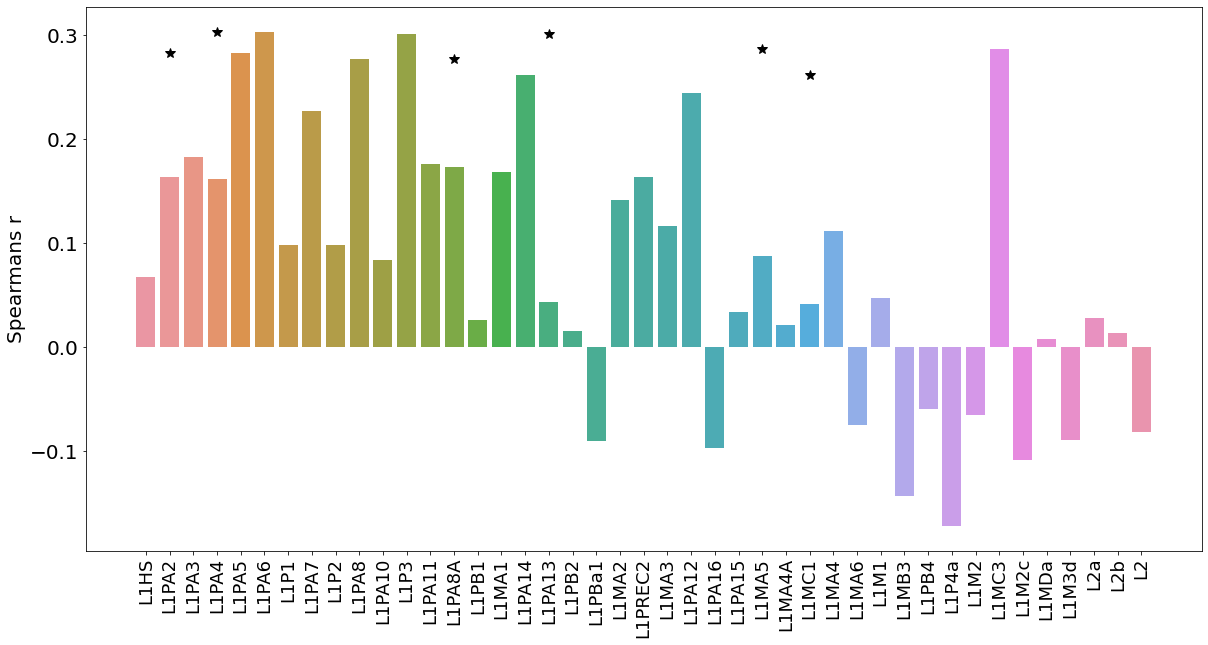

In [121]:
str_arg = 'LINE'
sub_ = spear_age_res.loc[(evol_age['family'] == str_arg).values]
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sub_, x=sub_.index, y="stat", order=sort_name)
# add * symbol above bars with p < 0.05
plt.plot(np.where(sub_['adj_pval'] < 0.05)[0], sub_[sub_['adj_pval'] < 0.05]['stat'], '*', color='k', markersize=10)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('Spearmans r', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
plt.savefig(s_fig + '/ATEM_PE_LINE-spear_age_bar.svg', transparent=True)
plt.show()

In [32]:
str_arg = 'LINE'
sub_ = spear_age_res.loc[(evol_age['family'] == str_arg).values]

#pearson correlation
from scipy import stats
stat, pval = stats.pearsonr(evol_age[evol_age['family'] == str_arg]['age'].values, sub_['stat'].values)
stat,pval

(-0.5467586621361096, 0.00014853516577260985)

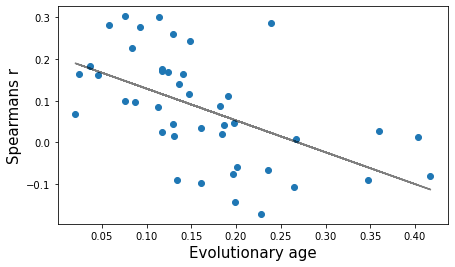

In [33]:

plt.subplots(figsize=(7,4))
plt.scatter(evol_age[evol_age['family'] == str_arg]['age'].values, sub_['stat'].values)
#fit linear regression line to data
slope, intercept, r_value, p_value, std_err = stats.linregress(evol_age[evol_age['family'] == str_arg]['age'].values, sub_['stat'].values)
#plot line
plt.plot(evol_age[evol_age['family'] == str_arg]['age'].values, intercept + slope*evol_age[evol_age['family'] == str_arg]['age'].values, c='k', alpha=0.5)
plt.xlabel('Evolutionary age', fontsize=15)
plt.ylabel('Spearmans r', fontsize=15)
plt.savefig(s_fig + '/ATEM_PE_LINE_age-spear_scatter.svg', transparent=True)
plt.show()

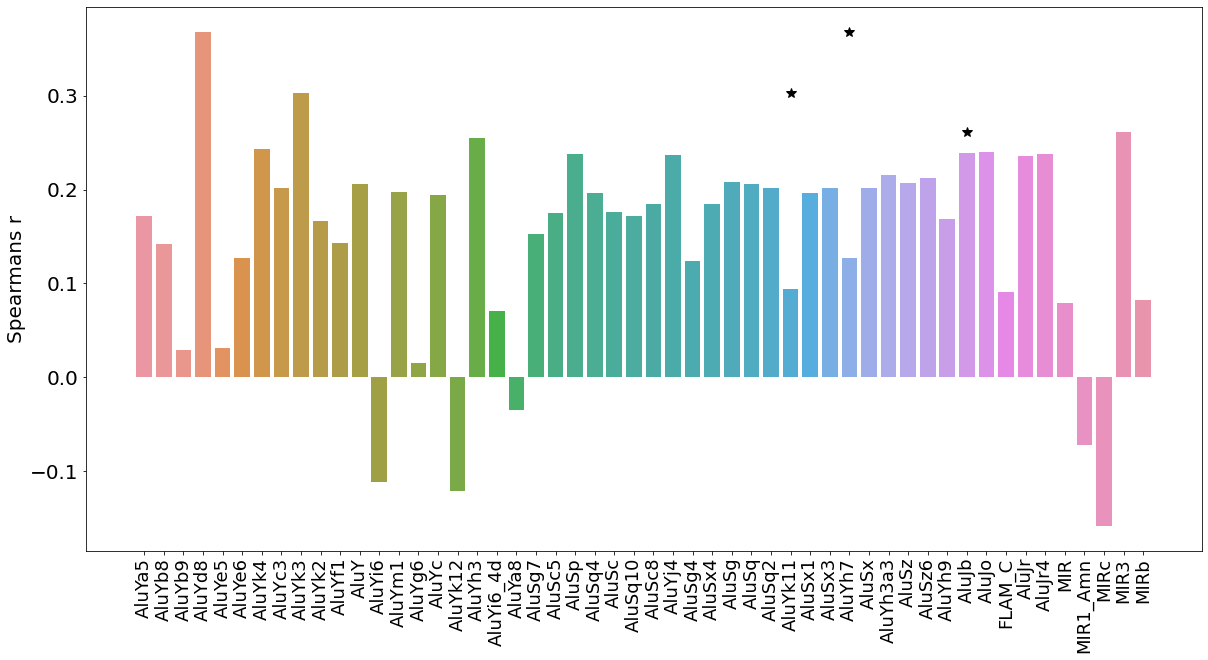

In [120]:
str_arg = 'SINE'
sub_ = spear_age_res.loc[(evol_age['family'] == str_arg).values]
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sub_, x=sub_.index, y="stat", order=sort_name)
# add * symbol above bars with p < 0.05
plt.plot(np.where(sub_['adj_pval'] < 0.05)[0], sub_[sub_['adj_pval'] < 0.05]['stat'], '*', color='k', markersize=10)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('Spearmans r', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
plt.savefig(s_fig + '/ATEM_PE_SINE-spear_age_bar.svg', transparent=True)
plt.show()

In [122]:
##############
#CELL TYPE
##############
cell_res

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
L1PA3      684.236024        0.067732  0.039471  1.715975  0.086167  0.224684
L1PA5      739.871915       -0.172809  0.045423 -3.804405  0.000142  0.001125
L1HS      1301.311557       -0.005254  0.063207 -0.083121  0.933755  0.953836
L1PA6      374.712410       -0.026022  0.057357 -0.453691  0.650051  0.735177
L1PA7      472.124195        0.029912  0.038203  0.782974  0.433642  0.614130
...               ...             ...       ...       ...       ...       ...
AluYk12     67.902751       -0.140173  0.132774 -1.055727  0.291093  0.515683
FLAM_C       3.004916        0.335055  0.235850  1.420627  0.155425  0.355006
MIR1_Amn     4.336755       -0.010088  0.196893 -0.051236  0.959137  0.959137
AluYh7      31.173214       -0.434702  0.252837 -1.719295  0.085561  0.224684
AluYh9       2.402415       -0.461059  0.267347 -1.724576  0.084604  0.224684

[95 rows x 6 columns]

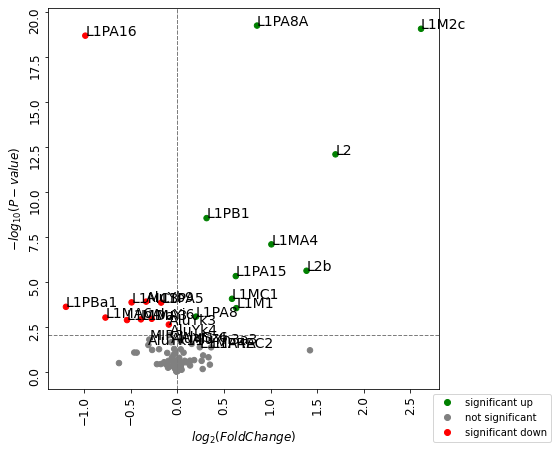

In [210]:
from bioinfokit import analys, visuz
cell_res['geneid'] = cell_res.index
normp_inadj = np.max(cell_res['pvalue'][cell_res['padj'] < 0.05])

# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=cell_res, lfc='log2FoldChange', pv='pvalue', dim = (7,7), dotsize=30, 
                             geneid = 'geneid', genenames = tuple(cell_res[cell_res['pvalue'] < 0.05]['geneid'].values), 
                             valpha = 1,gstyle=1, sign_line=True
                             ,plotlegend=True, legendpos='upper right',
                             legendanchor=(1.30,0), pv_thr = (normp_inadj,normp_inadj), lfc_thr=(0,0), 
                             axtickfontsize=12, axlabelfontsize=12, gfont=14, figtype='svg', figname=s_fig + '/ATEM_PE_celltype', show=True)
                            

In [123]:
cell_res

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
L1PA3      684.236024        0.067732  0.039471  1.715975  0.086167  0.224684
L1PA5      739.871915       -0.172809  0.045423 -3.804405  0.000142  0.001125
L1HS      1301.311557       -0.005254  0.063207 -0.083121  0.933755  0.953836
L1PA6      374.712410       -0.026022  0.057357 -0.453691  0.650051  0.735177
L1PA7      472.124195        0.029912  0.038203  0.782974  0.433642  0.614130
...               ...             ...       ...       ...       ...       ...
AluYk12     67.902751       -0.140173  0.132774 -1.055727  0.291093  0.515683
FLAM_C       3.004916        0.335055  0.235850  1.420627  0.155425  0.355006
MIR1_Amn     4.336755       -0.010088  0.196893 -0.051236  0.959137  0.959137
AluYh7      31.173214       -0.434702  0.252837 -1.719295  0.085561  0.224684
AluYh9       2.402415       -0.461059  0.267347 -1.724576  0.084604  0.224684

[95 rows x 6 columns]

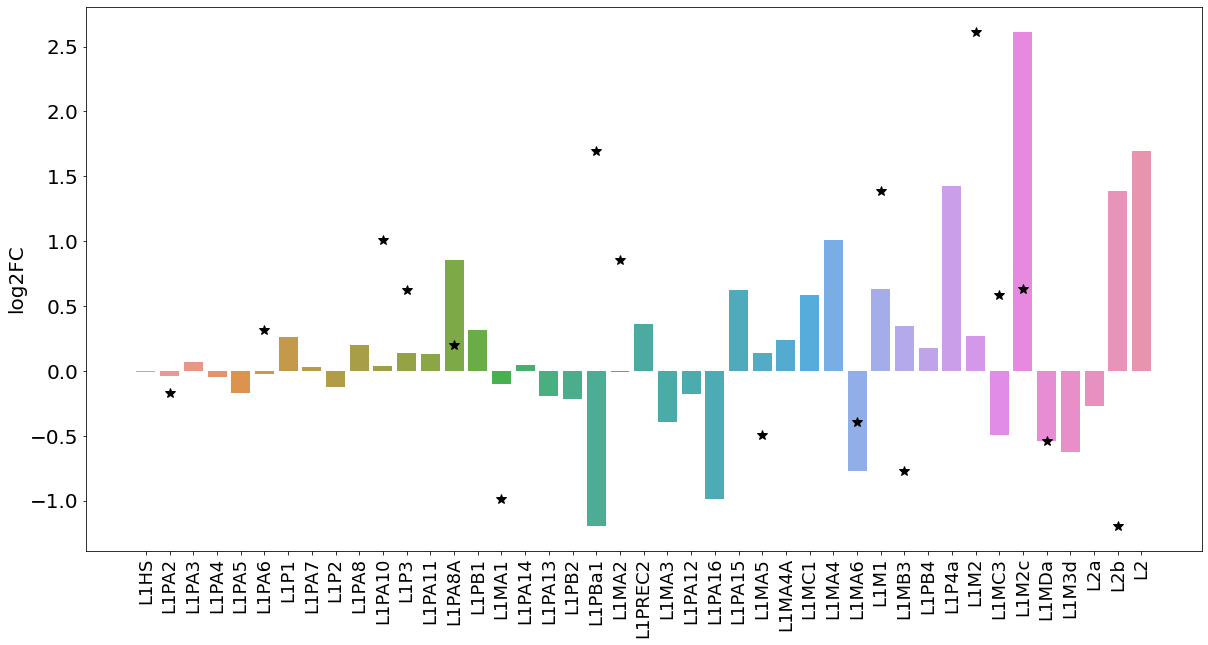

In [132]:
str_arg = 'LINE'
sub_ = cell_res.loc[(evol_age['family'] == str_arg).values]
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sub_, x=sub_.index, y="log2FoldChange", order=sort_name)
# add * symbol above bars with p < 0.05
plt.plot(np.where(sub_['padj'] < 0.05)[0], sub_[sub_['padj'] < 0.05]['log2FoldChange'], '*', color='k', markersize=10)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('log2FC', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
#add colorbar
plt.savefig(s_fig + '/ATEM_PE_LINE_celltype_bar.svg', transparent=True)
plt.show()

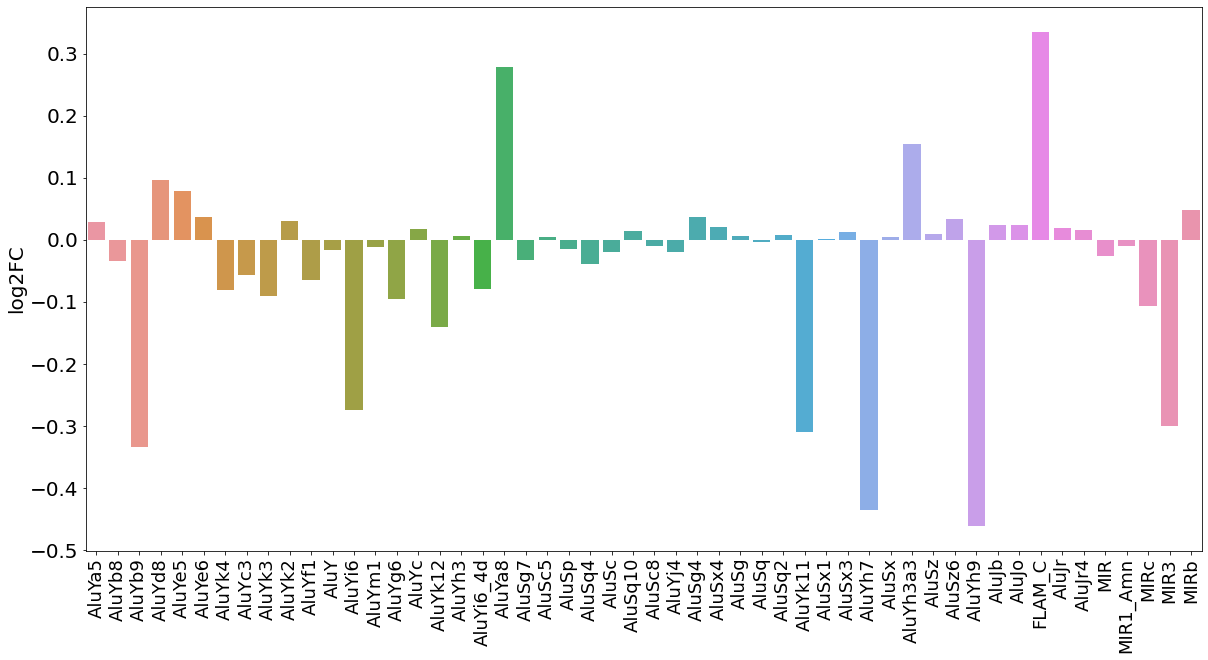

In [133]:
str_arg = 'SINE'
sub_ = cell_res.loc[(evol_age['family'] == str_arg).values]
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sub_, x=sub_.index, y="log2FoldChange", order=sort_name)
# add * symbol above bars with p < 0.05
#plt.plot(np.where(sub_['padj'] < 0.05)[0], sub_[sub_['padj'] < 0.05]['log2FoldChange'], '*', color='k', markersize=10)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('log2FC', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
#add colorbar
plt.savefig(s_fig + '/ATEM_PE_SINE_celltype_bar.svg', transparent=True)
plt.show()

In [77]:
#Compare CPMs across cell types for each class

# Do  a scatterplot for each class, separating by cell type

# LINE
str_arg = 'LINE'
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

gaba_ind = [i for i,x in enumerate(df.columns) if 'GABA' in x]
glu_ind = [i for i,x in enumerate(df.columns) if 'GLU' in x]
df_gaba = df.iloc[:,gaba_ind]
df_glu = df.iloc[:,glu_ind]
cell_cols = [df.columns[i].split('-')[-1] for i in range(len(df.columns))]

cell_df = {'element': [], 'celltype': [], 'cpm': []}
for i in range(len(df)):
    cell_df['element'] = np.append(cell_df['element'],np.full((df.shape[1]),df.index[i]))
    cell_df['celltype'] = np.append(cell_df['celltype'],cell_cols)
    cell_df['cpm'] = np.append(cell_df['cpm'],df.iloc[i,:].values)
cell_df = pd.DataFrame(cell_df)

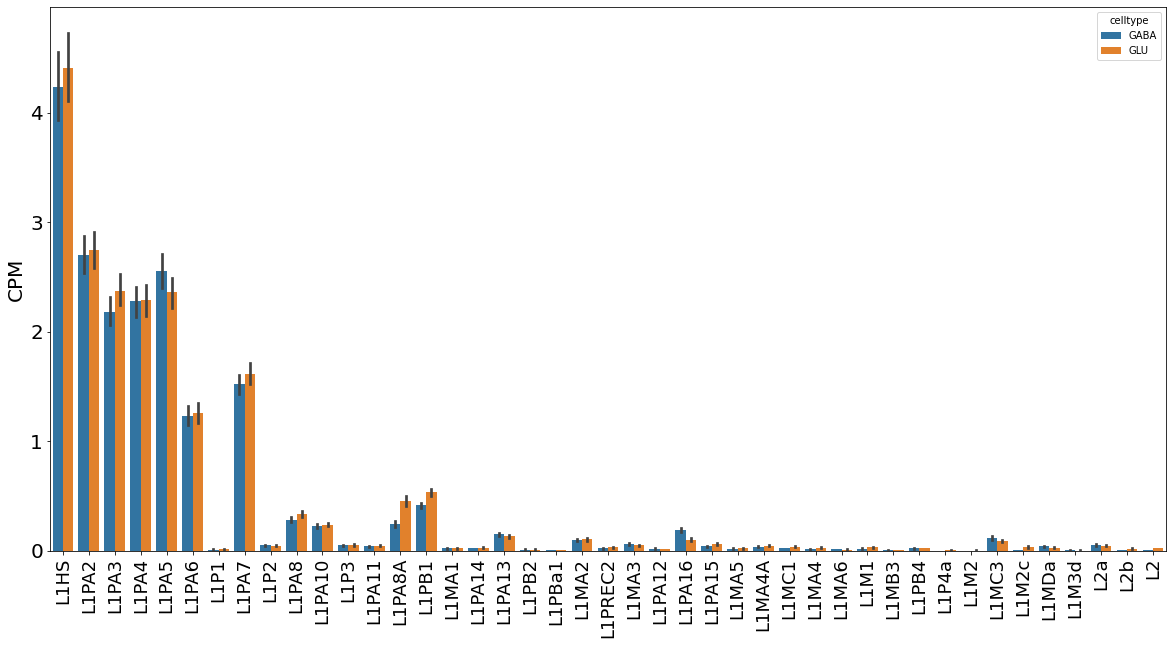

In [81]:
#plot cell_df as a dot plot of elements x GLU vs GABA
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=cell_df, x='element', y="cpm", hue = 'celltype', order=sort_name)

plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('CPM', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
#add colorbar
#plt.savefig(s_fig + '/ATEM_PE_SINE_celltype_bar.svg', transparent=True)
plt.show()

In [82]:
#Compare CPMs across cell types for each class

# Do  a scatterplot for each class, separating by cell type

# LINE
str_arg = 'SINE'
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == str_arg]['age'].values, evol_age[evol_age['family'] == str_arg]['element'].values)

gaba_ind = [i for i,x in enumerate(df.columns) if 'GABA' in x]
glu_ind = [i for i,x in enumerate(df.columns) if 'GLU' in x]
df_gaba = df.iloc[:,gaba_ind]
df_glu = df.iloc[:,glu_ind]
cell_cols = [df.columns[i].split('-')[-1] for i in range(len(df.columns))]

cell_df = {'element': [], 'celltype': [], 'cpm': []}
for i in range(len(df)):
    cell_df['element'] = np.append(cell_df['element'],np.full((df.shape[1]),df.index[i]))
    cell_df['celltype'] = np.append(cell_df['celltype'],cell_cols)
    cell_df['cpm'] = np.append(cell_df['cpm'],df.iloc[i,:].values)
cell_df = pd.DataFrame(cell_df)

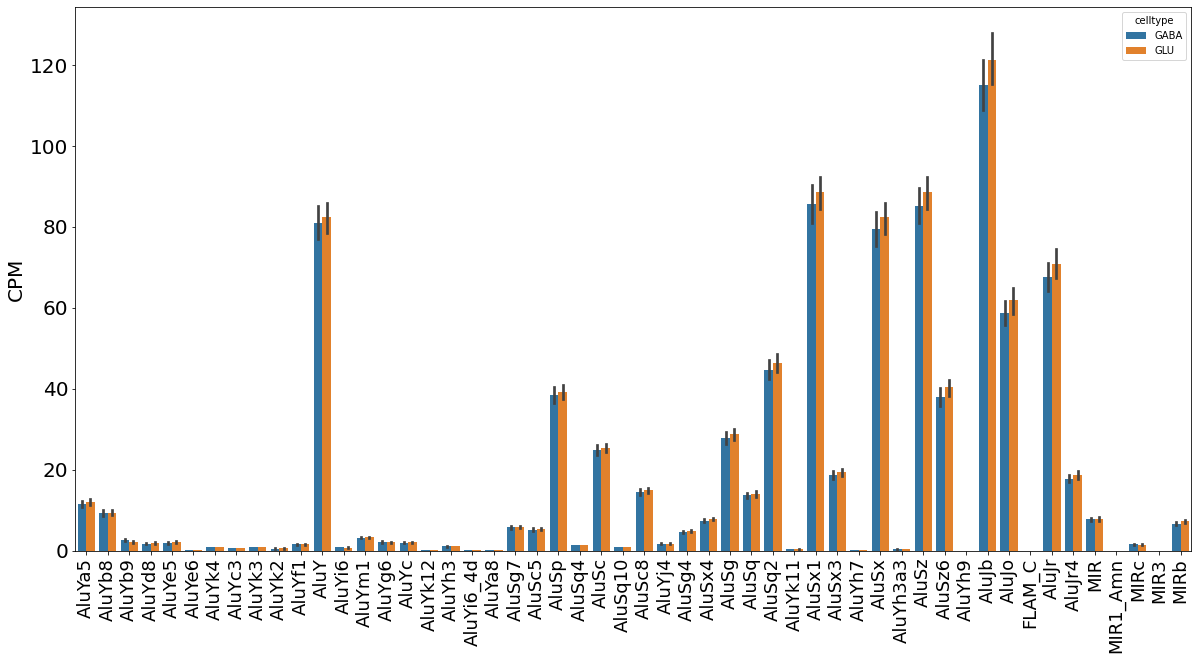

In [83]:
#plot cell_df as a dot plot of elements x GLU vs GABA
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=cell_df, x='element', y="cpm", hue = 'celltype', order=sort_name)

plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('CPM', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
#add colorbar
#plt.savefig(s_fig + '/ATEM_PE_SINE_celltype_bar.svg', transparent=True)
plt.show()

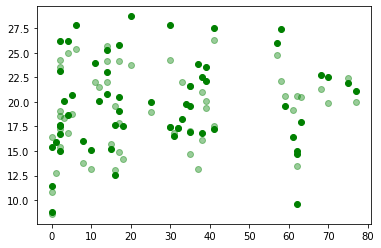

In [149]:
line = ev_df['family'] == 'LINE'
line_df = glu_df.loc[line.values]
sine = ev_df['family'] == 'SINE'
sine_df = glu_df.loc[sine.values]

plt.scatter(glu_age, np.sum(line_df).values, alpha=1, c='green', label='GLU LINE')
#plt.scatter(glu_age, np.sum(sine_df).values, alpha=1, c='blue', label='GLU SINE')

line_df = gaba_df.loc[line.values]
sine_df = gaba_df.loc[sine.values]
plt.scatter(gaba_age, np.sum(line_df).values, alpha=0.4, c='green', label='GABA LINE')
#plt.scatter(gaba_age, np.sum(sine_df).values, alpha=0.4, c='blue', label='GABA SINE')

plt.show()

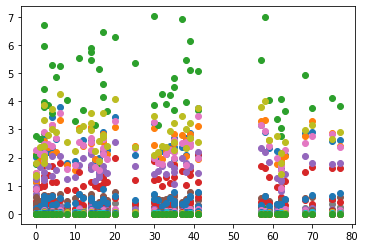

In [150]:
line = ev_df['family'] == 'LINE'
curr_df = glu_df.loc[line.values]
curr_age = glu_age

for i in range(len(curr_df)):
    plt.scatter(curr_age, curr_df.iloc[i].values, alpha=1)
plt.show()

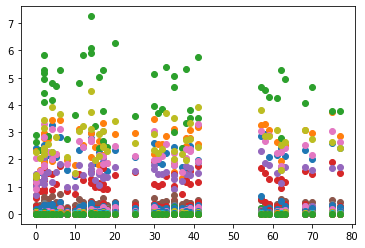

In [151]:
line = ev_df['family'] == 'LINE'
curr_df = gaba_df.loc[line.values]
curr_age = gaba_age
for i in range(len(curr_df)):
    plt.scatter(curr_age, curr_df.iloc[i].values, alpha=1)
plt.show()

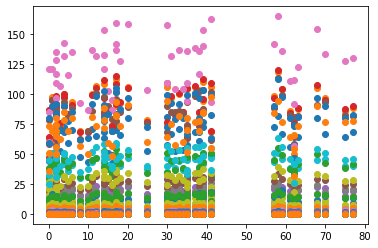

In [152]:
line = ev_df['family'] == 'SINE'
curr_df = glu_df.loc[line.values]
curr_age = glu_age

for i in range(len(curr_df)):
    plt.scatter(curr_age, curr_df.iloc[i].values, alpha=1)
plt.show()

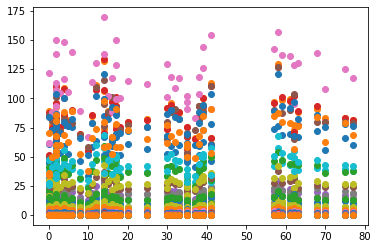

In [153]:
line = ev_df['family'] == 'SINE'
curr_df = gaba_df.loc[line.values]
curr_age = gaba_age
for i in range(len(curr_df)):
    plt.scatter(curr_age, curr_df.iloc[i].values, alpha=1)
plt.show()

### CZI single cell
* should i just do normal DE Wilcoxon across two groups?
* check that youre using DESEQ correctly

In [177]:
# Metadata
meta = pd.read_csv('/cndd3/dburrows/DATA/te/metadata/CZI/CZI-metadata.csv')
ev_df = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/evolutionary_age.csv')


In [315]:
dm = meta[['sequencing_id', 'donor', 'Subject Sex', 'Subject Age']]
age_ = dm['Subject Age'].values

age_ = age_.astype('object')
less = np.where(age_ < 50)[0]
more = np.where(age_ >= 50)[0]
age_[less] ='Y'
age_[more] = 'O'
age_

array(['O', 'O', 'O', 'O', 'O', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'O', 'O', 'O', 'O', 'O', 'Y', 'Y', 'Y', 'O', 'O'], dtype=object)

In [321]:
#Make design matrix
dm = meta[['sequencing_id', 'donor', 'Subject Sex', 'Subject Age']]
age_ = dm['Subject Age'].values

age_ = age_.astype('object')
less = np.where(age_ < 50)[0]
more = np.where(age_ >= 50)[0]
age_[less] ='Y'
age_[more] = 'O'
dm['Subject Age'] = age_
# new_age = (age_ - np.mean(age_))/np.std(age_)
# dm['age_stand'] = new_age
dm = dm.drop([0,5,6])
dm.to_csv('/cndd3/dburrows/DATA/te/rna/CZI.counts/DESEQ/ATEM_design.csv')
dm

/tmp/ipykernel_2080693/3330343314.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm['Subject Age'] = age_


sequencing_id donor Subject Sex Subject Age
1           CZI2   OM1        Male           O
2           CZI3   OM2        Male           O
3           CZI4   OF1      Female           O
4           CZI5   OF1      Female           O
7           CZI8   YM1        Male           Y
8           CZI9   YM3        Male           Y
9          CZI10   YF2      Female           Y
10         CZI11   YM2        Male           Y
11         CZI12   YM3        Male           Y
12         CZI13   YF1      Female           Y
13         CZI14   OM3        Male           O
14         CZI15   OF2      Female           O
15         CZI16   OF3      Female           O
16         CZI17   OM3        Male           O
17         CZI18   OF3      Female           O
18         CZI19   YF1      Female           Y
19         CZI20   YF2      Female           Y
20         CZI21   YM2        Male           Y
21         CZI22   OM1        Male           O
22         CZI23   OF2      Female           O

In [349]:
#Find all unique cell types
cell_l = []
os.chdir('/cndd3/dburrows/DATA/te/rna/CZI.counts/ATEM/pseudobulk/')
samp_l = glob.glob('*CZI*')
for s in samp_l:
    os.chdir(s)
    cell_l = np.append(cell_l,[glob.glob('*ATEM*')[i].split('.')[0] for i in range(len(glob.glob('*ATEM*')))])
    os.chdir('..')
unq_cell = np.unique(cell_l)
unq_cell


array(['CGE_ADARB2_ADAM33', 'CGE_LAMP5', 'CGE_LAMP5_LHX6', 'CGE_PAX6',
       'CGE_VIP', 'Glia_Astro', 'Glia_Oligo', 'L2-4IT_CUX2',
       'L3-5IT_RORB_PLCH1', 'L4-5IT_RORB_ARHGAP15', 'L4-5IT_RORB_LRRK1',
       'L4-5IT_RORB_TSHZ2', 'L56NP_TLE4_TSHZ2', 'L6', 'L6IT_THEMIS_CUX1',
       'L6IT_THEMIS_LINC00343', 'MGE_PVALB', 'MGE_SST', 'MGE_SST_CLMP'],
      dtype='<U32')

In [189]:
#Make gene x sample matrix for each cell type for DESEQ
os.chdir('/cndd3/dburrows/DATA/te/rna/CZI.counts/ATEM/pseudobulk/')
samp_l = dm['sequencing_id'].values

for cell in unq_cell:
    te = ev_df['element'].values
    dict = {'element':te}
    for s in samp_l:
        os.chdir(glob.glob('*' + s + '_*')[0])
        curr_cell = glob.glob(cell + '.*ATEM*')
        if len(curr_cell)!=0:
            te_v = ter.load_ATEM_family(curr_cell[0], te)

        else:
            te_v = np.zeros(len(te))

        assert len(te) == len(te_v), 'Error: Not all TE elements were counted'
        #Add to dict
        dict[s] = te_v

        #if len(curr_cell) == 0:
        os.chdir('..')
    df = pd.DataFrame(dict)
    #set first column to index
    df.set_index('element', inplace=True)
    df = df.astype(int)
    df+=1
    df.to_csv('/cndd3/dburrows/DATA/te/rna/CZI.counts/DESEQ/' + cell + '.ATEM.csv')


In [323]:
unq_cell

array(['CGE_ADARB2_ADAM33', 'CGE_LAMP5', 'CGE_LAMP5_LHX6', 'CGE_PAX6',
       'CGE_VIP', 'Glia_Astro', 'Glia_Oligo', 'L2-4IT_CUX2',
       'L3-5IT_RORB_PLCH1', 'L4-5IT_RORB_ARHGAP15', 'L4-5IT_RORB_LRRK1',
       'L4-5IT_RORB_TSHZ2', 'L56NP_TLE4_TSHZ2', 'L6', 'L6IT_THEMIS_CUX1',
       'L6IT_THEMIS_LINC00343', 'MGE_PVALB', 'MGE_SST', 'MGE_SST_CLMP'],
      dtype='<U32')

In [339]:
#put all LFC and padj into a dataframe for cells x TEs 
def heatmat(string, factor):
    os.chdir('/cndd3/dburrows/DATA/te/rna/CZI.counts/DESEQ/')

    sort_age, sort_name_line = adm.sort_2list(evol_age[evol_age['family'] == 'LINE']['age'].values, evol_age[evol_age['family'] == 'LINE']['element'].values)
    sort_age, sort_name_sine = adm.sort_2list(evol_age[evol_age['family'] == 'SINE']['age'].values, evol_age[evol_age['family'] == 'SINE']['element'].values)
    heat_line, heat_sine = pd.DataFrame(), pd.DataFrame()
    for cell in unq_cell:
        df = pd.read_csv(cell + '.DESEQ_' + factor + '.csv')
        LINE_df = df.loc[(evol_age['family'] == 'LINE').values]
        SINE_df = df.loc[(evol_age['family'] == 'SINE').values]
        heat_line[cell] = LINE_df[string].values
        heat_sine[cell] = SINE_df[string].values

    heat_line.index = evol_age[evol_age['family'] == 'LINE']['element'].values
    heat_line = heat_line.reindex(index=sort_name_line)
    heat_line = heat_line.T
    heat_sine.index = evol_age[evol_age['family'] == 'SINE']['element'].values
    heat_sine = heat_sine.reindex(index=sort_name_sine)
    heat_sine = heat_sine.T
    return heat_line, heat_sine

In [341]:
#EFFECT OF AGE
line_lfc, sine_lfc = heatmat('log2FoldChange', 'age')
line_padj, sine_padj = heatmat('padj', 'age')


yes


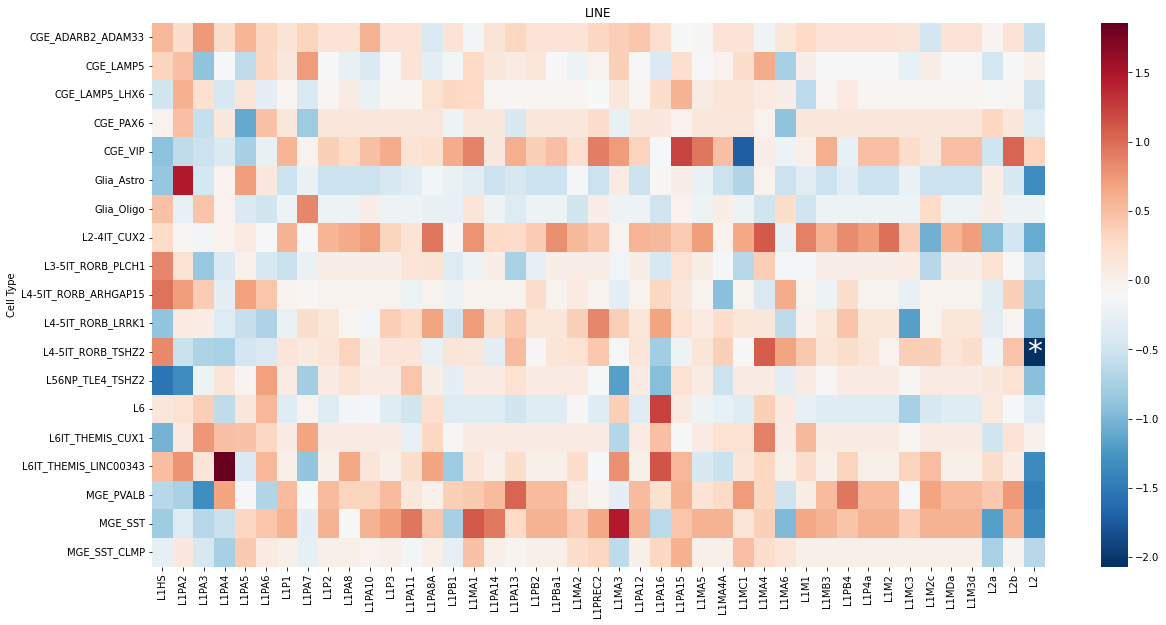

In [342]:
#OLD VS YOUNG
#make a heatmap of heat_line
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(line_lfc*-1, cmap='RdBu_r', ax=ax)
#add * symbol to indicate significance
for i in range(len(line_lfc)):
    for j in range(len(line_lfc.columns)):
        if line_padj.iloc[i,j] < 0.05:
            print('yes')
            ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='white', fontsize=30)
ax.set_title('LINE')
ax.set_ylabel('Cell Type')
plt.show()


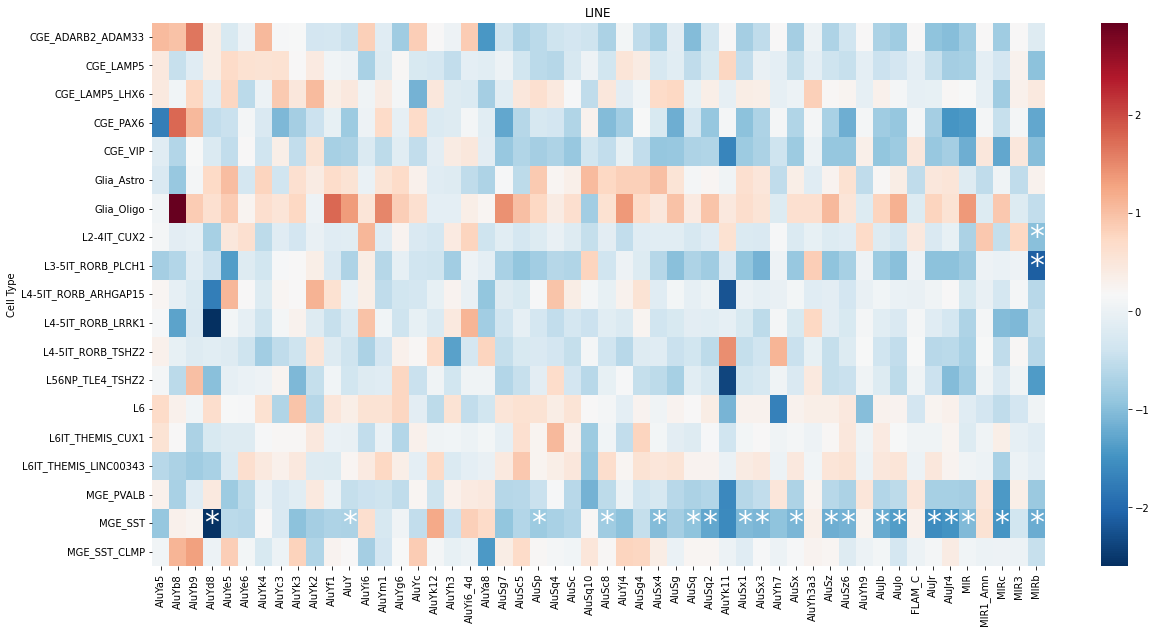

In [343]:
#OLD VS YOUNG
#make a heatmap of heat_line
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(sine_lfc*-1, cmap='RdBu_r', ax=ax)
#add * symbol to indicate significance
for i in range(len(sine_lfc)):
    for j in range(len(sine_lfc.columns)):
        if sine_padj.iloc[i,j] < 0.05:
            ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='white', fontsize=30)
ax.set_title('LINE')
ax.set_ylabel('Cell Type')
plt.show()


In [344]:
#EFFECT OF SEX
line_lfc, sine_lfc = heatmat('log2FoldChange', 'sex')
line_padj, sine_padj = heatmat('padj', 'sex')


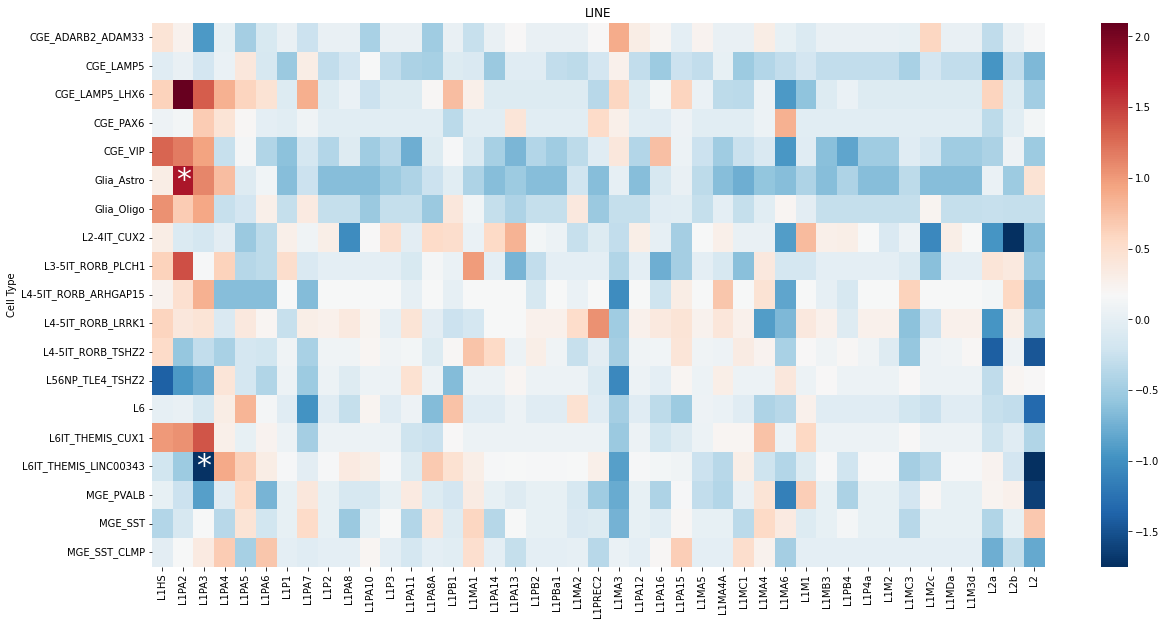

In [346]:
#MALE VS FEMALE
#make a heatmap of heat_line
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(line_lfc, cmap='RdBu_r', ax=ax)
#add * symbol to indicate significance
for i in range(len(line_lfc)):
    for j in range(len(line_lfc.columns)):
        if line_padj.iloc[i,j] < 0.05:
            ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='white', fontsize=30)
ax.set_title('LINE')
ax.set_ylabel('Cell Type')
plt.show()


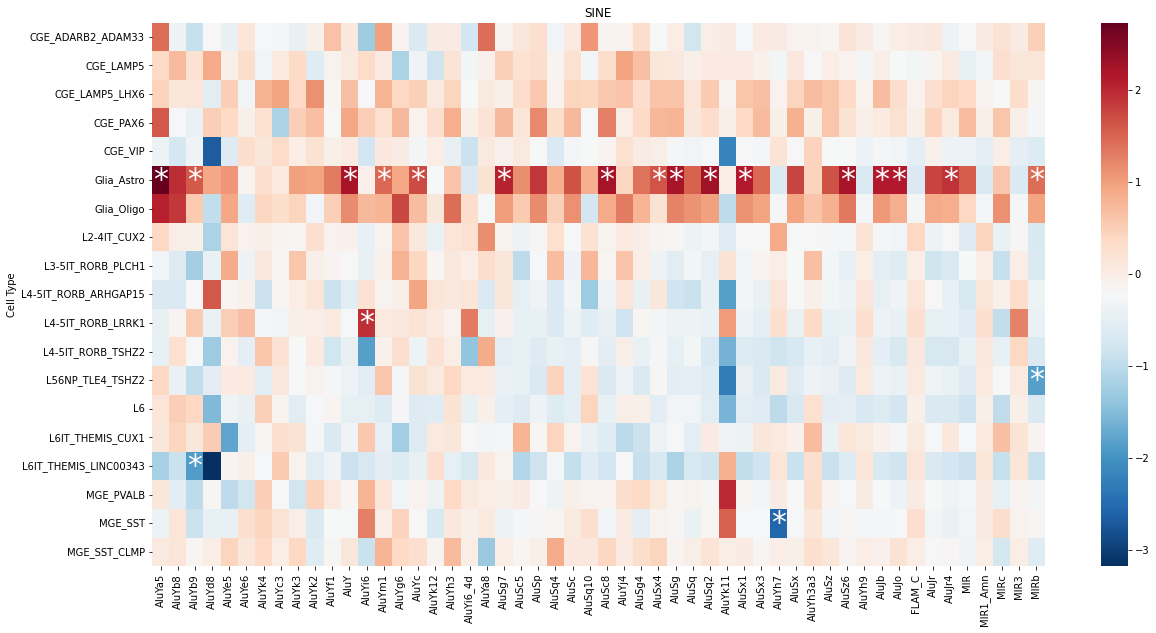

In [348]:
#MALE VS FEMALE
#make a heatmap of heat_line
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(sine_lfc, cmap='RdBu_r', ax=ax)
#add * symbol to indicate significance
for i in range(len(sine_lfc)):
    for j in range(len(sine_lfc.columns)):
        if sine_padj.iloc[i,j] < 0.05:
            ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='white', fontsize=30)
ax.set_title('SINE')
ax.set_ylabel('Cell Type')
plt.show()


In [382]:
t = te[0]

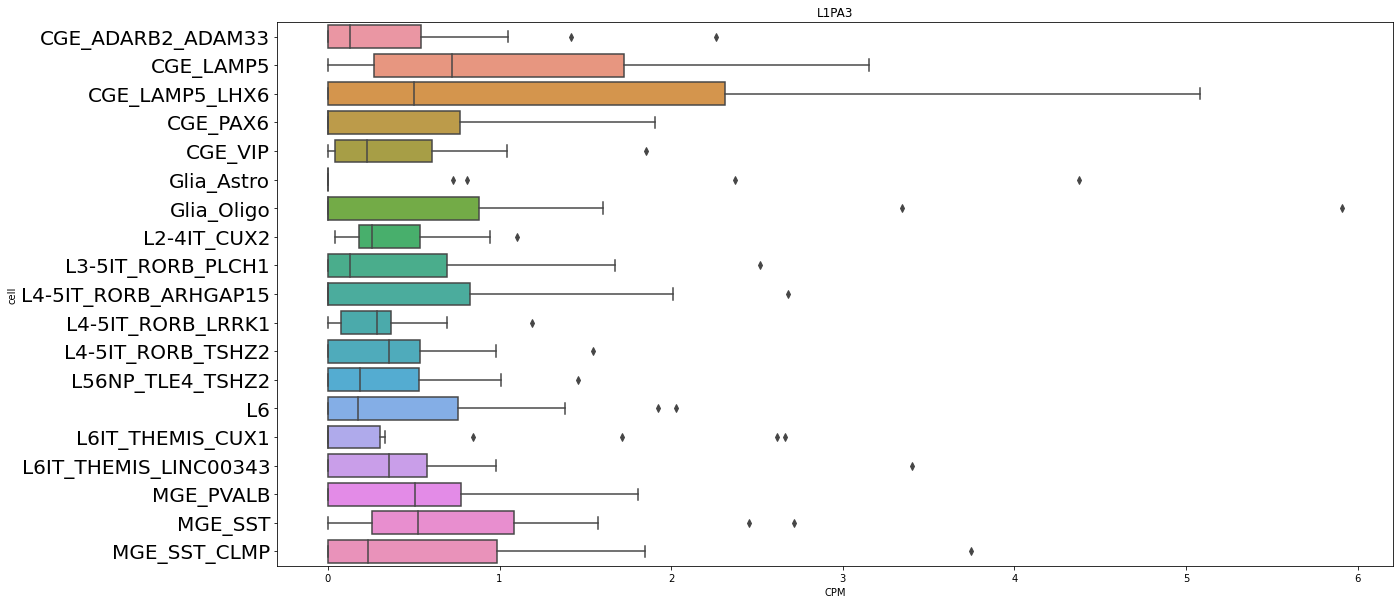

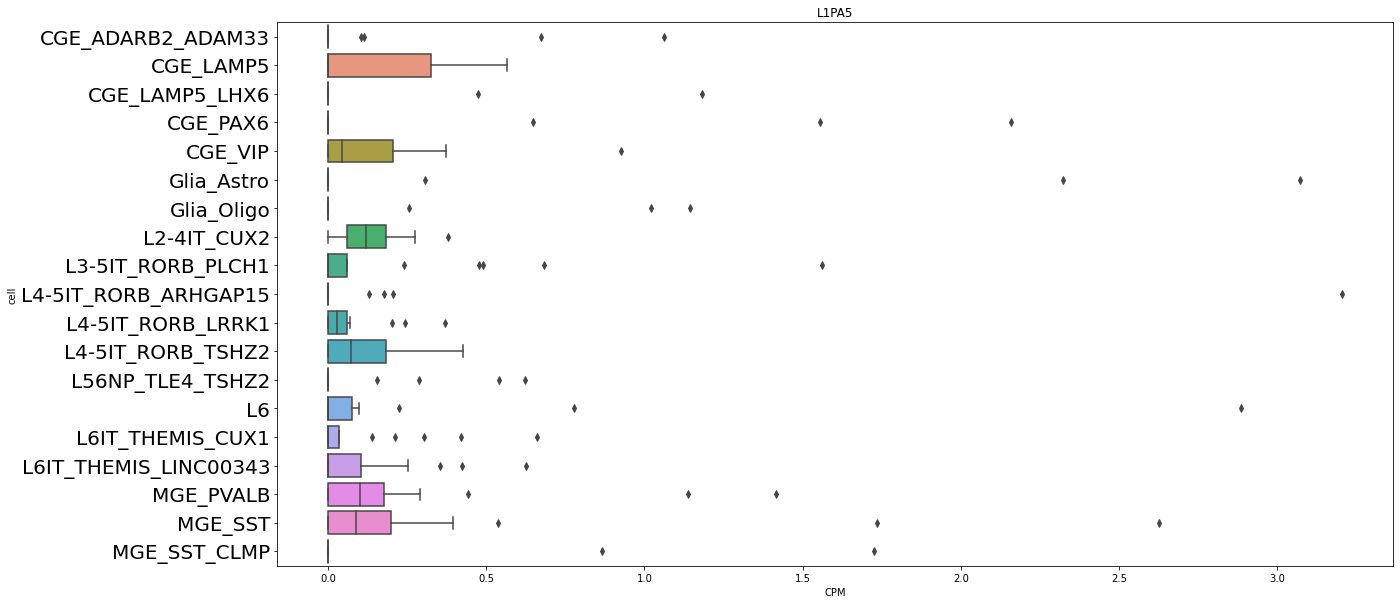

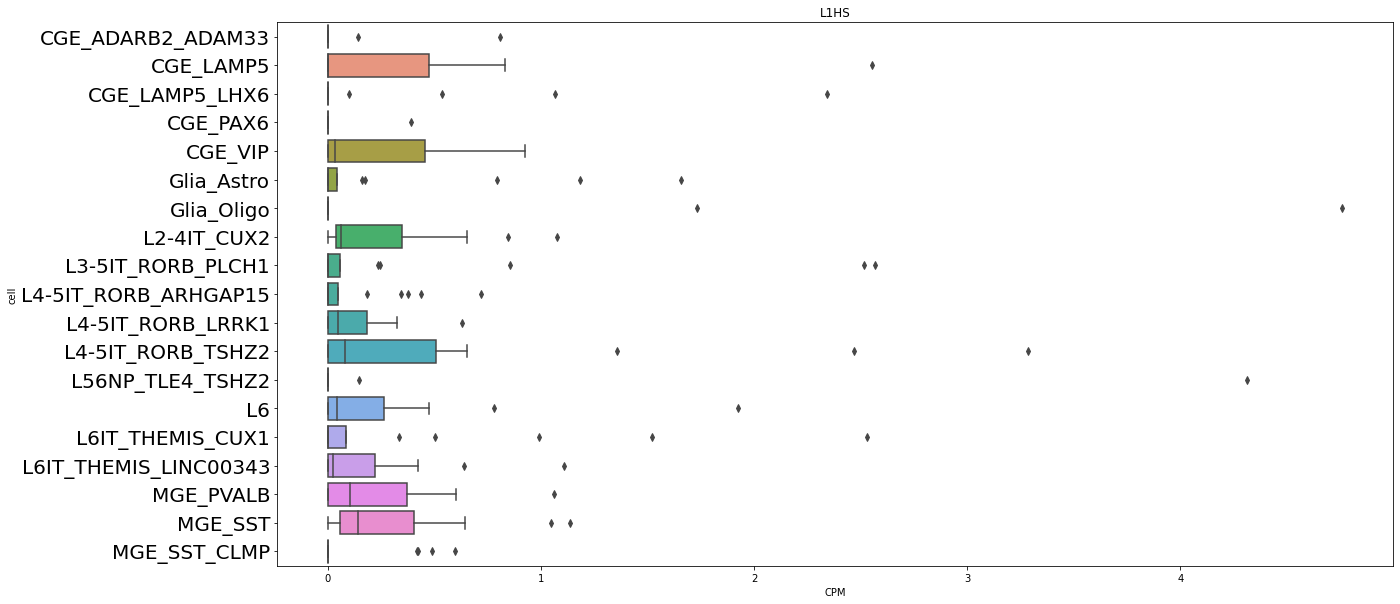

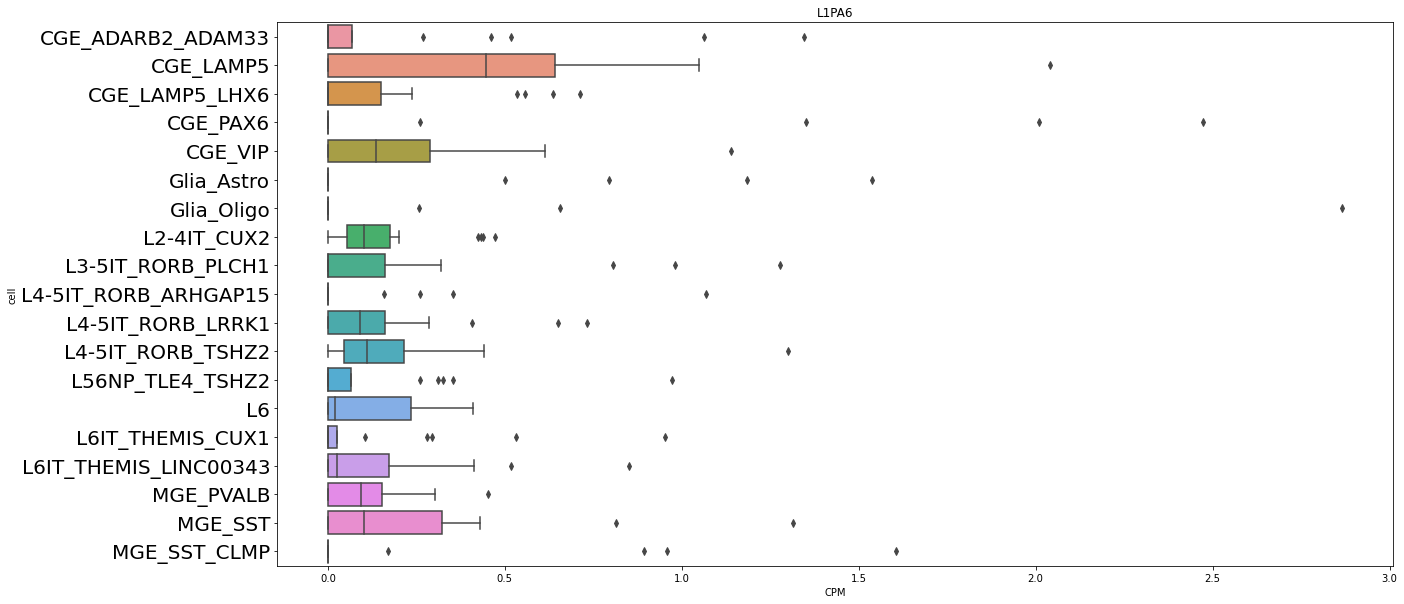

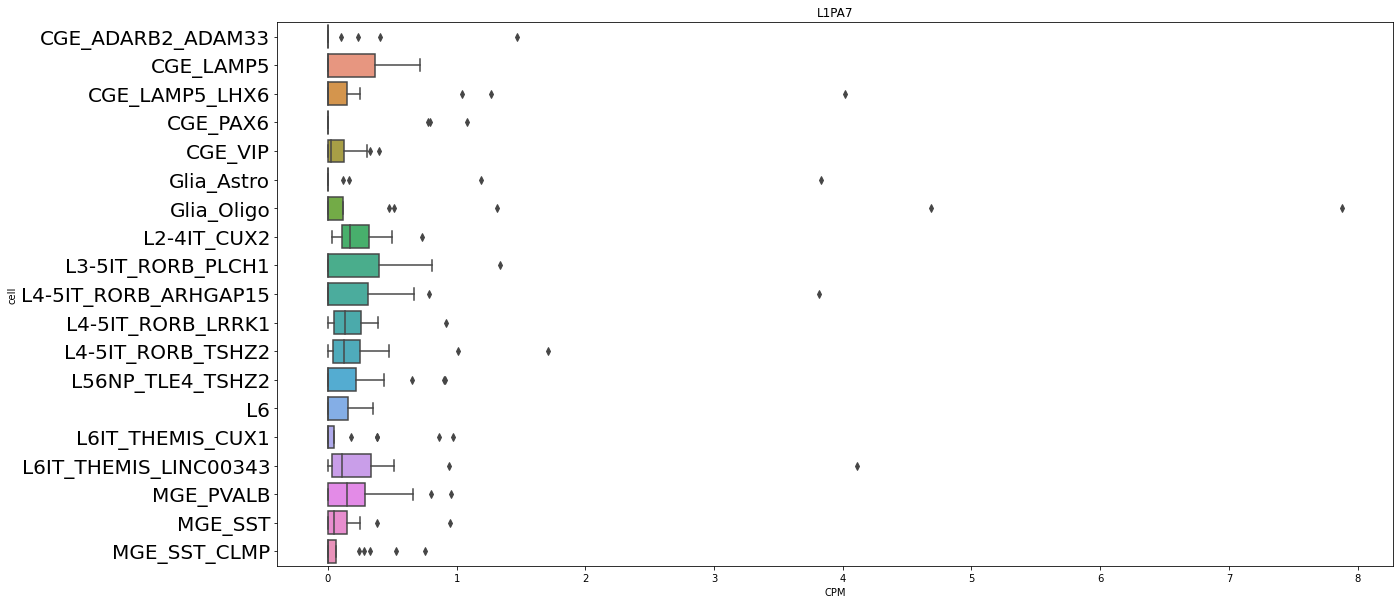

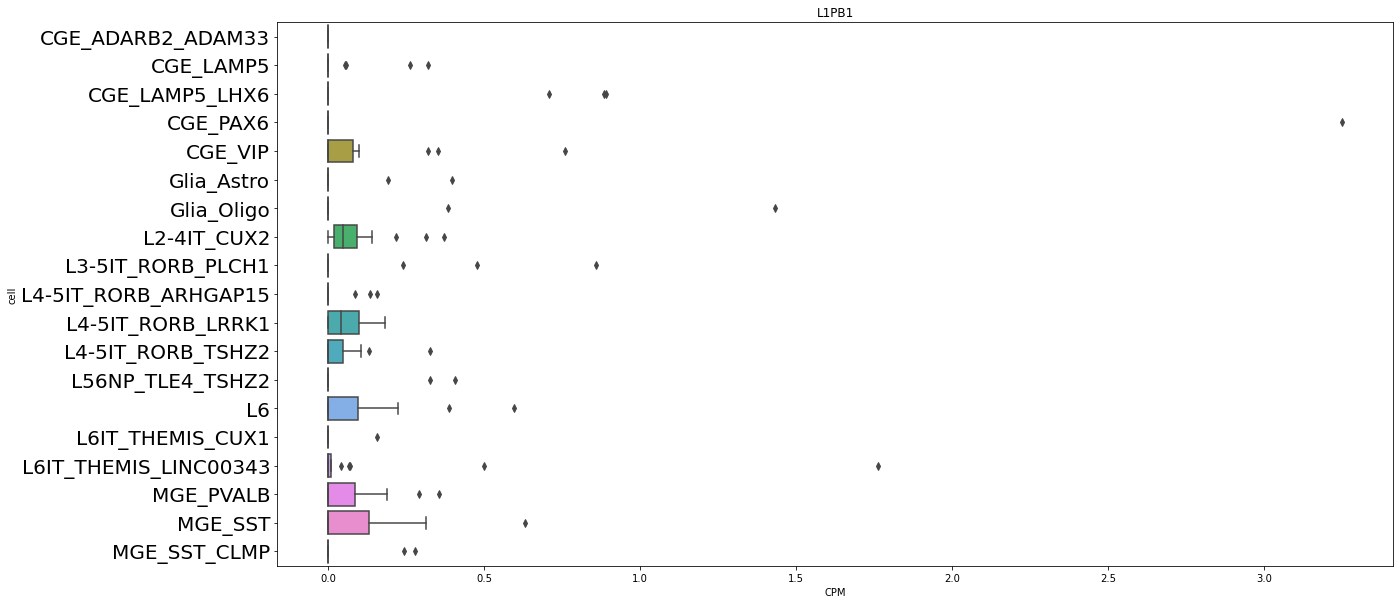

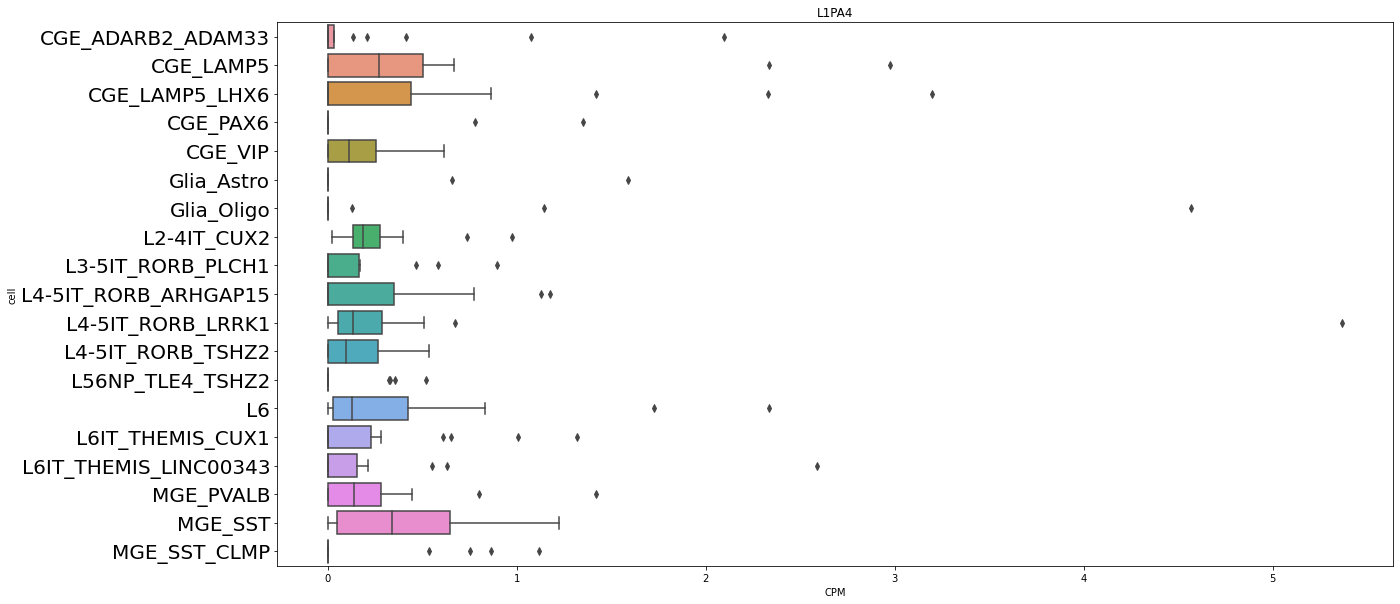

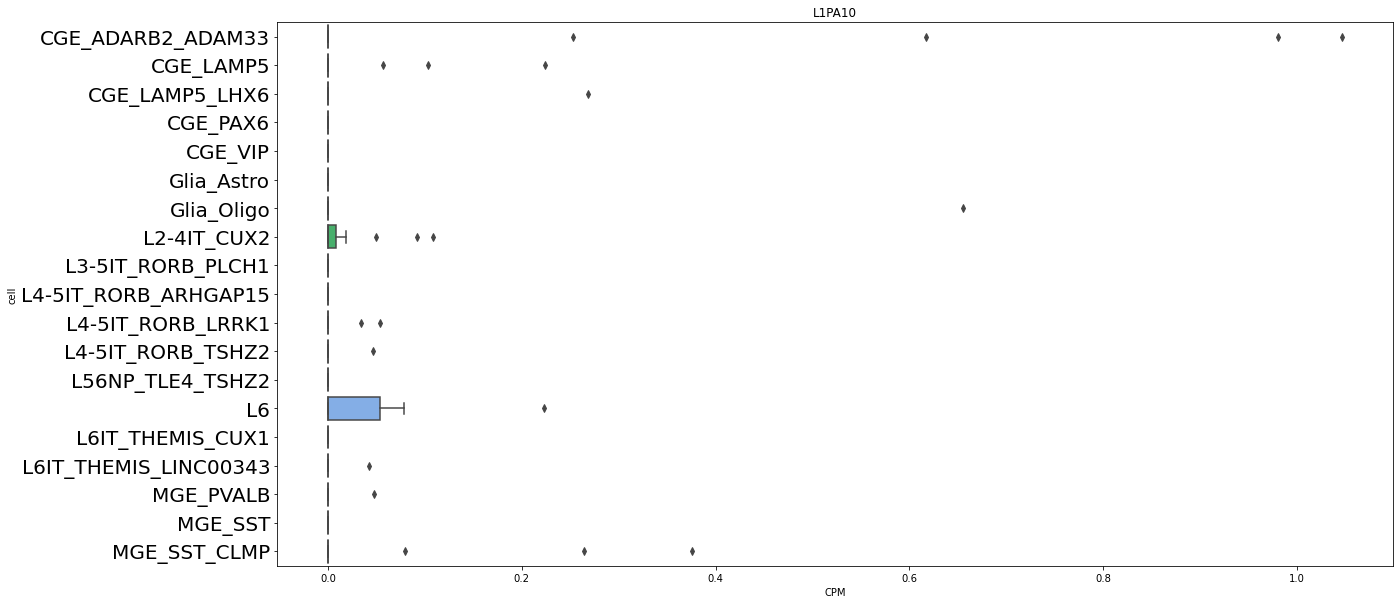

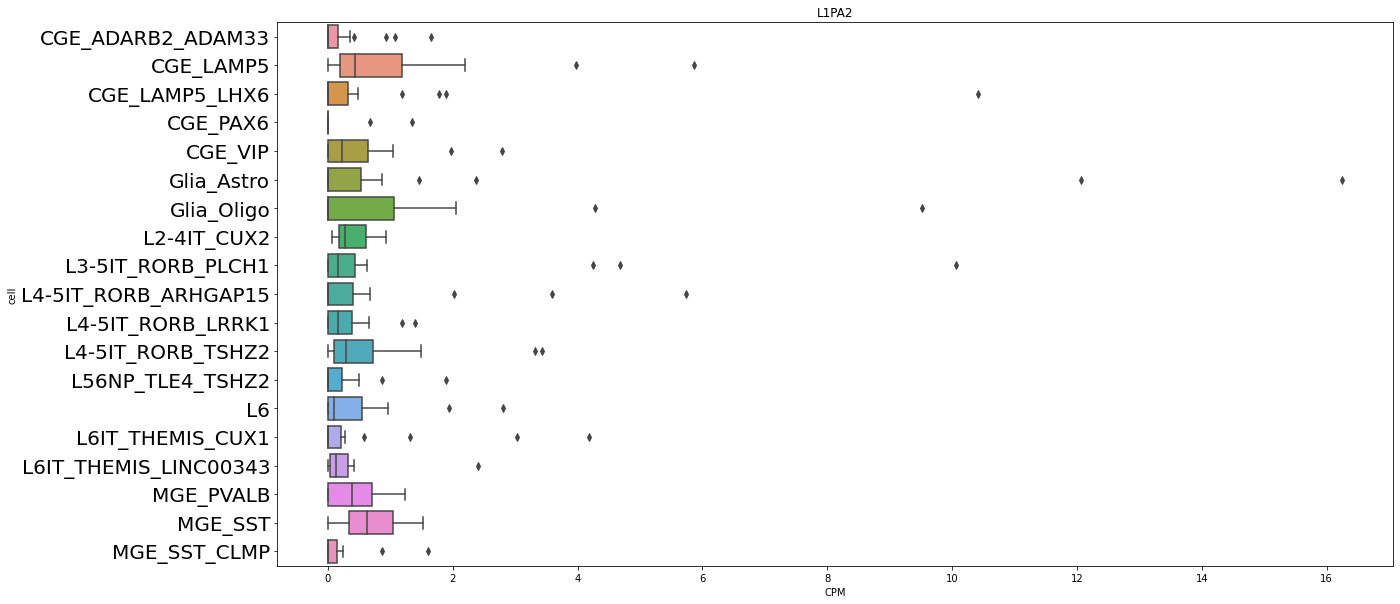

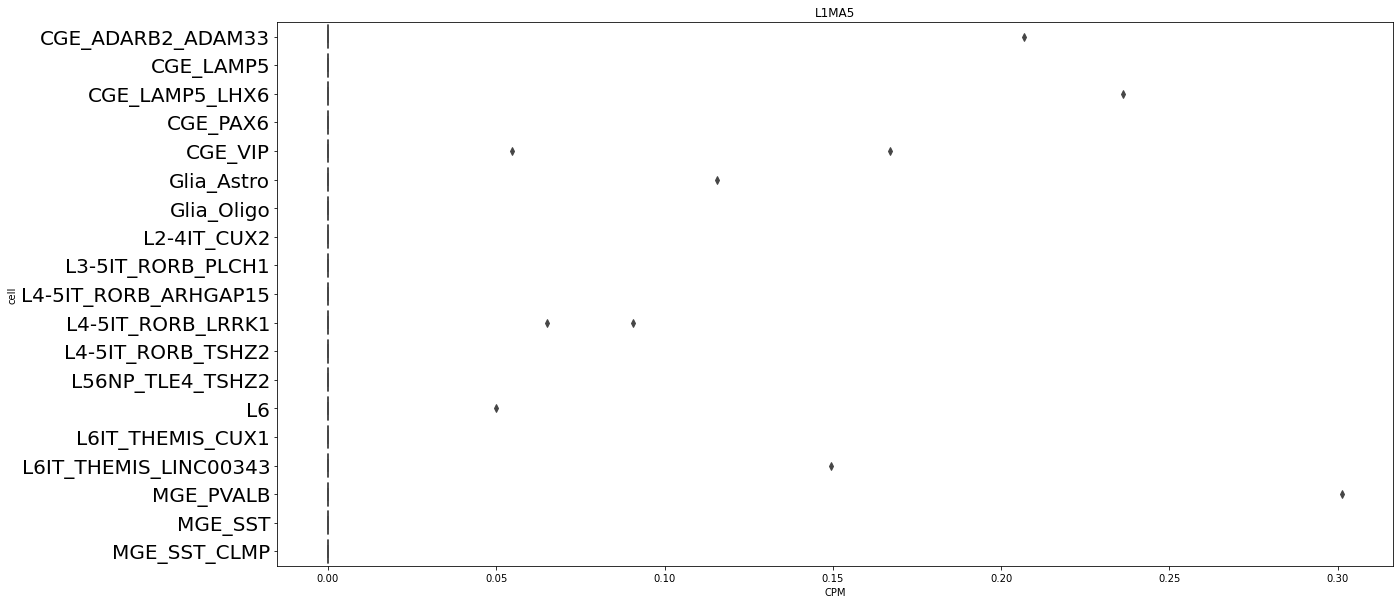

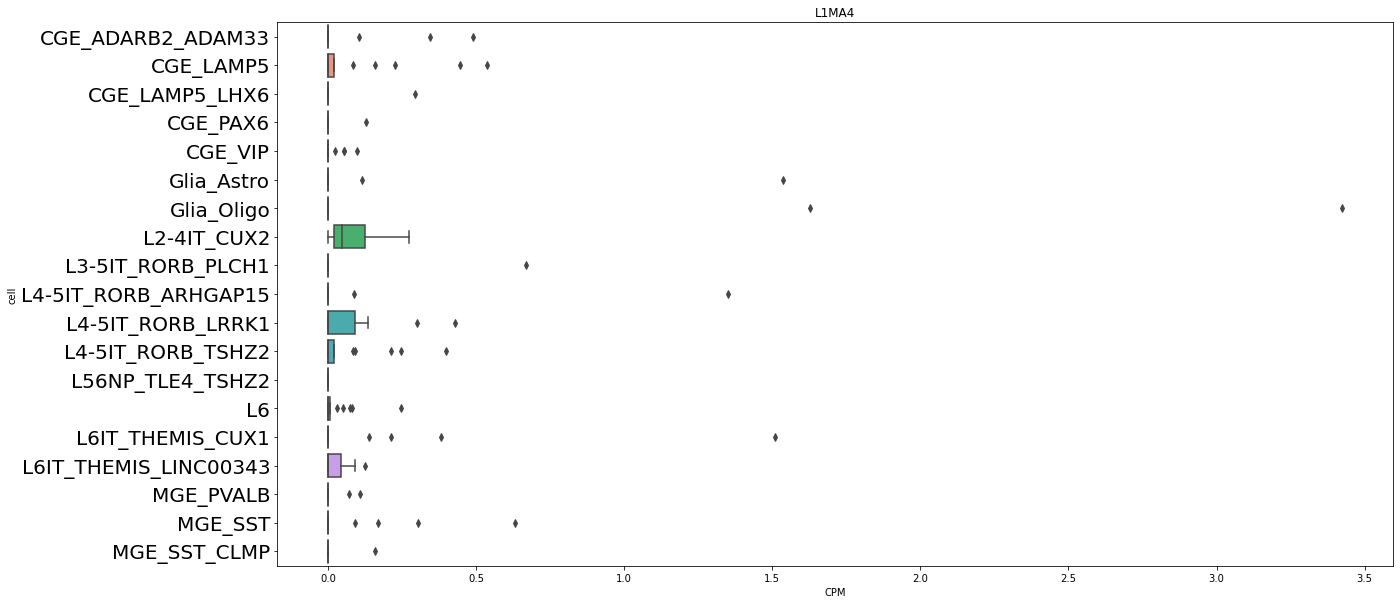

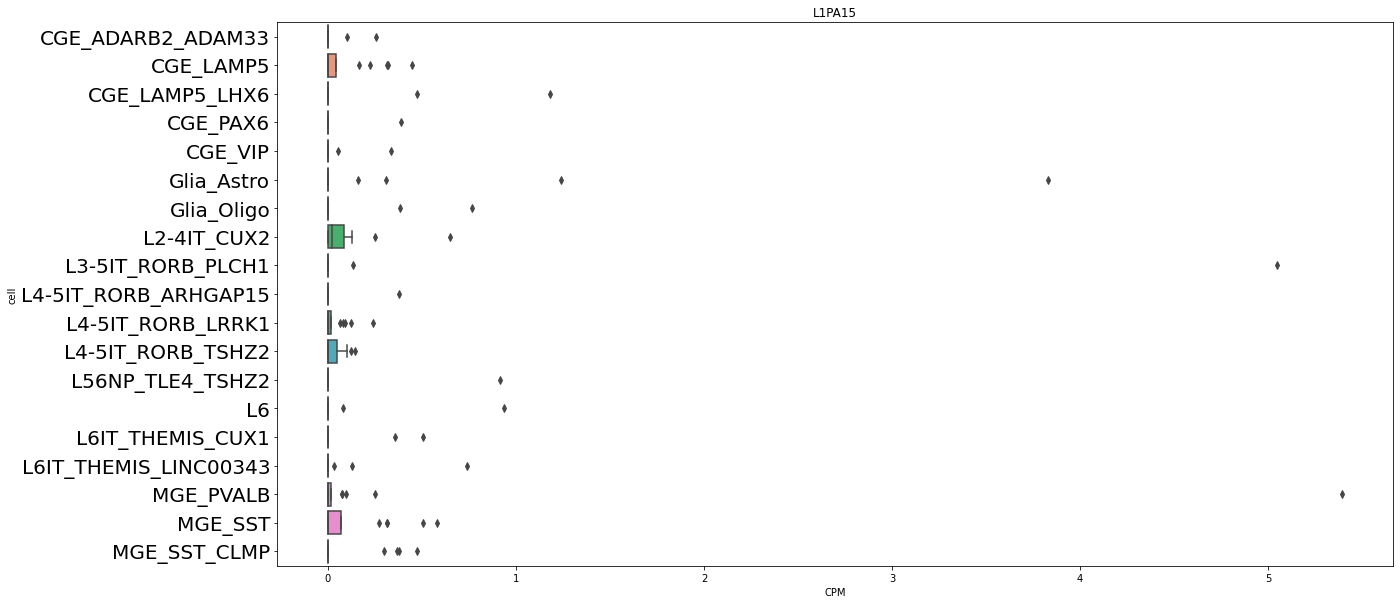

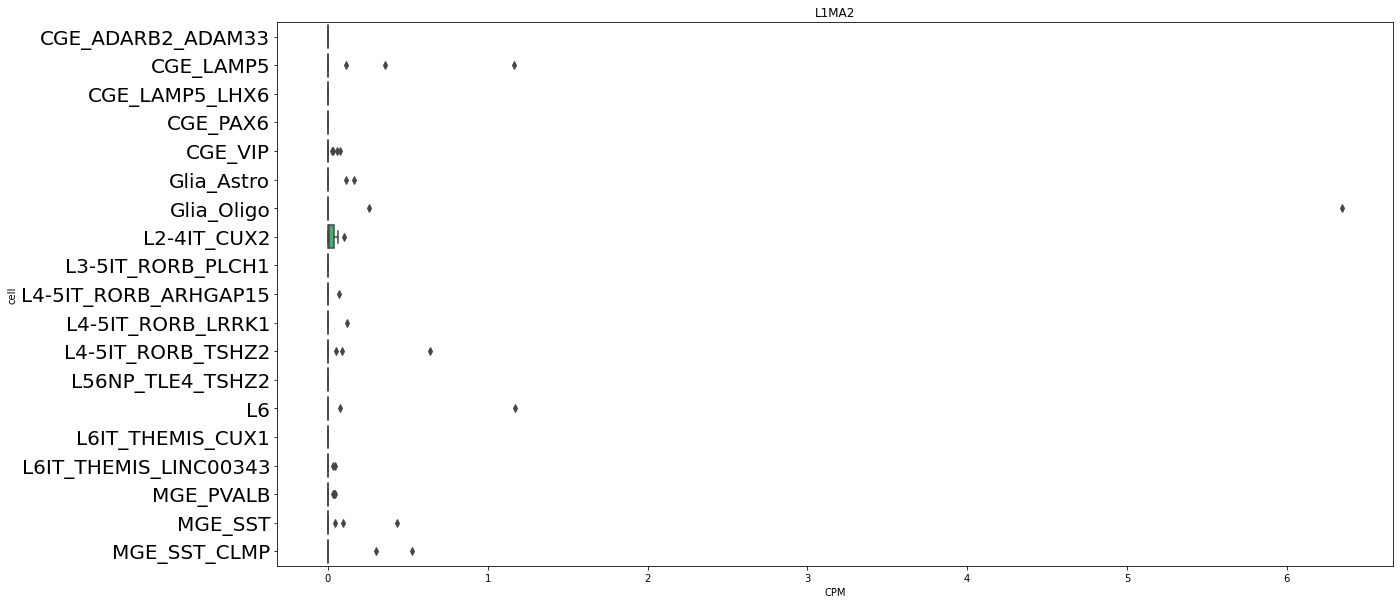

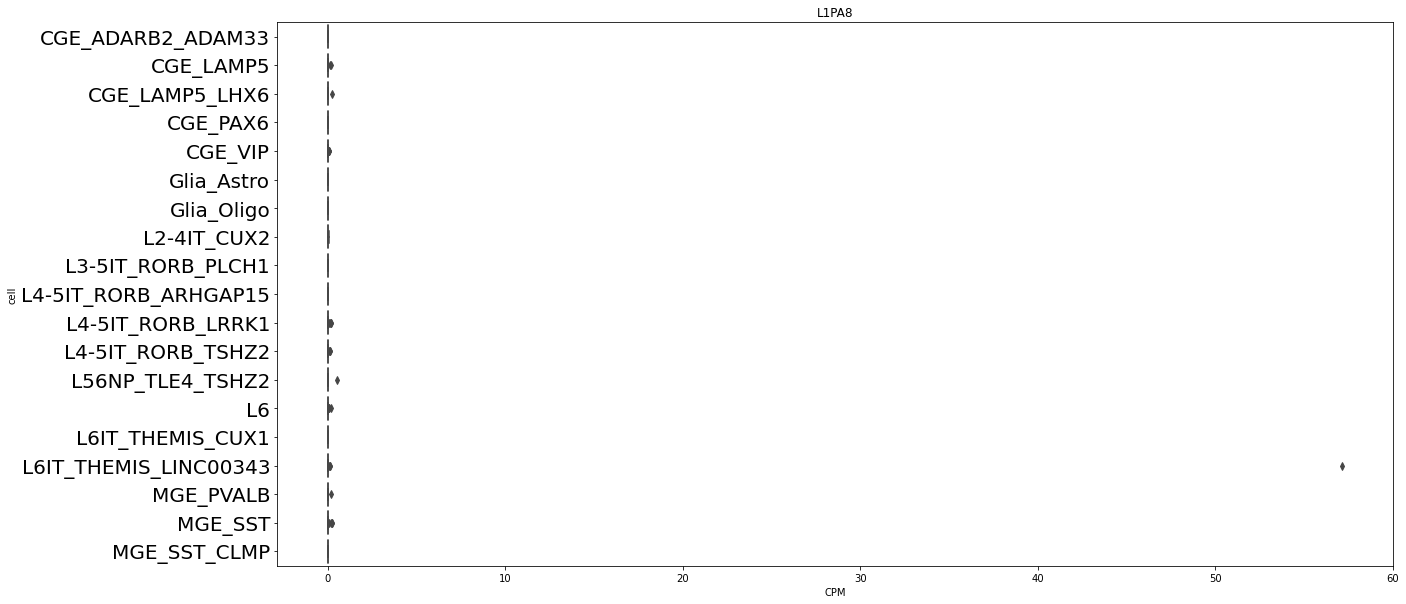

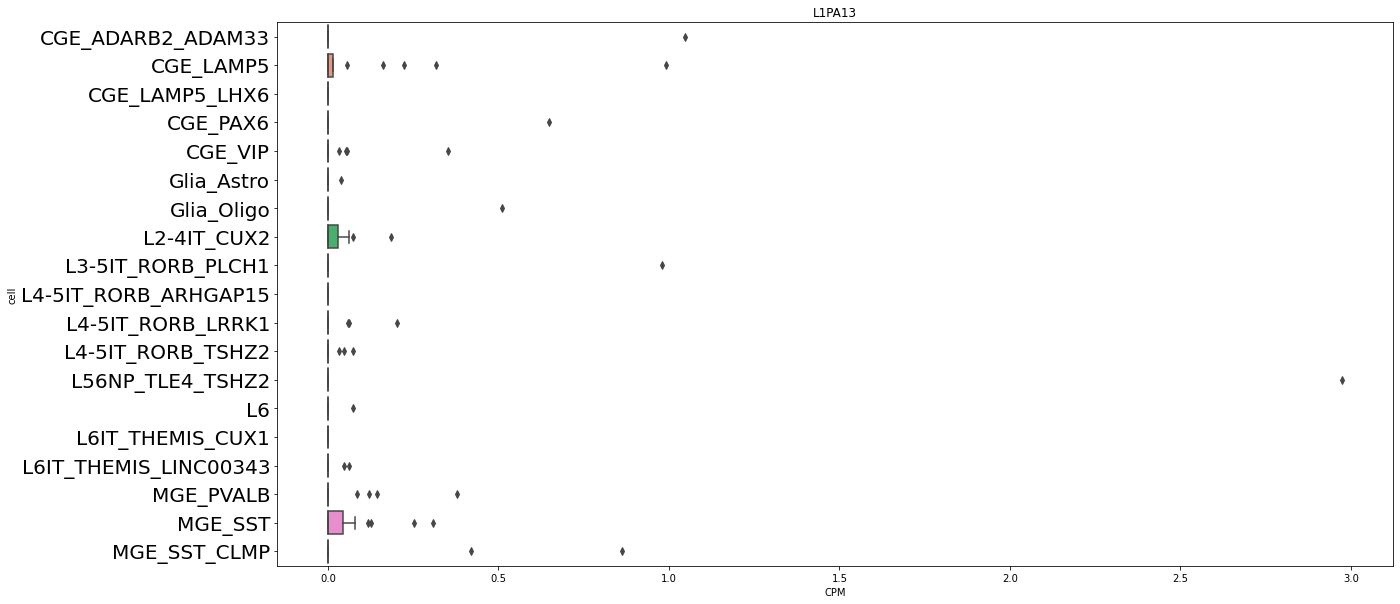

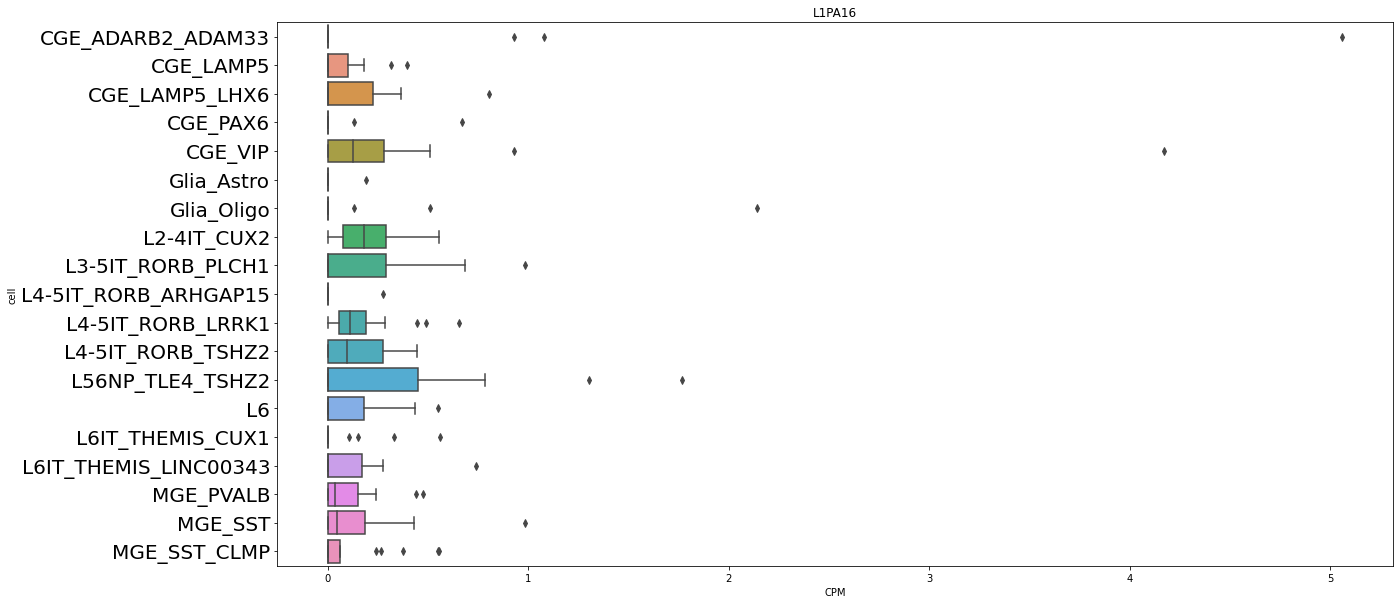

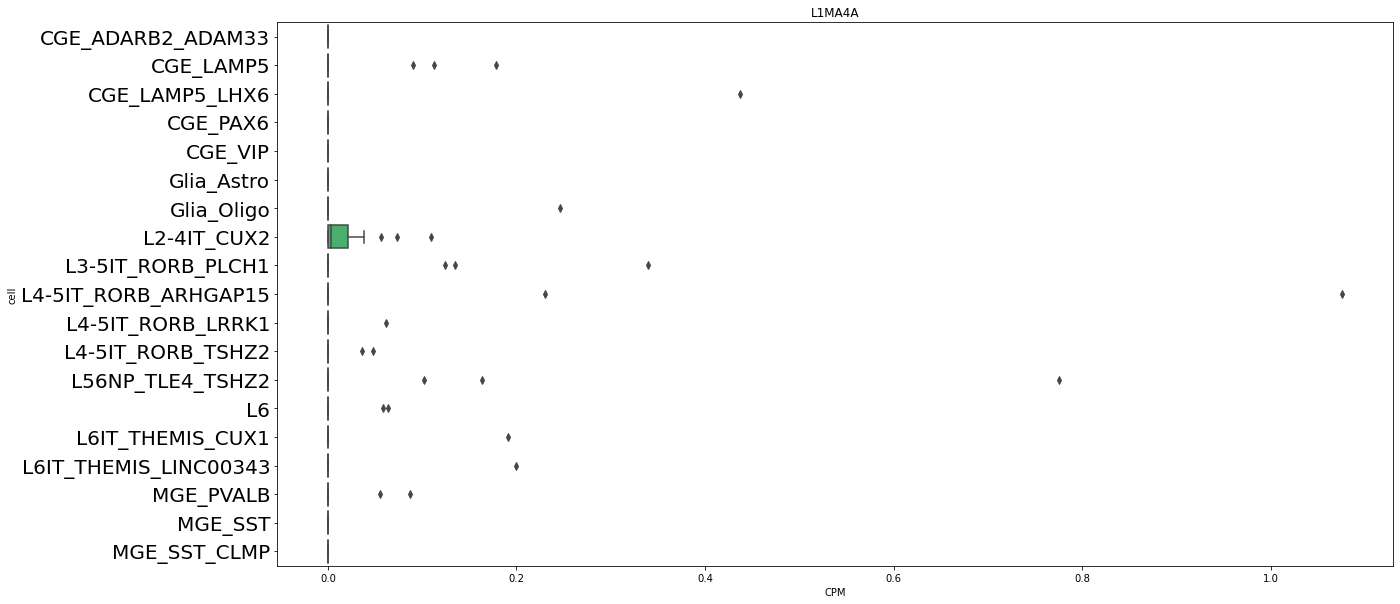

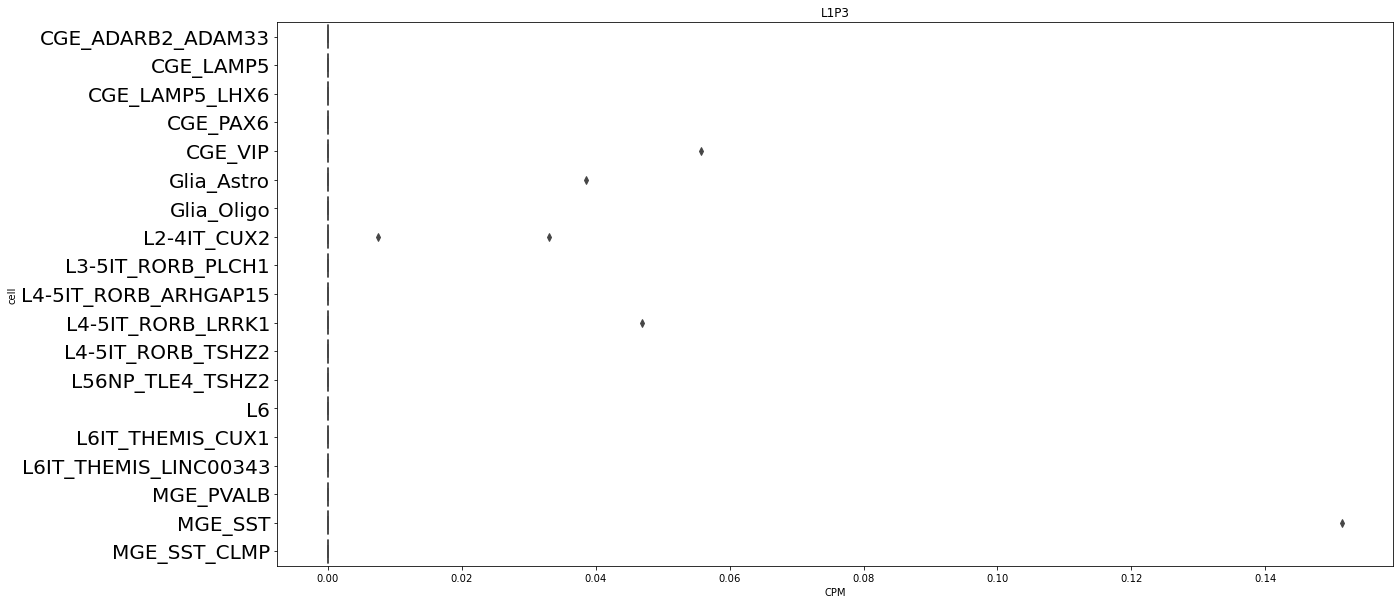

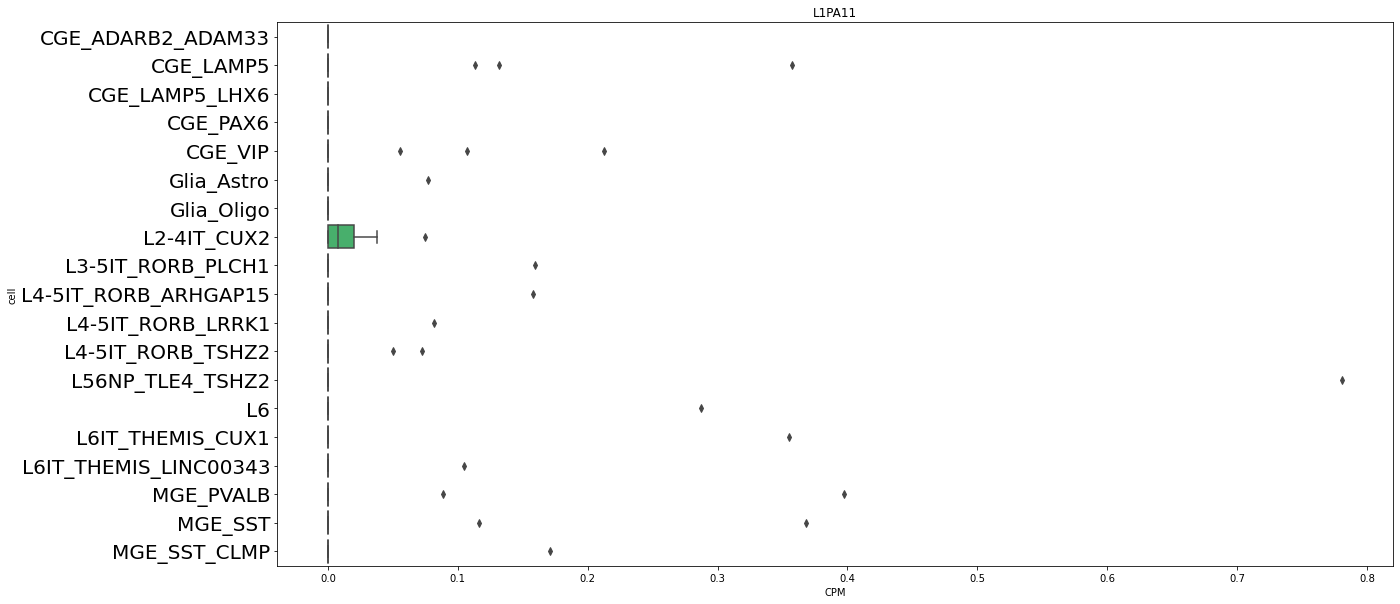

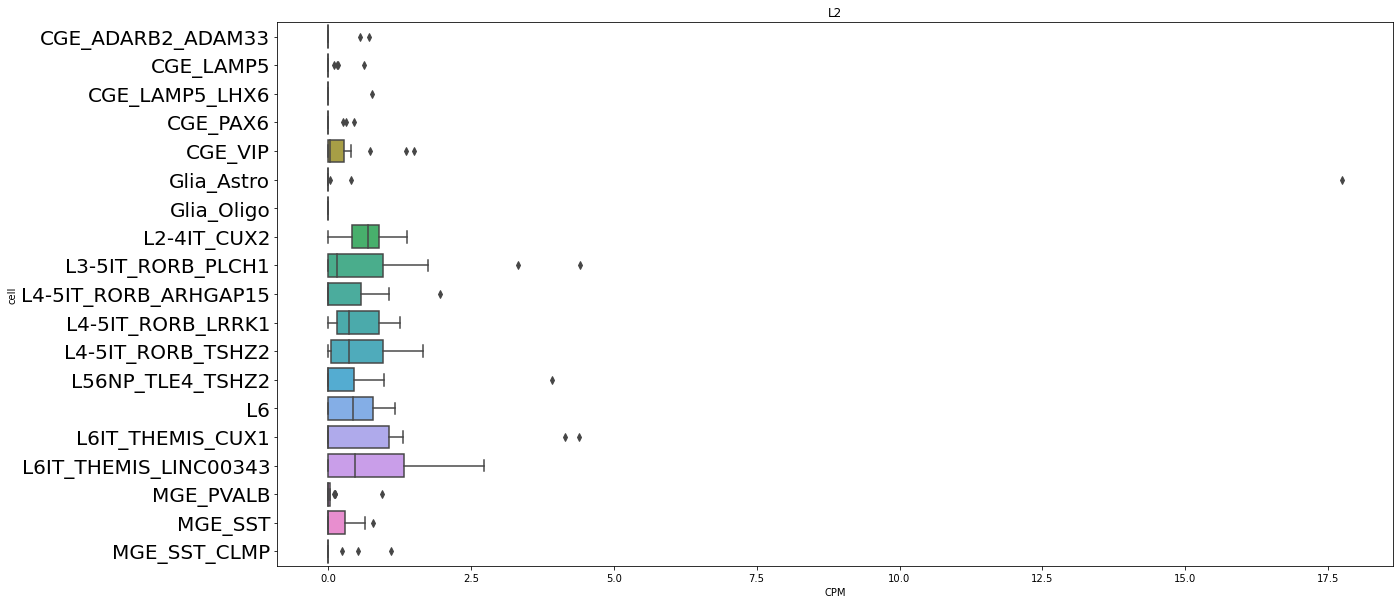

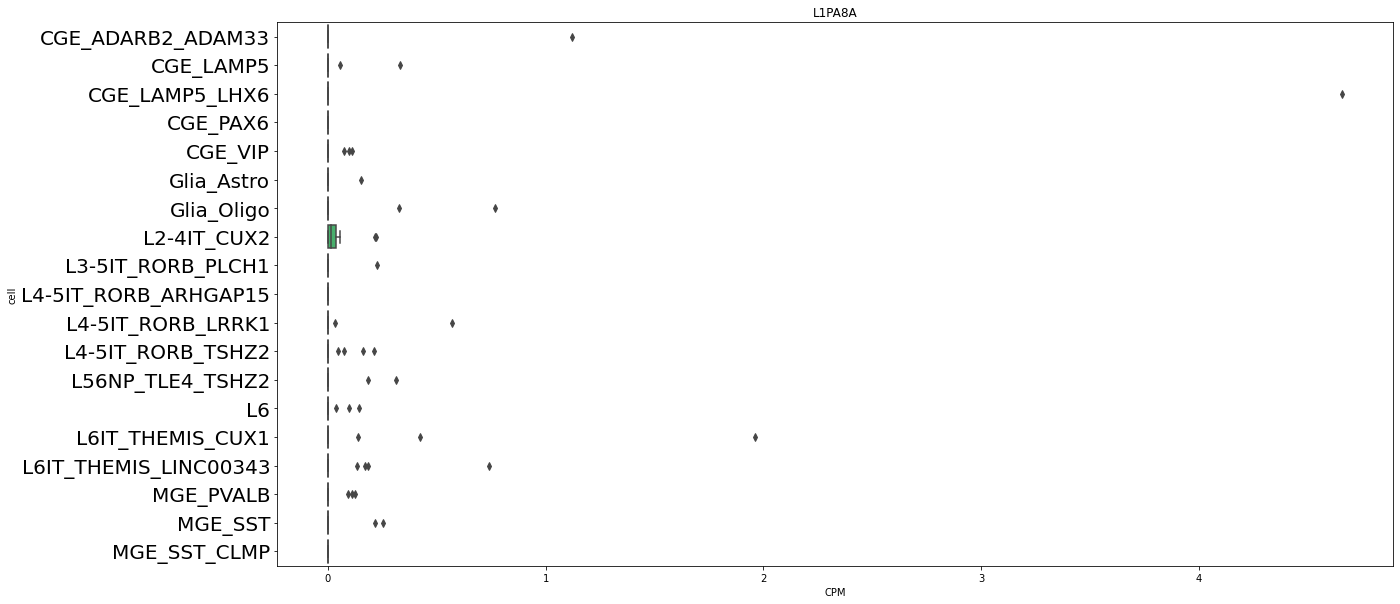

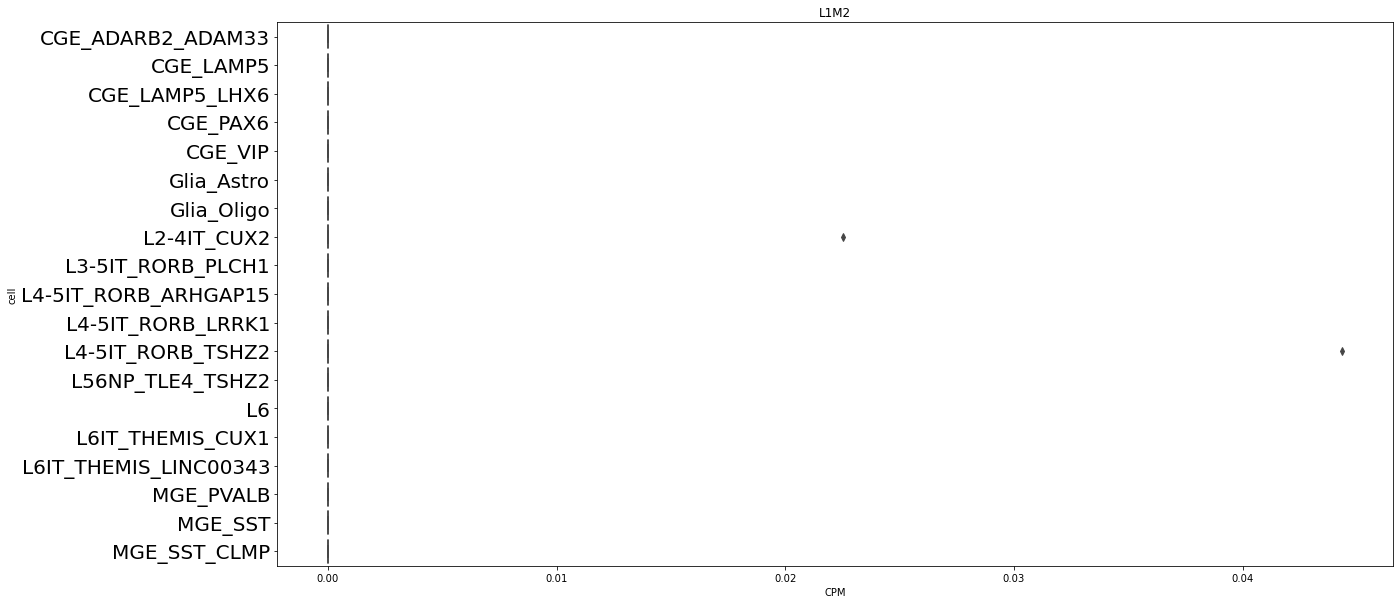

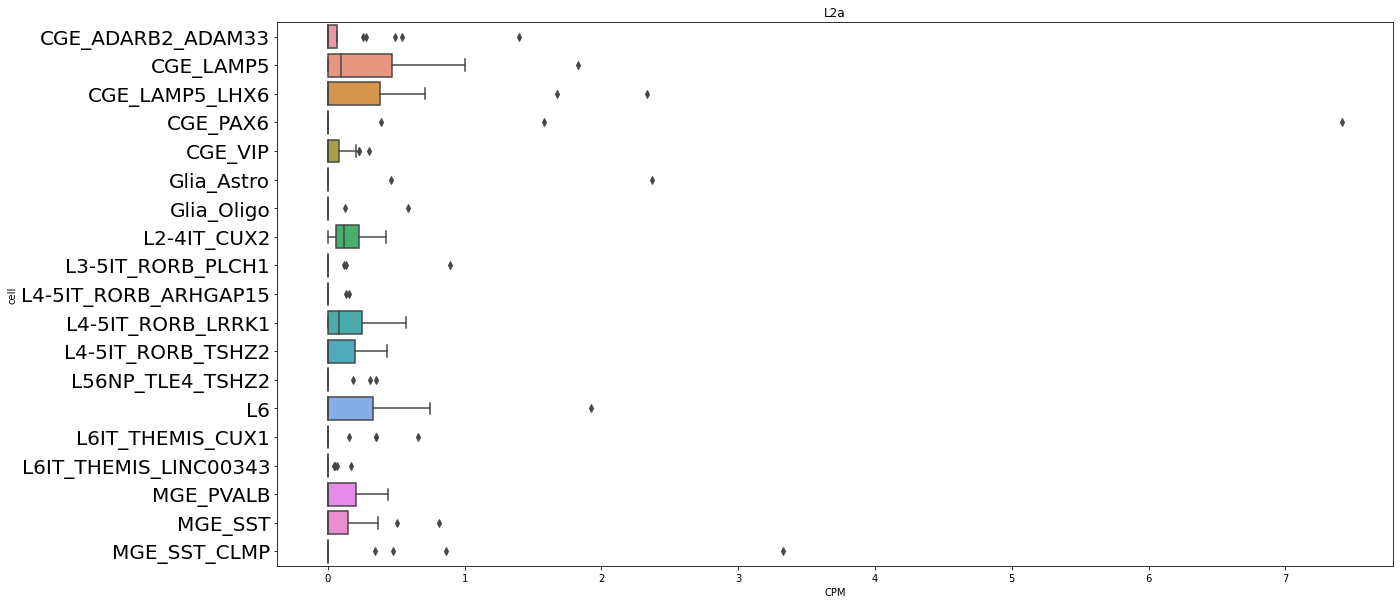

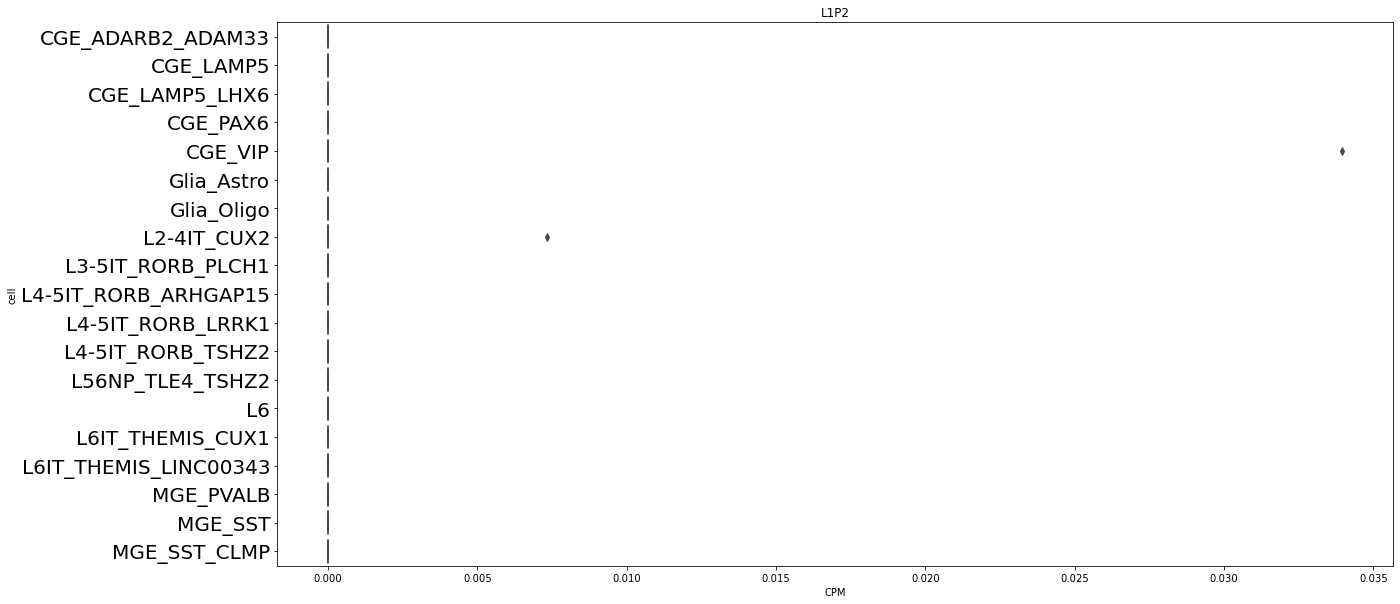

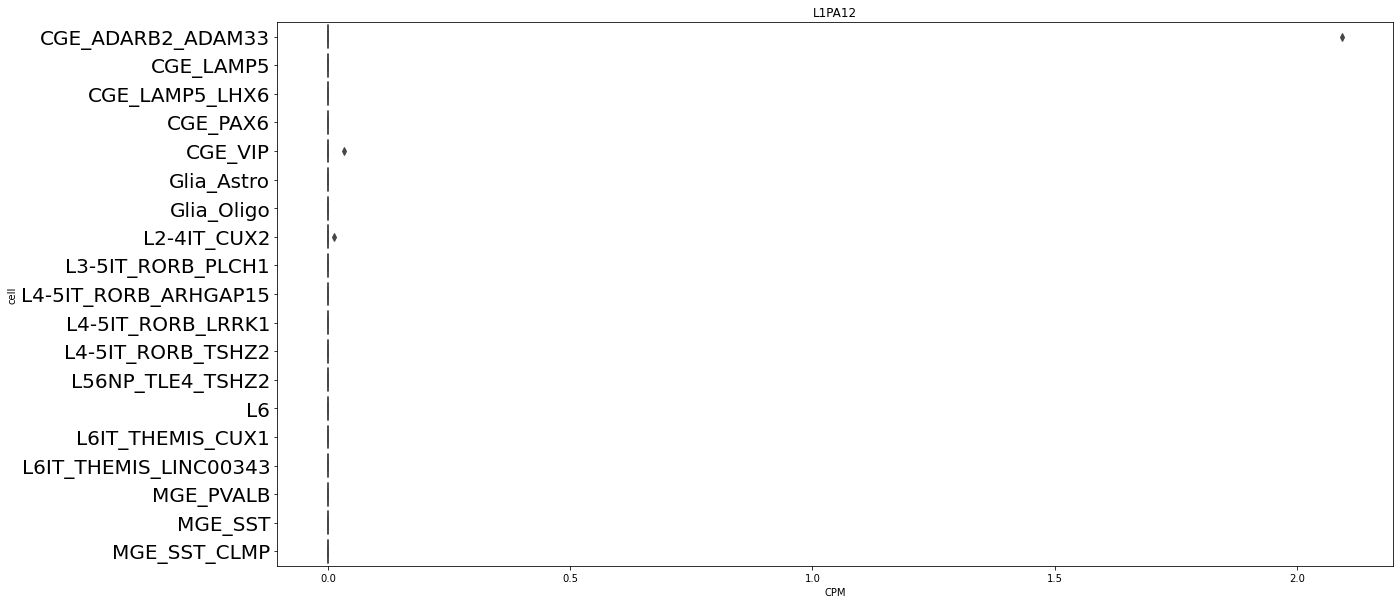

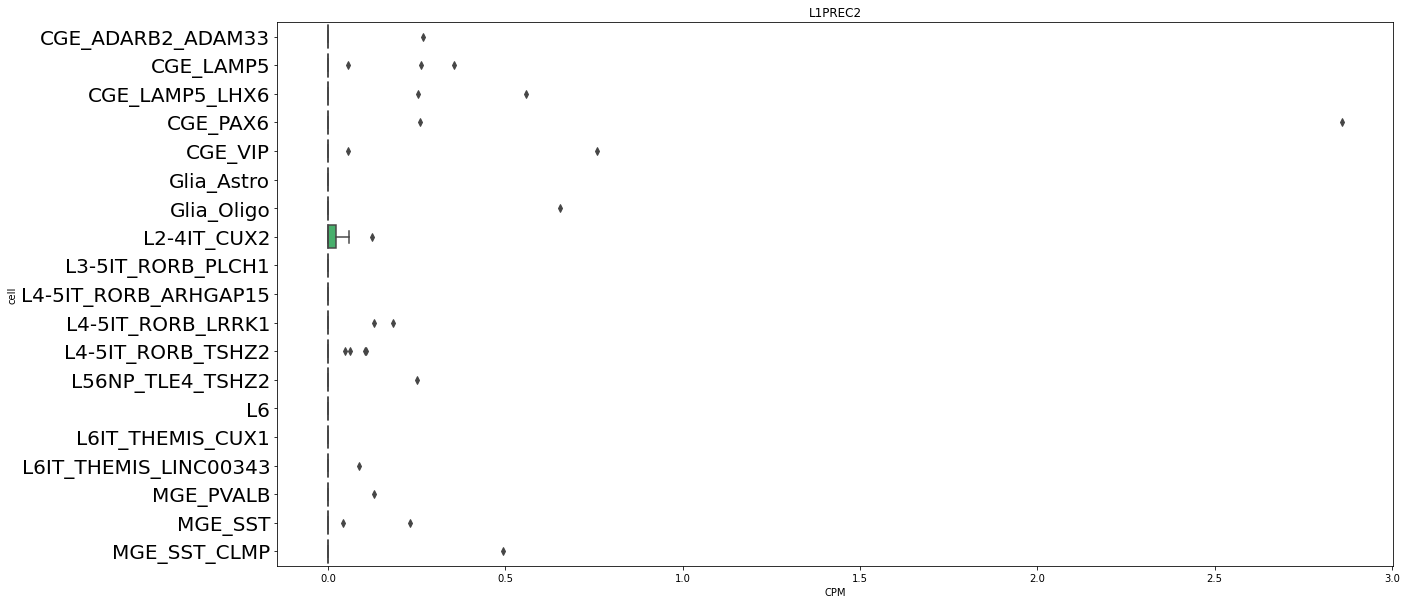

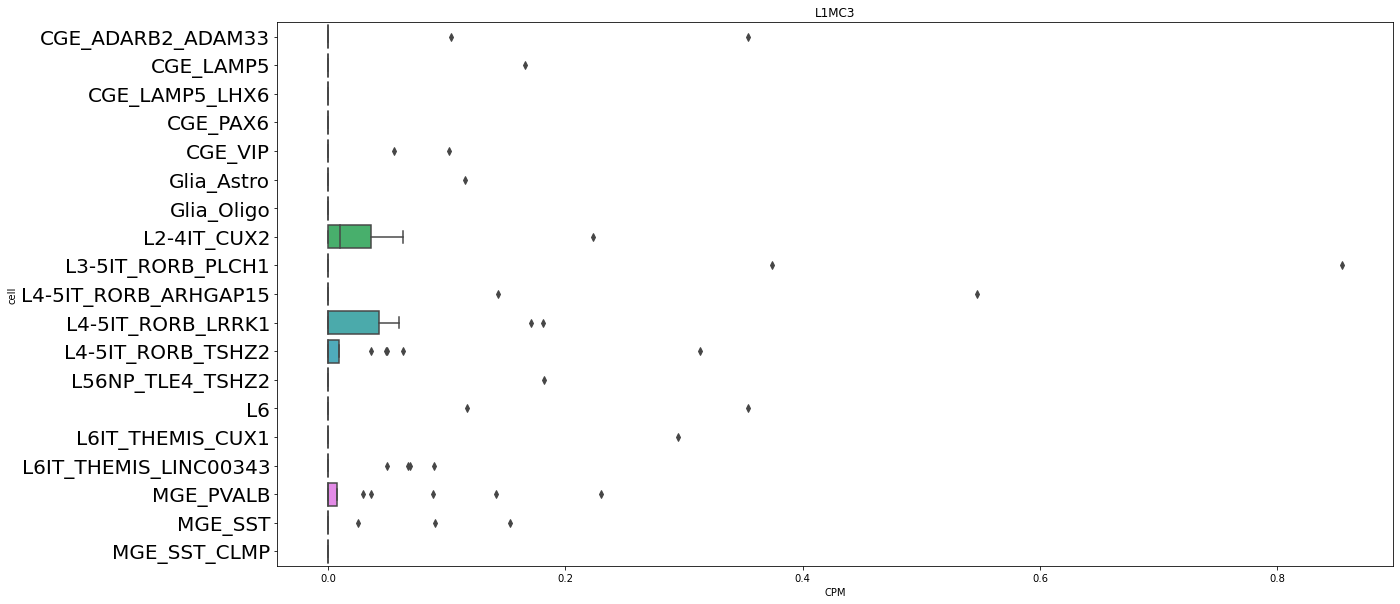

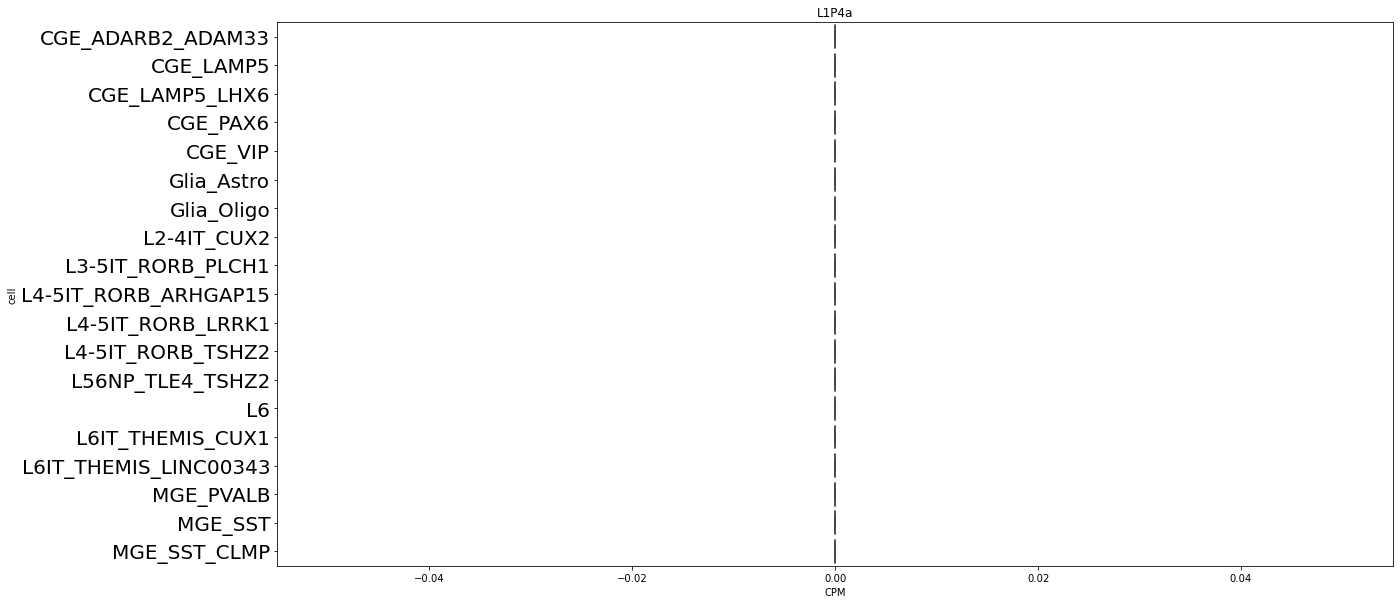

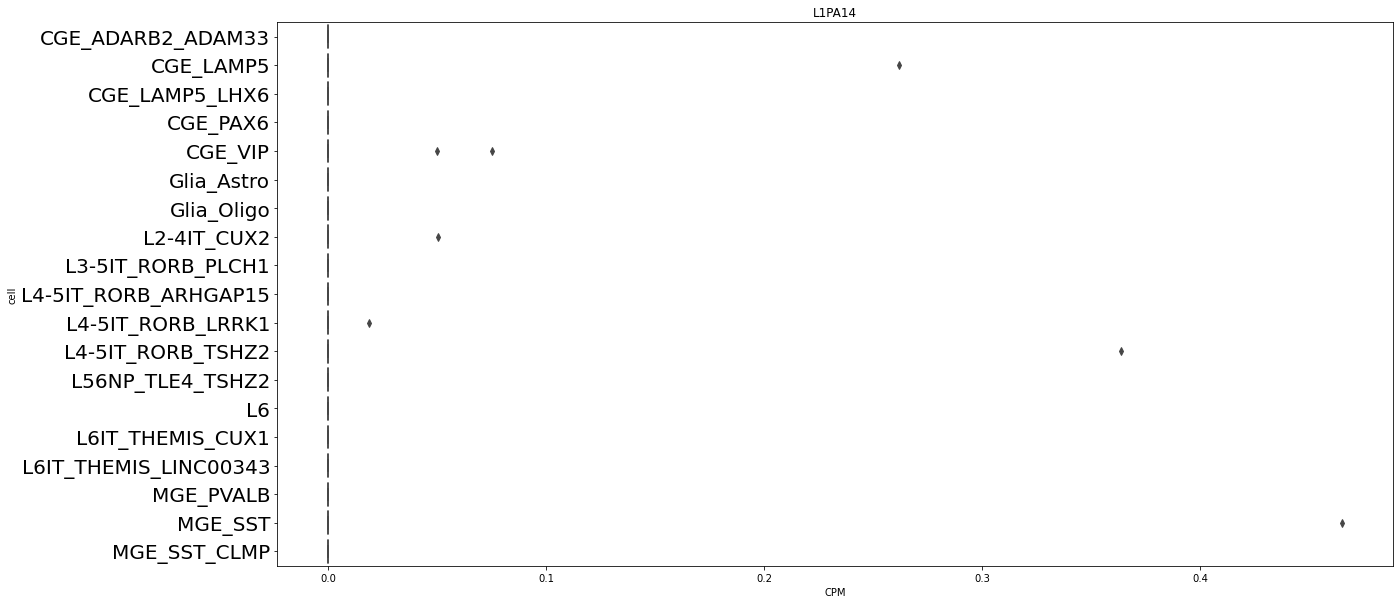

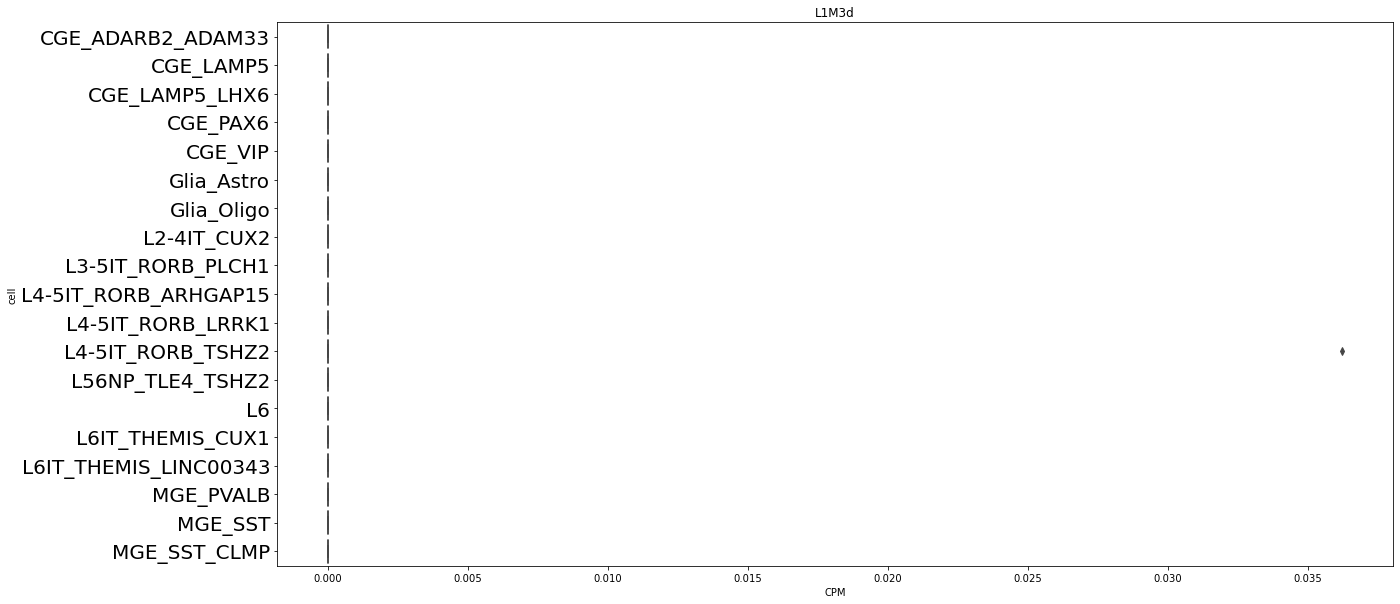

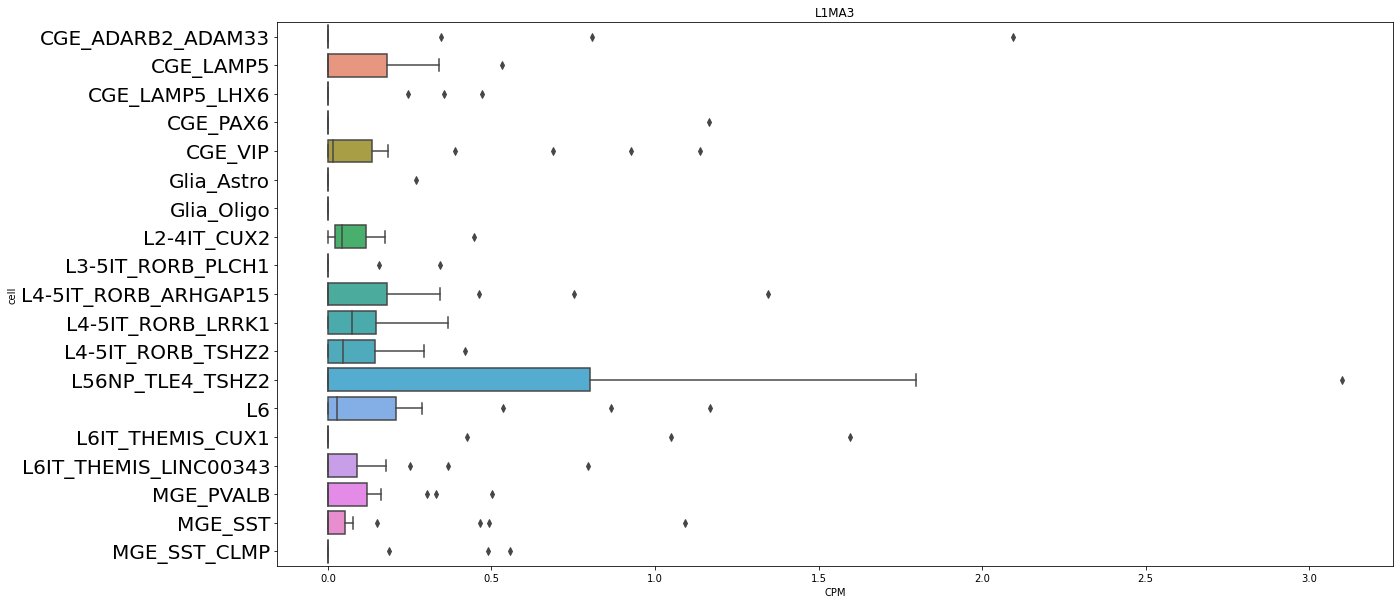

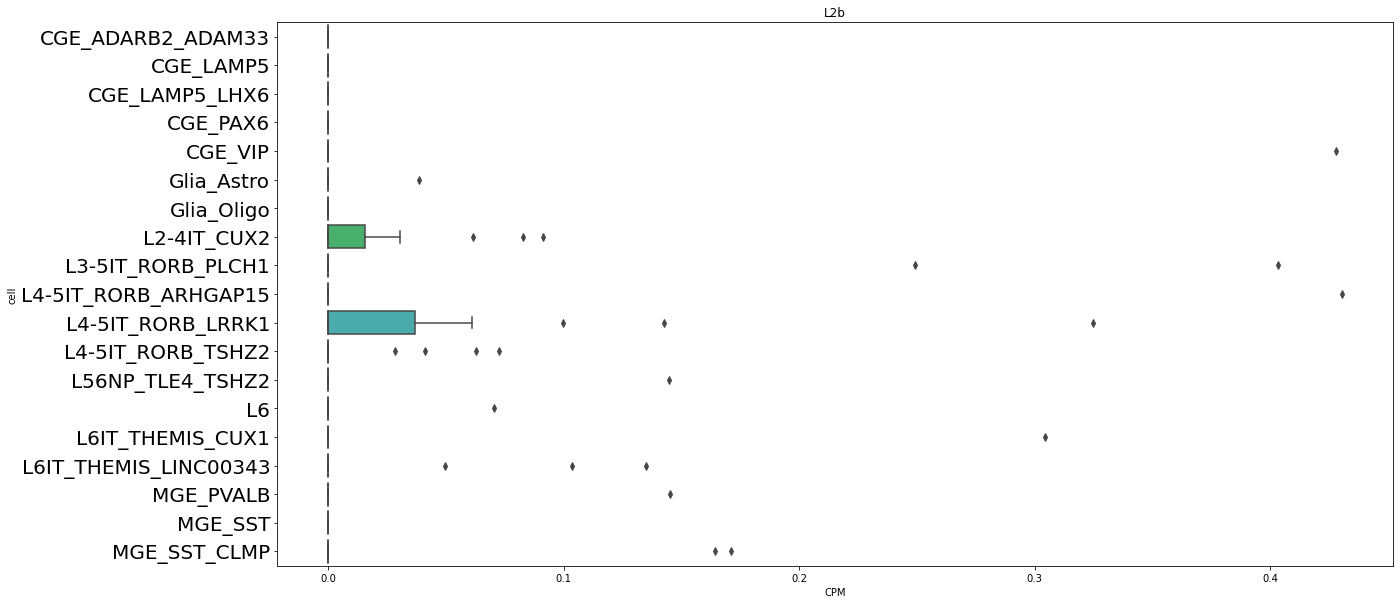

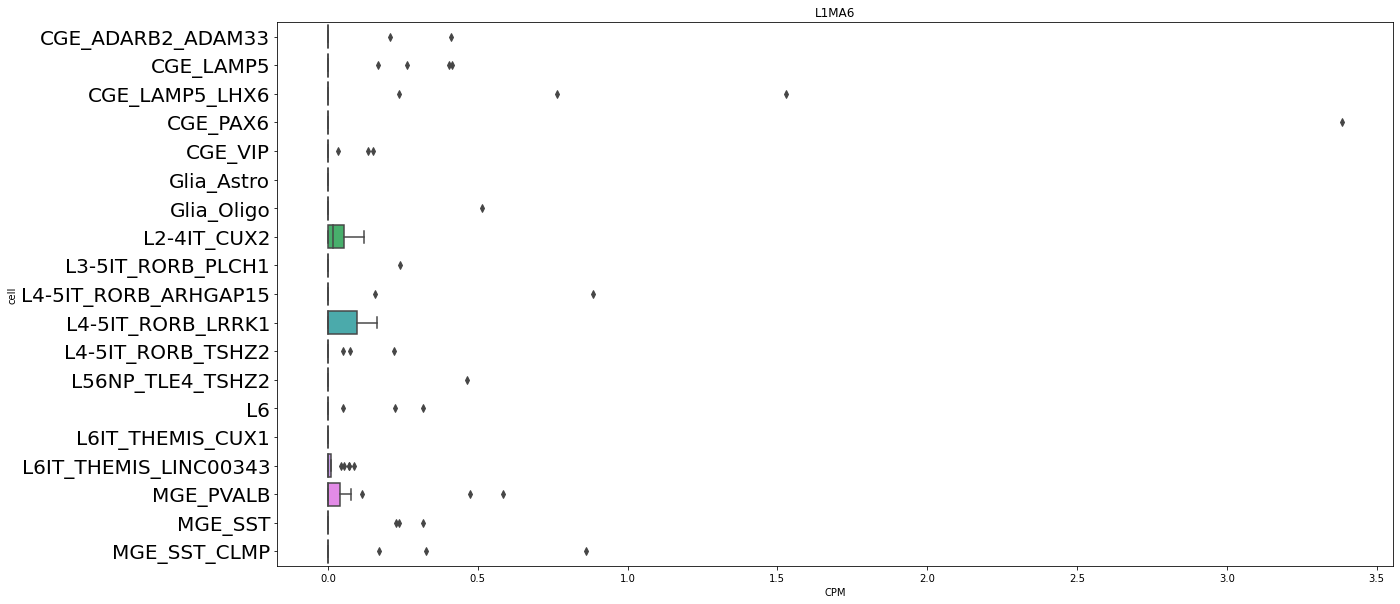

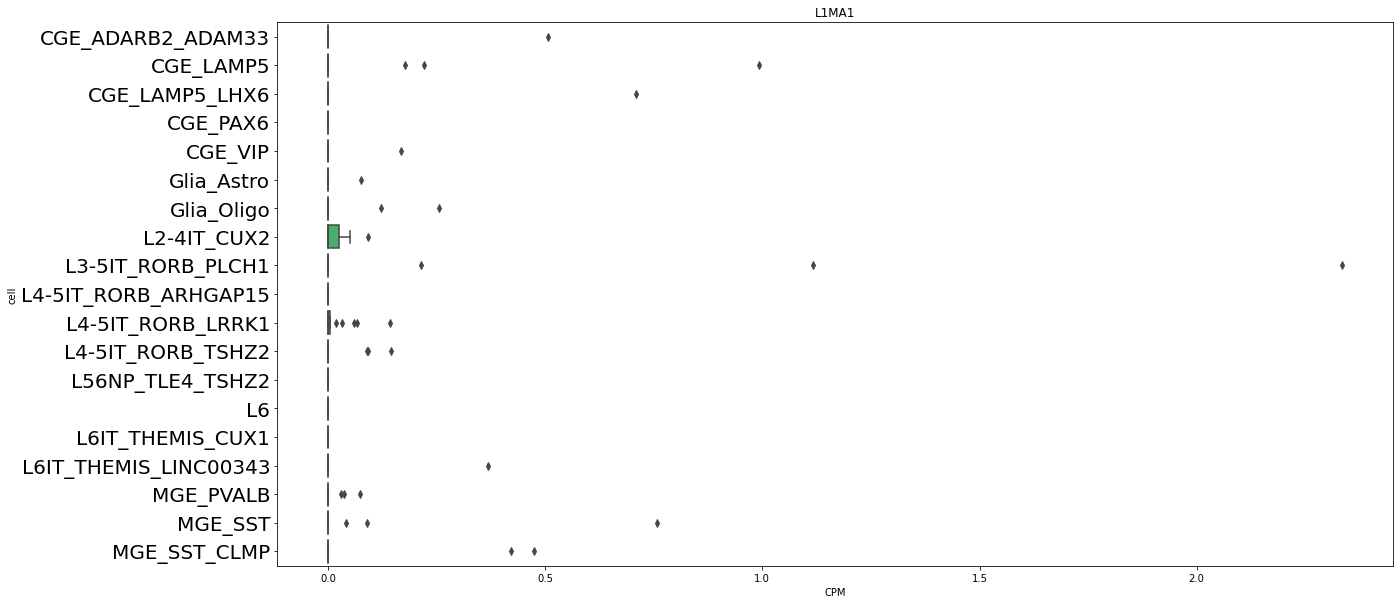

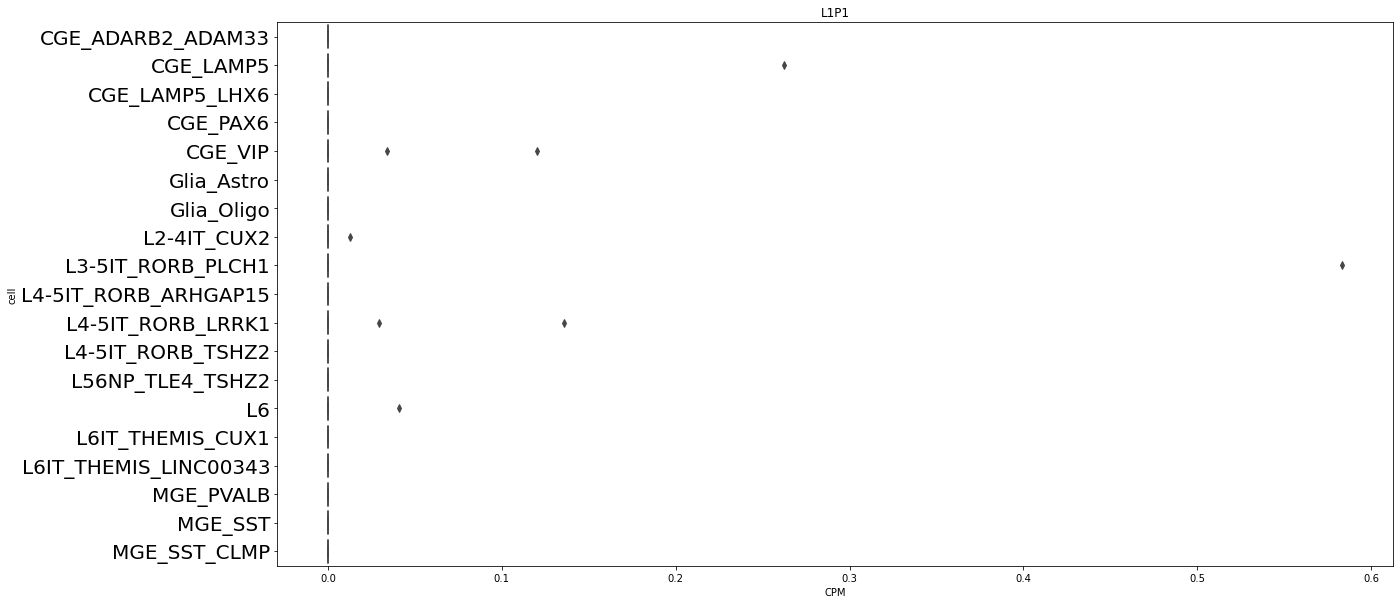

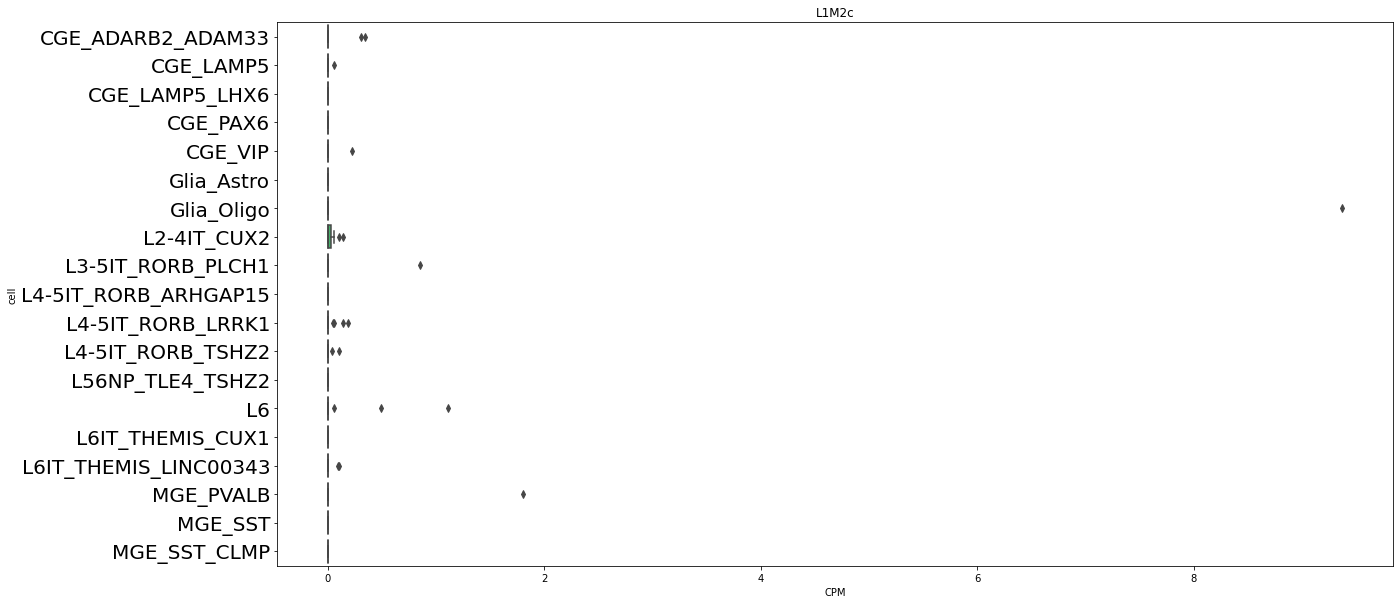

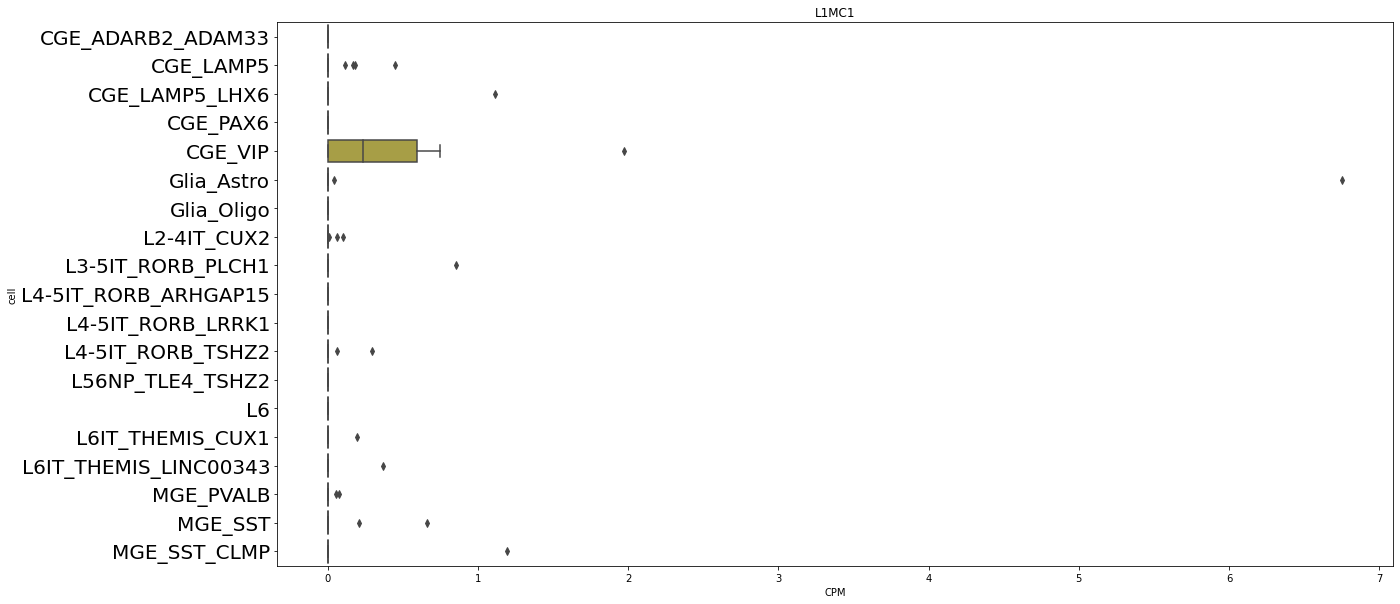

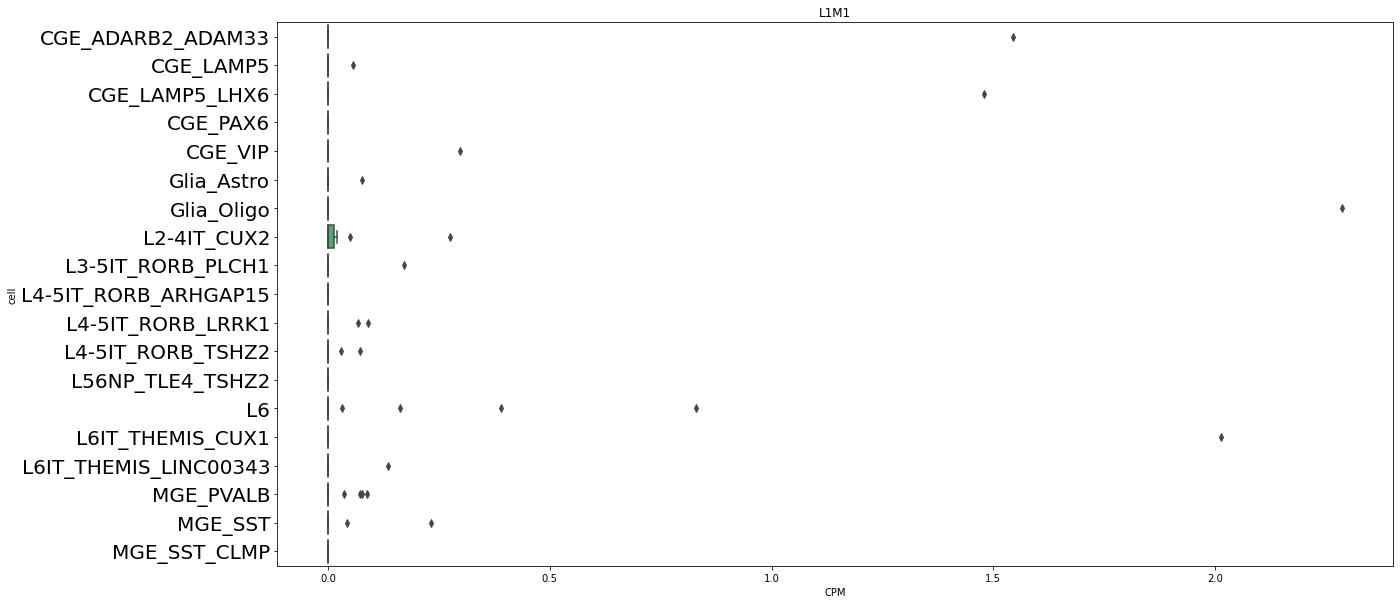

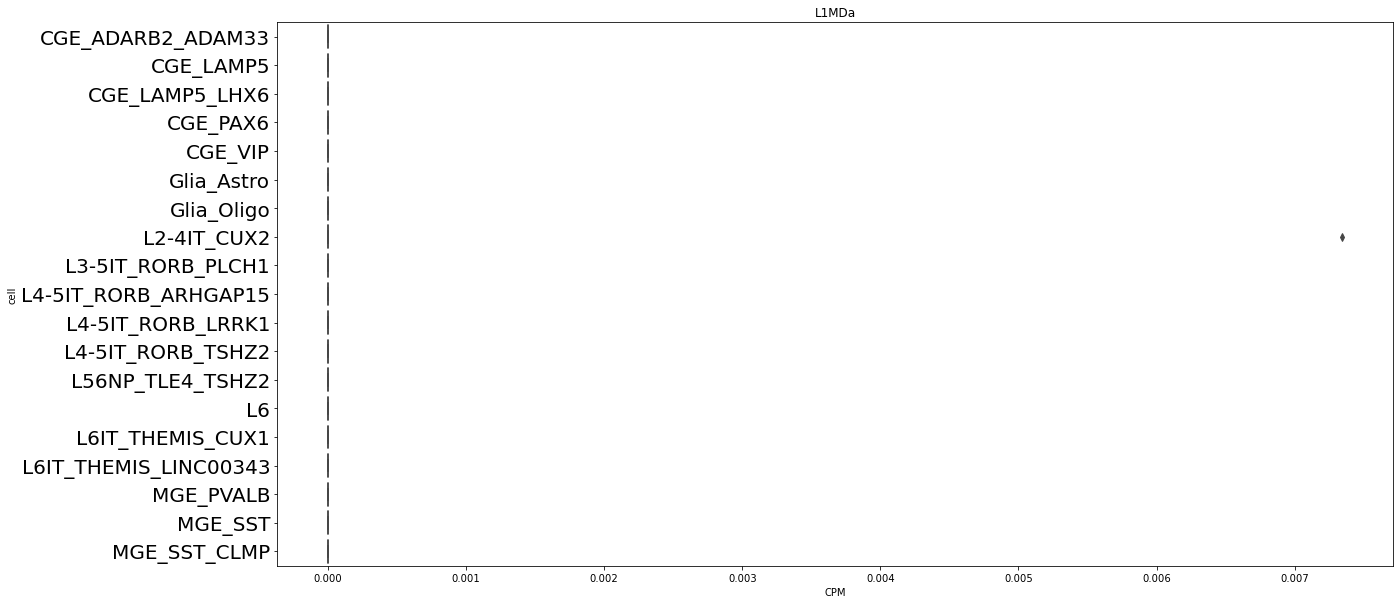

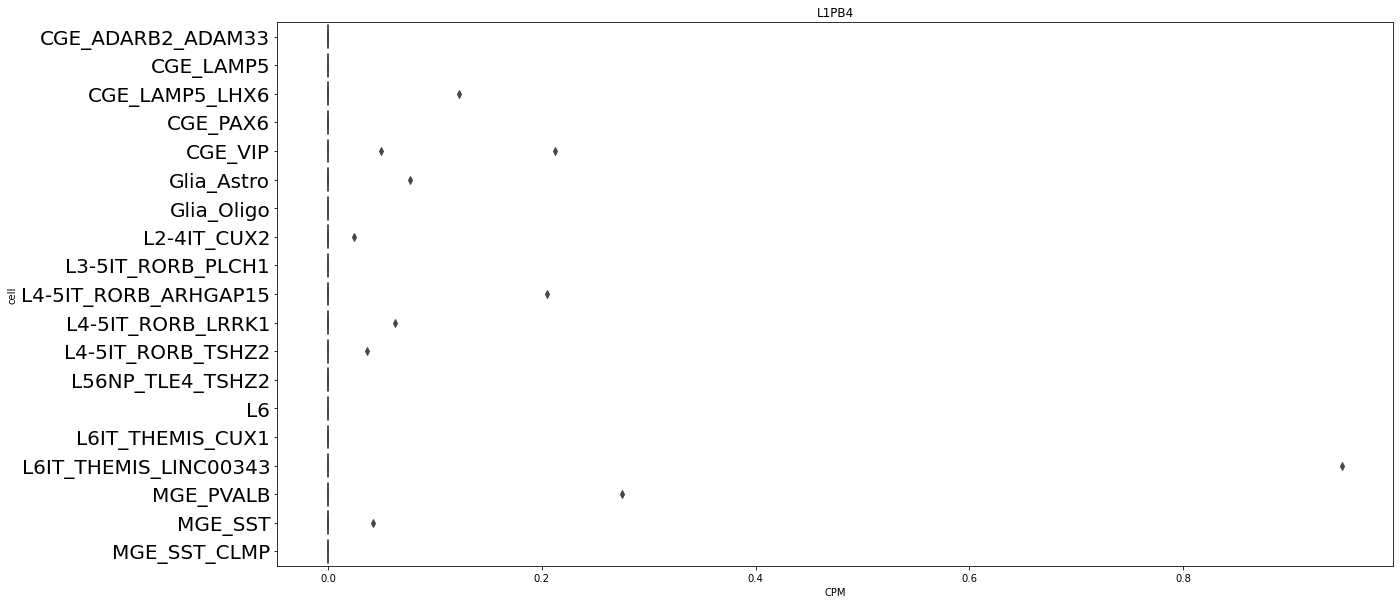

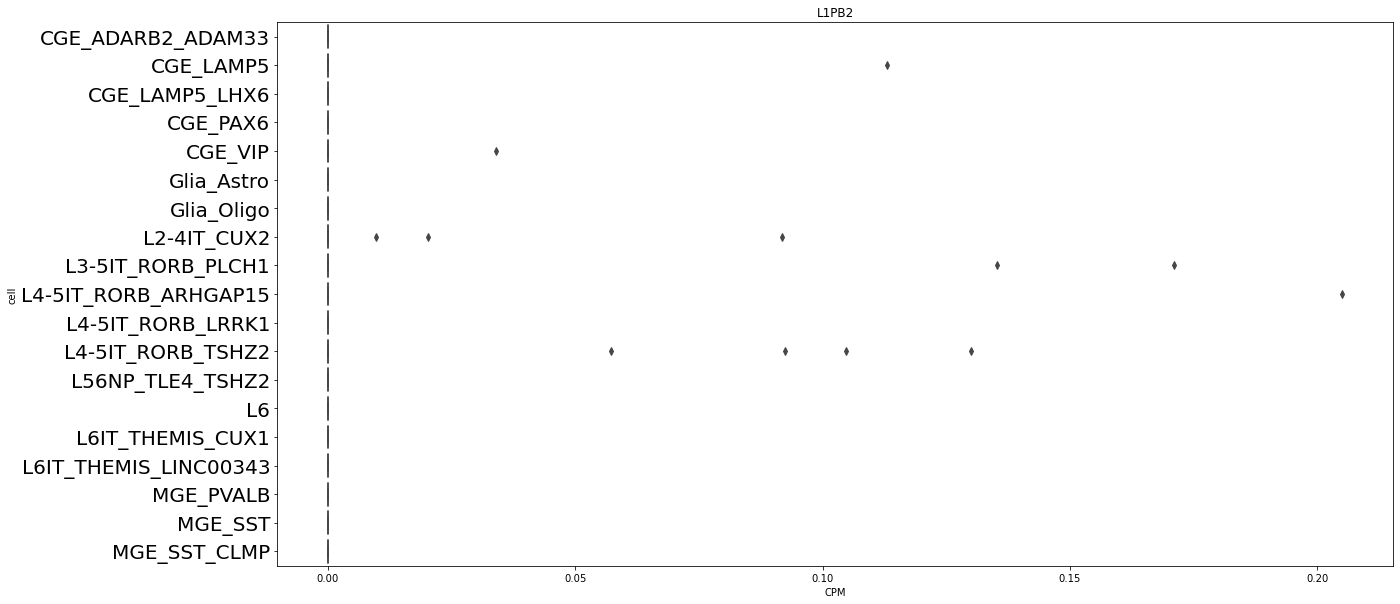

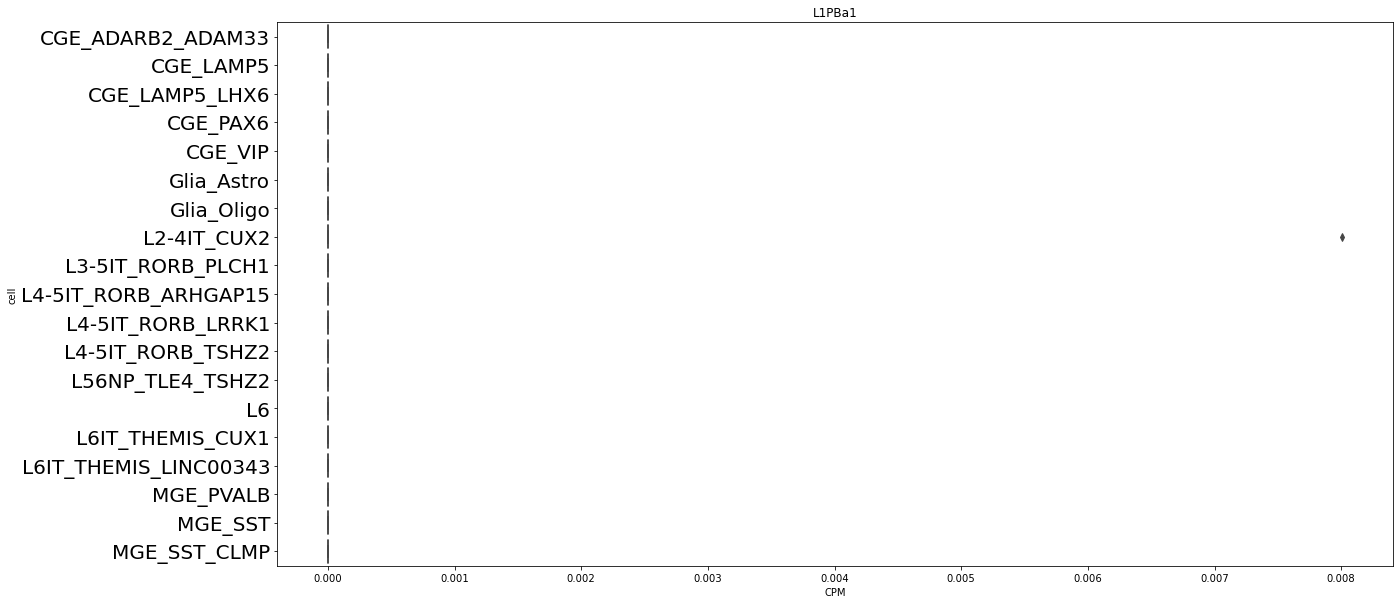

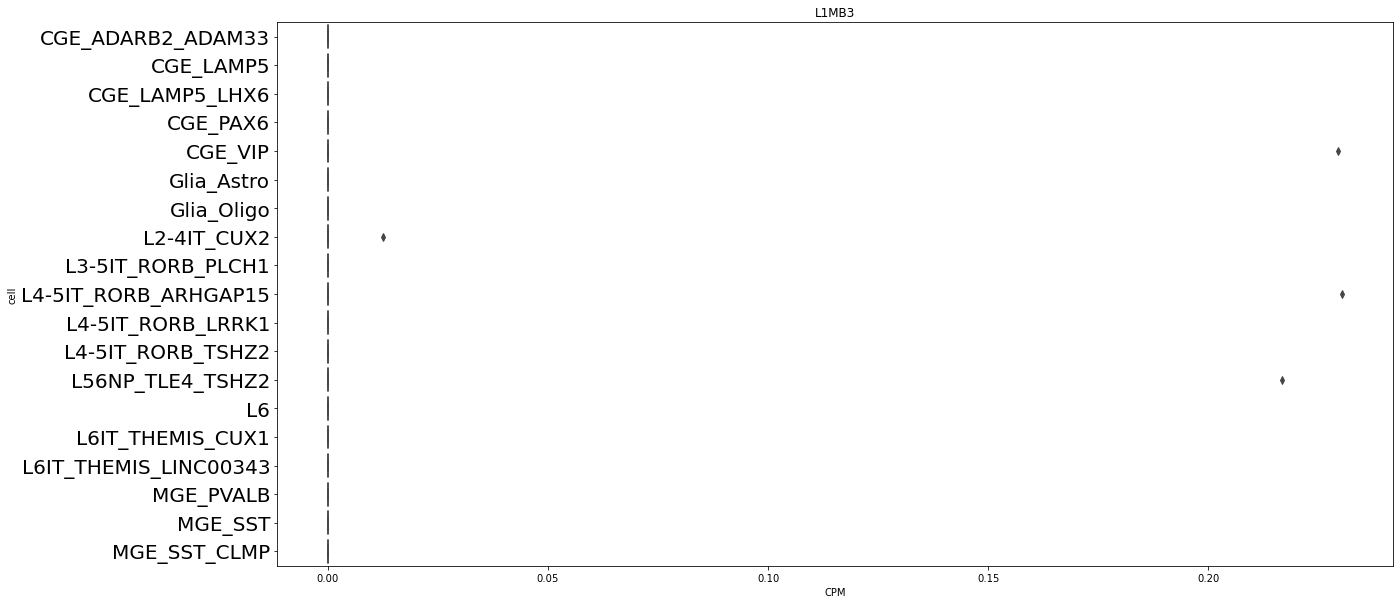

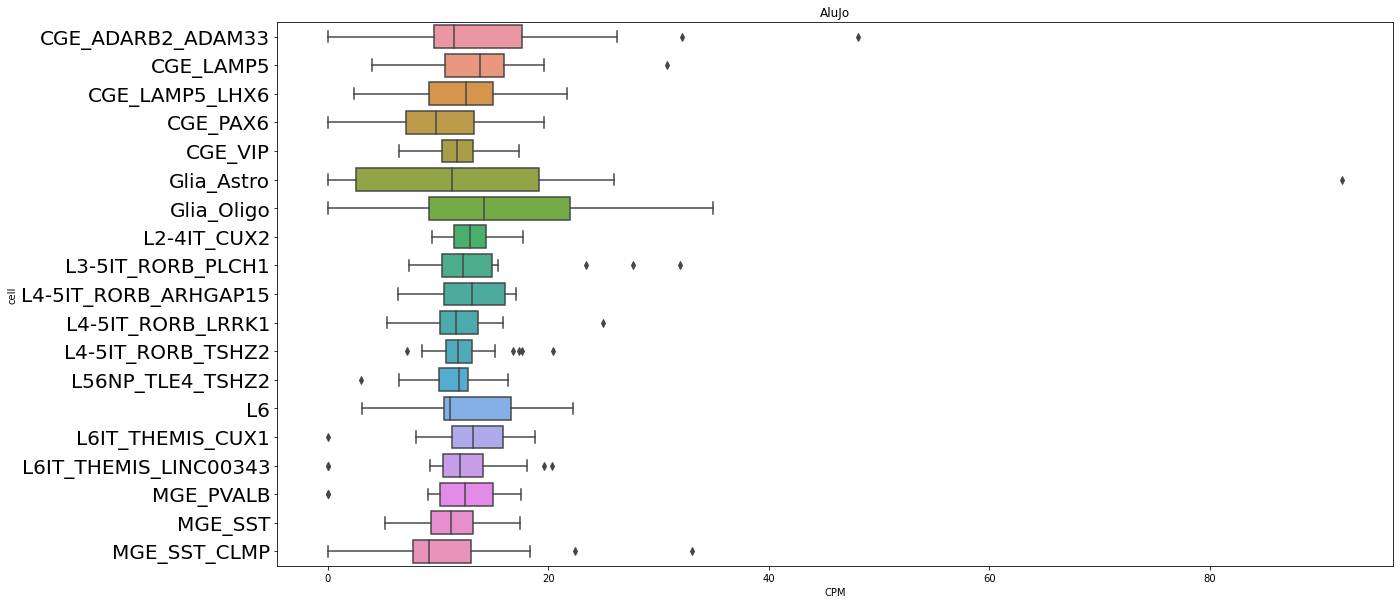

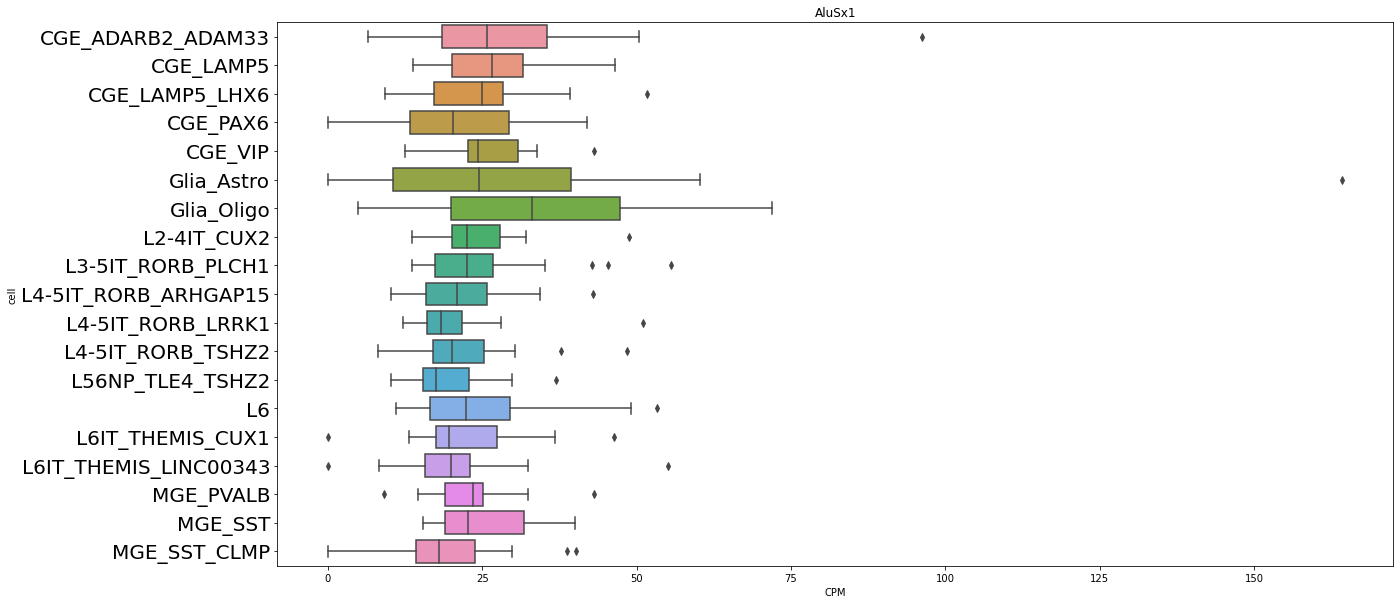

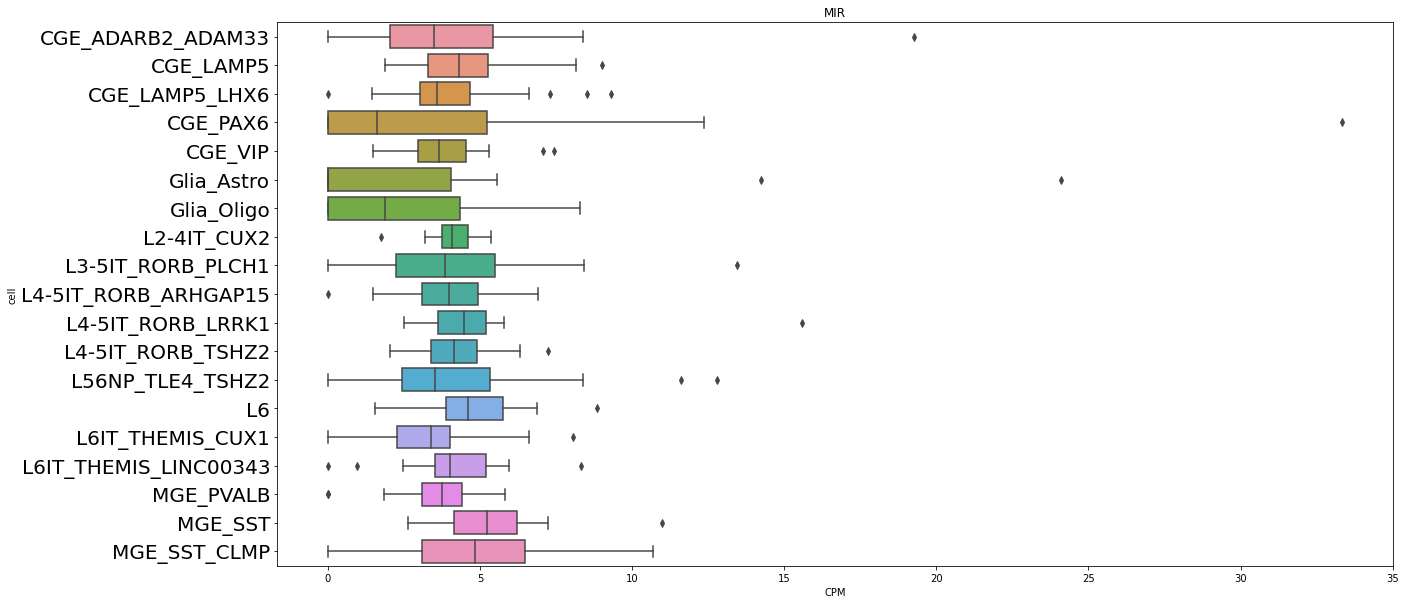

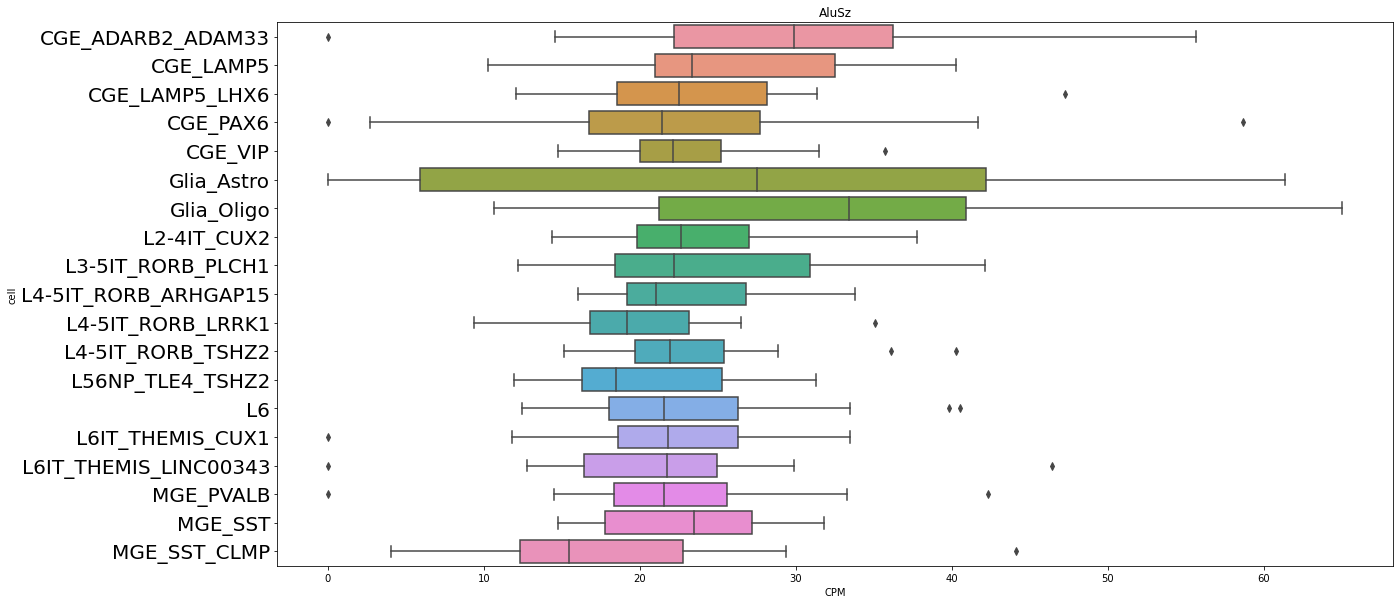

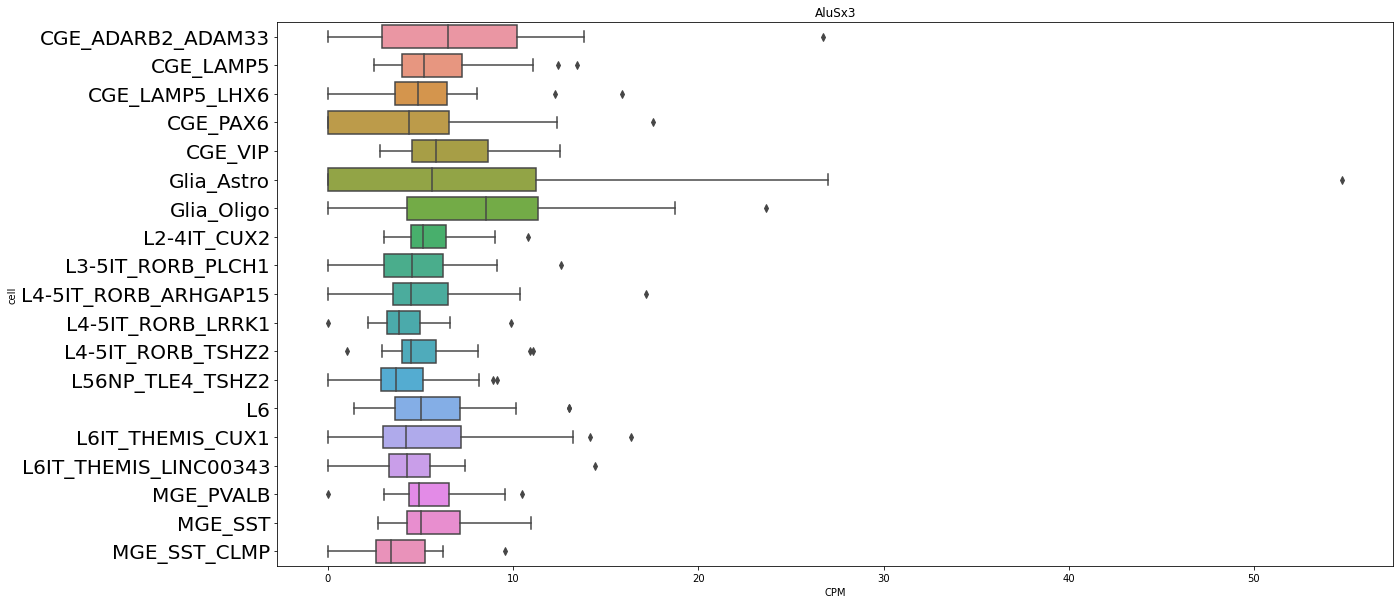

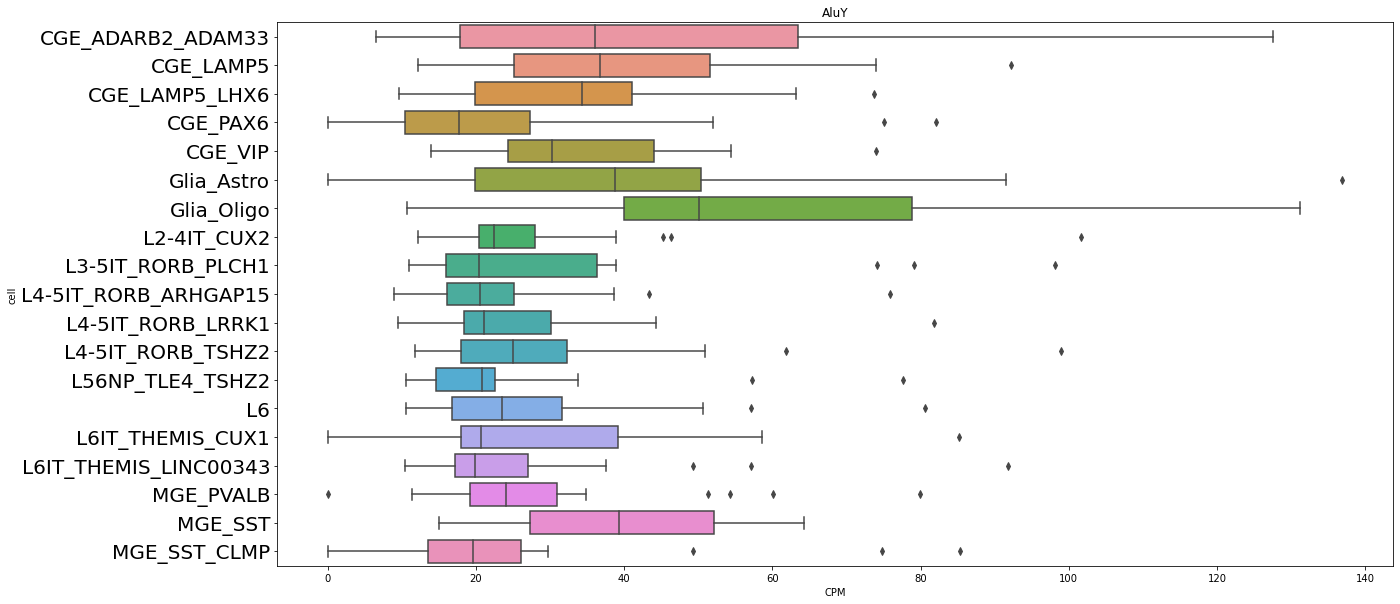

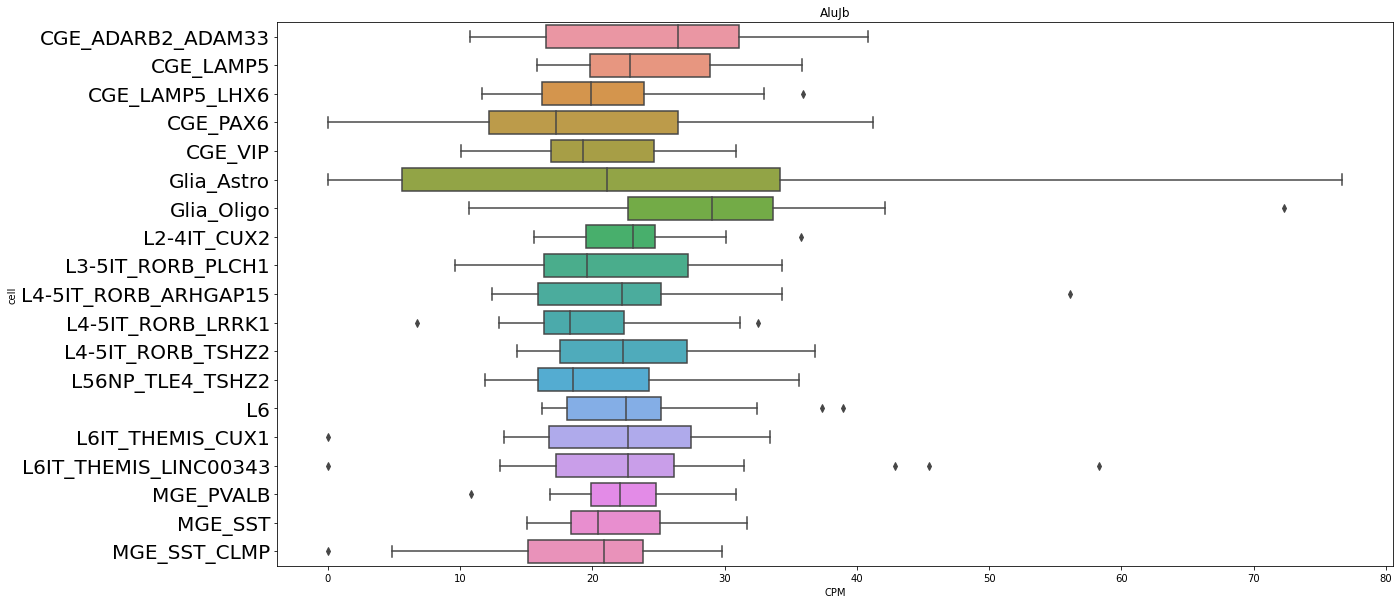

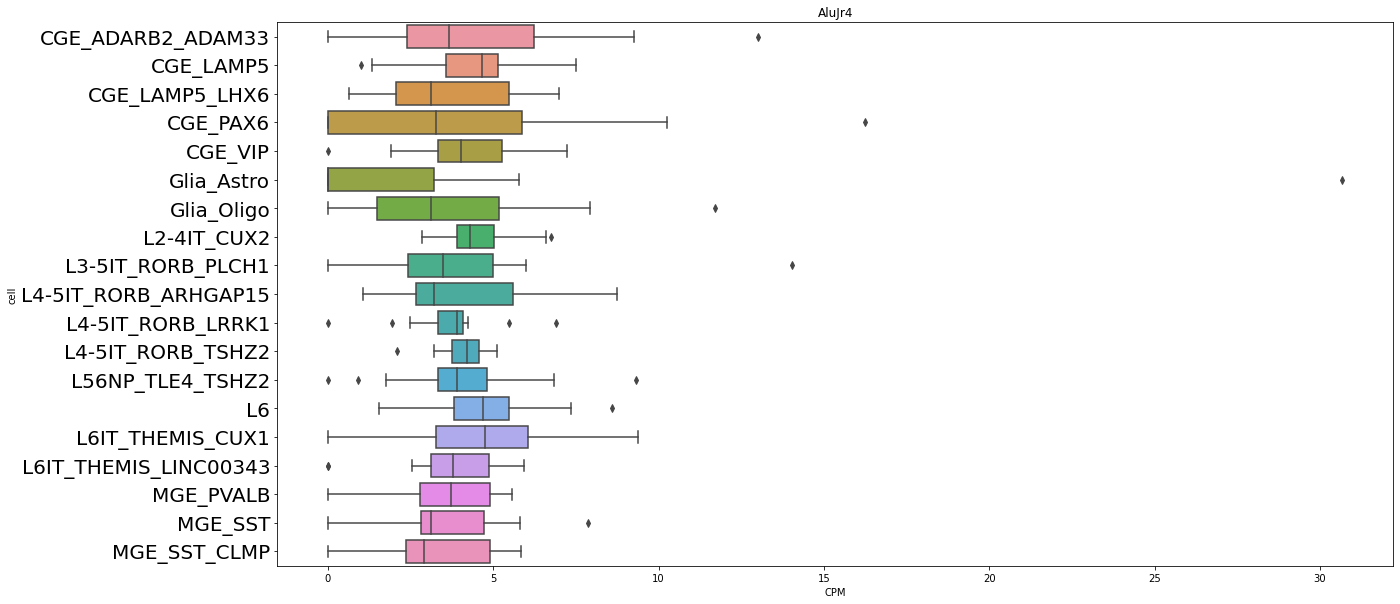

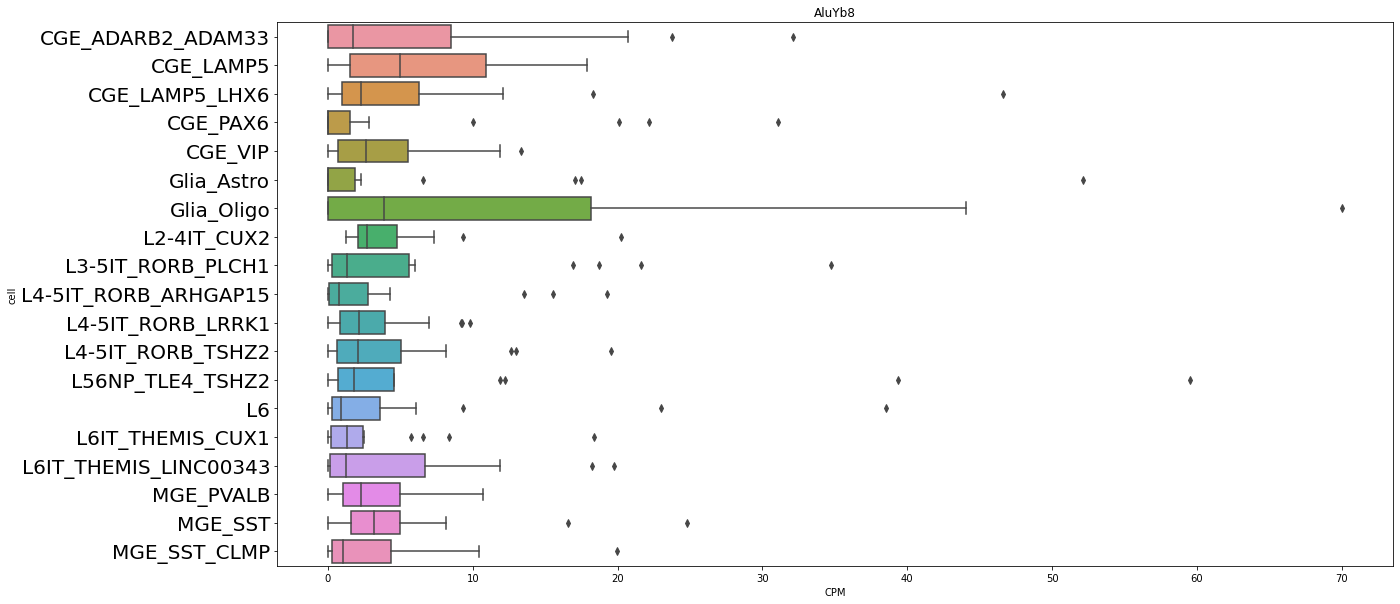

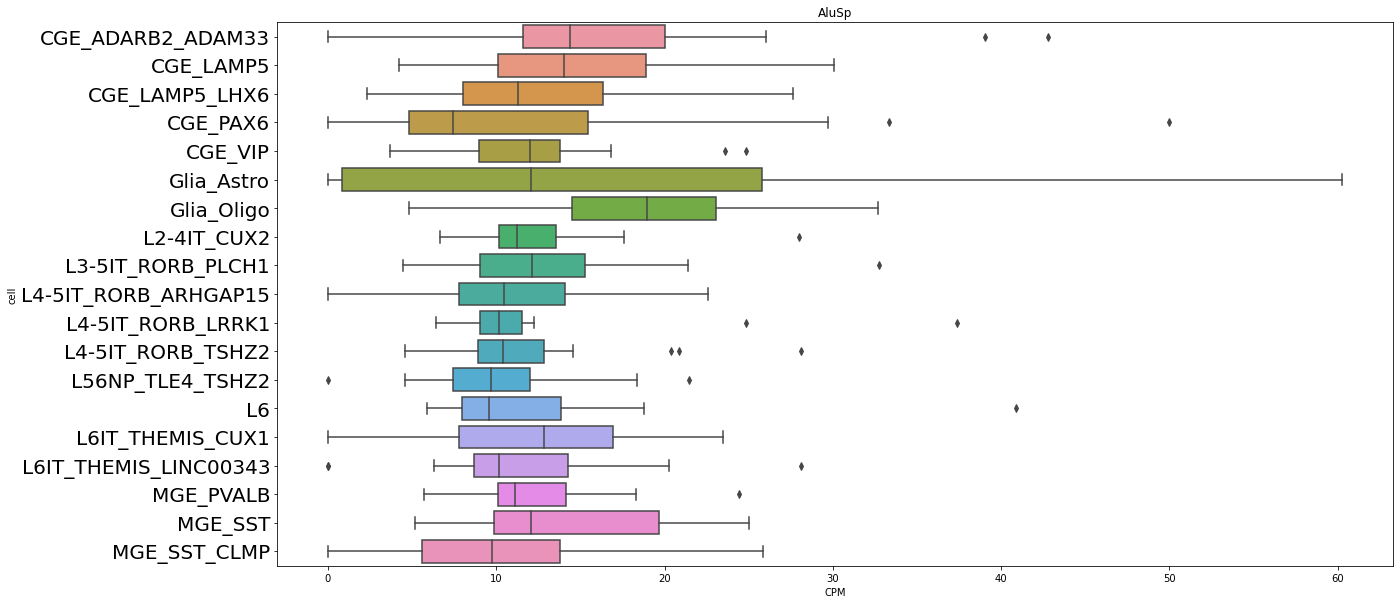

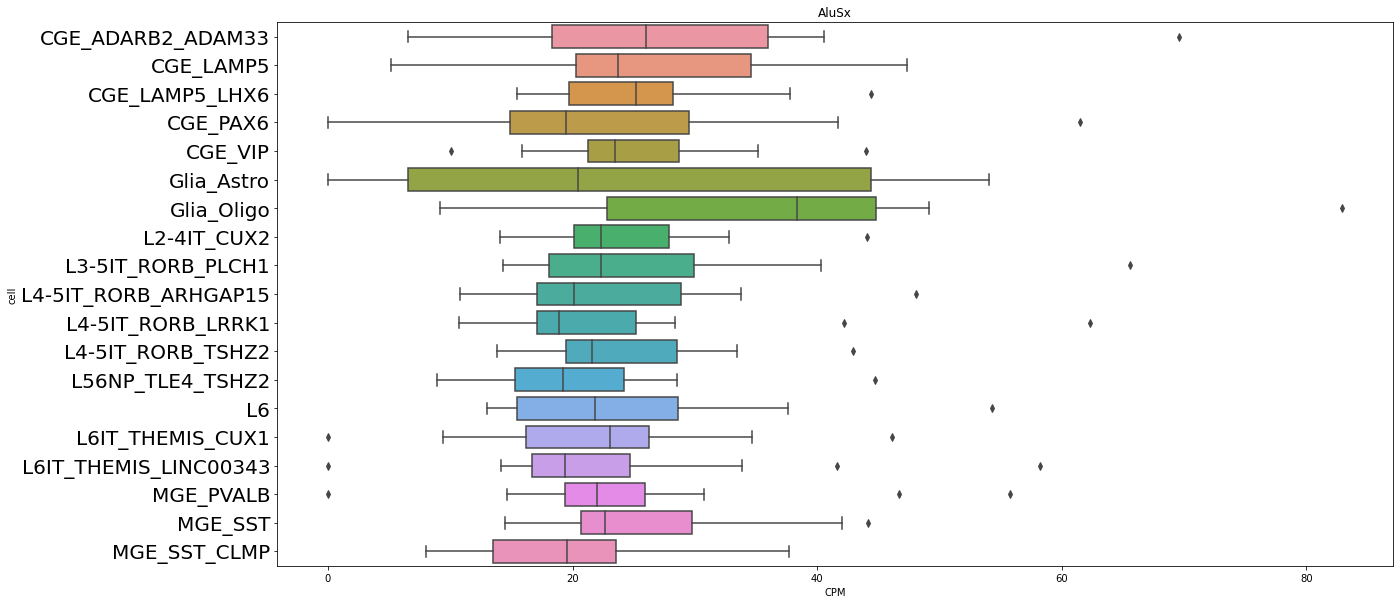

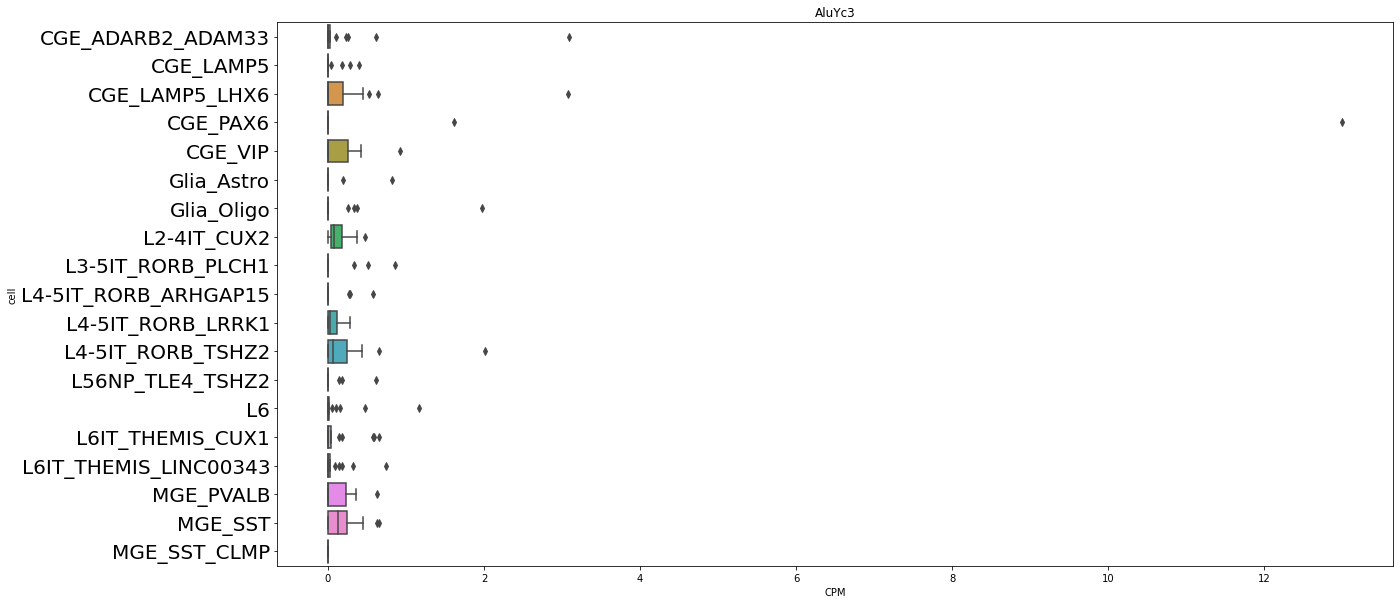

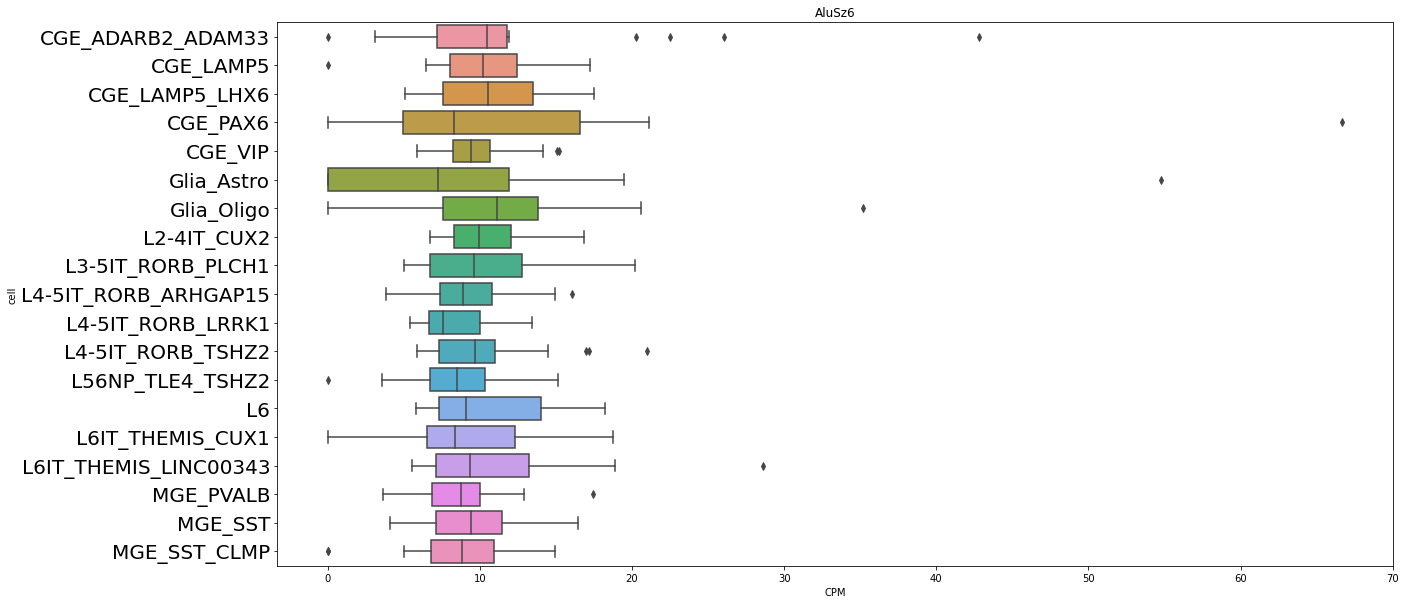

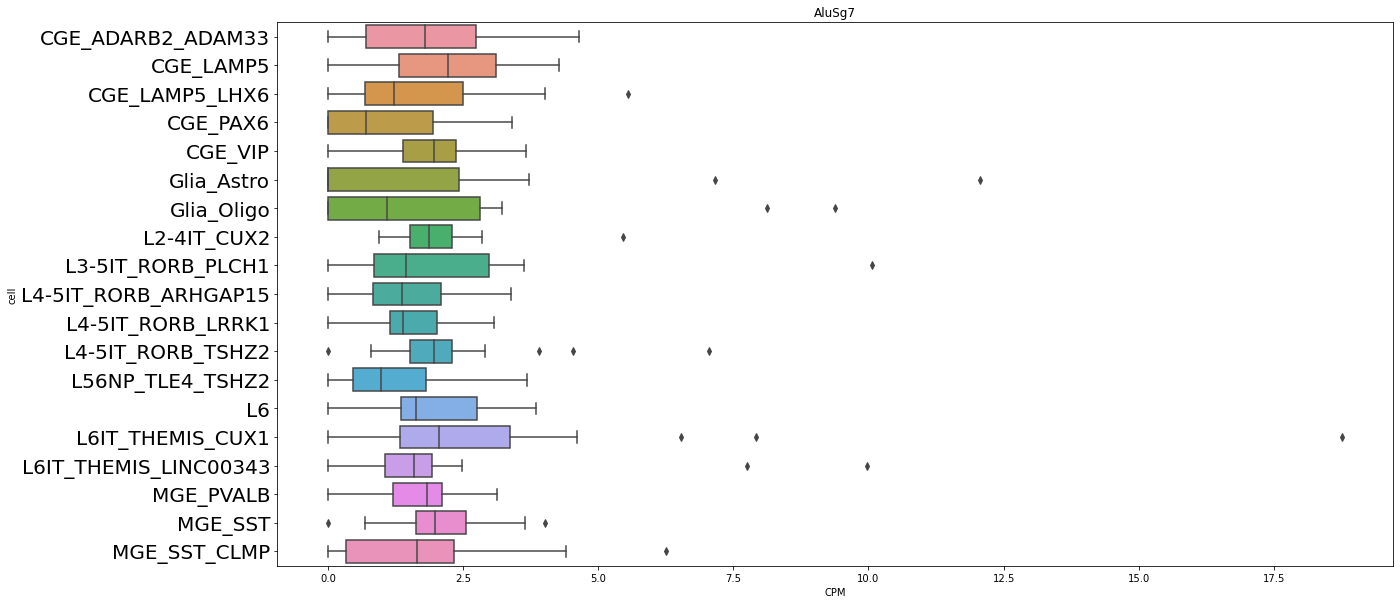

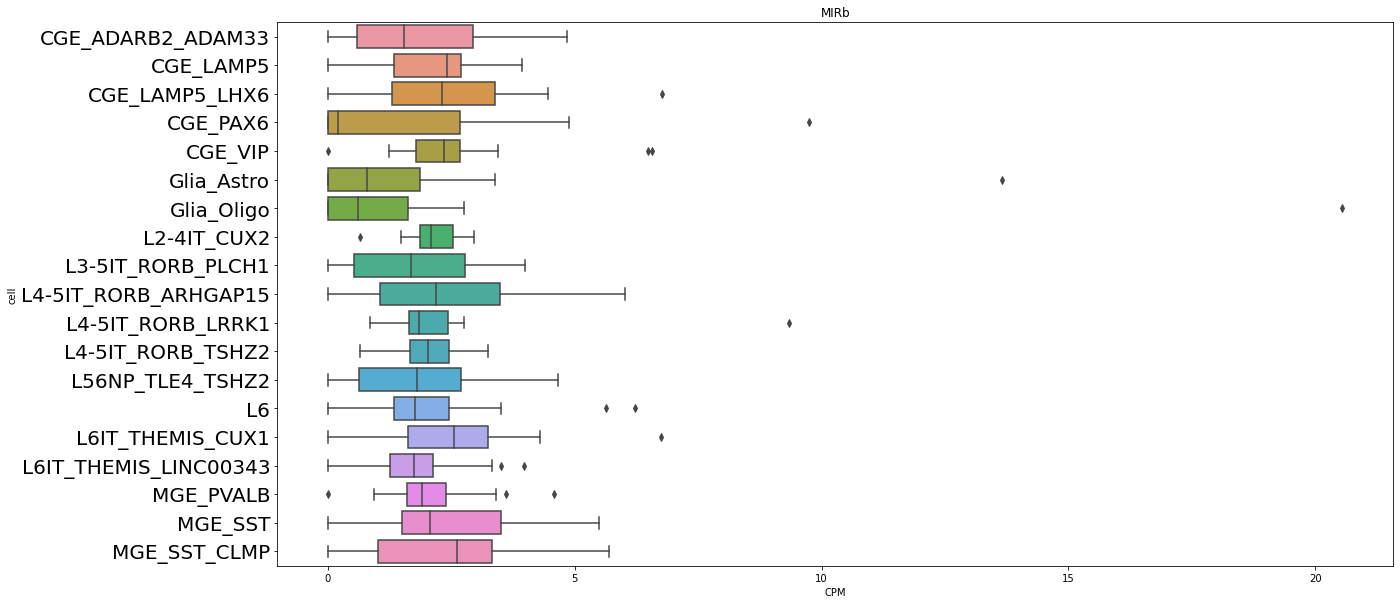

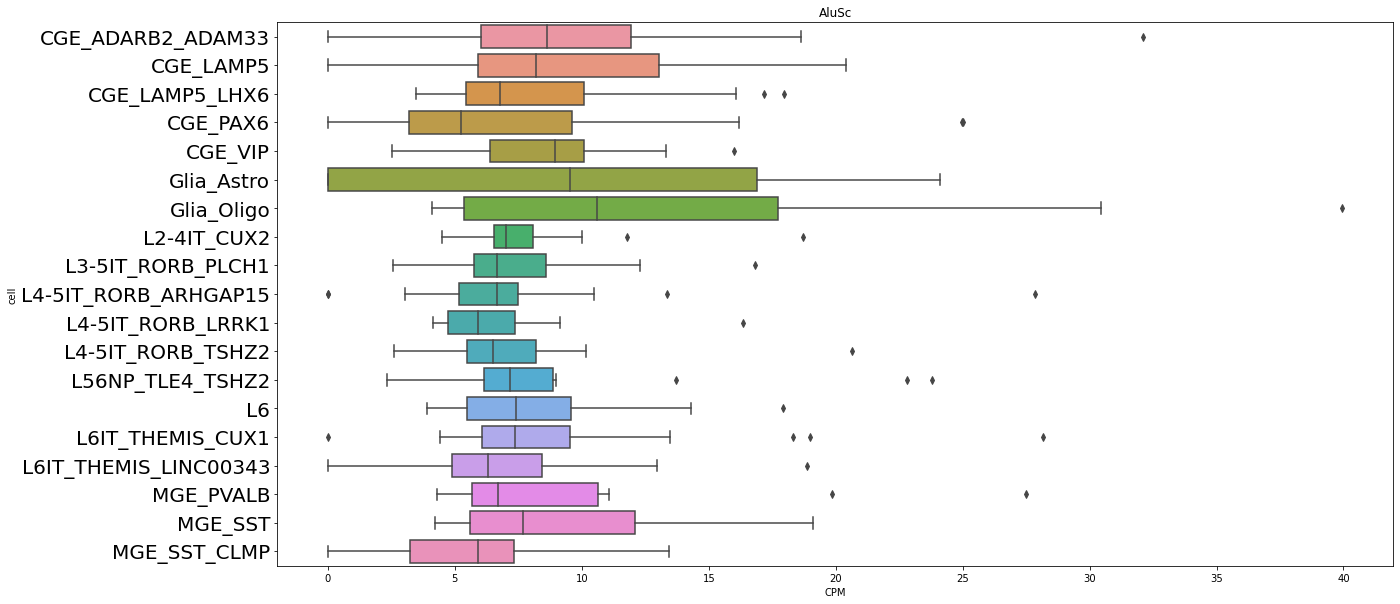

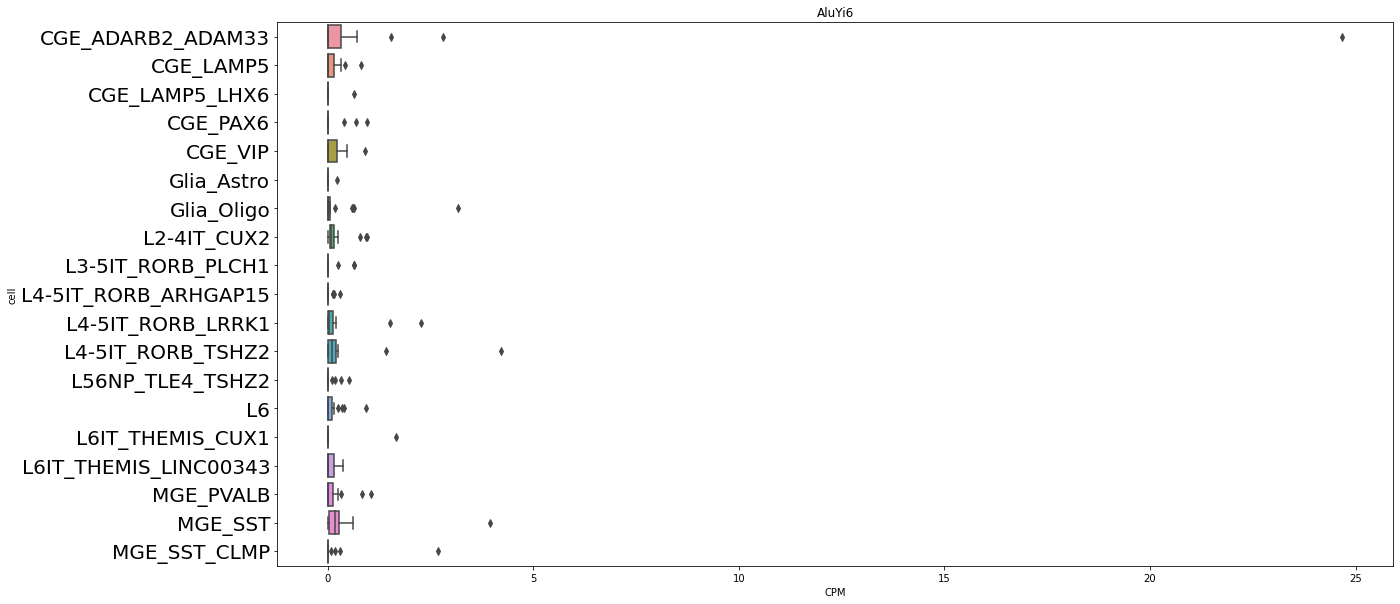

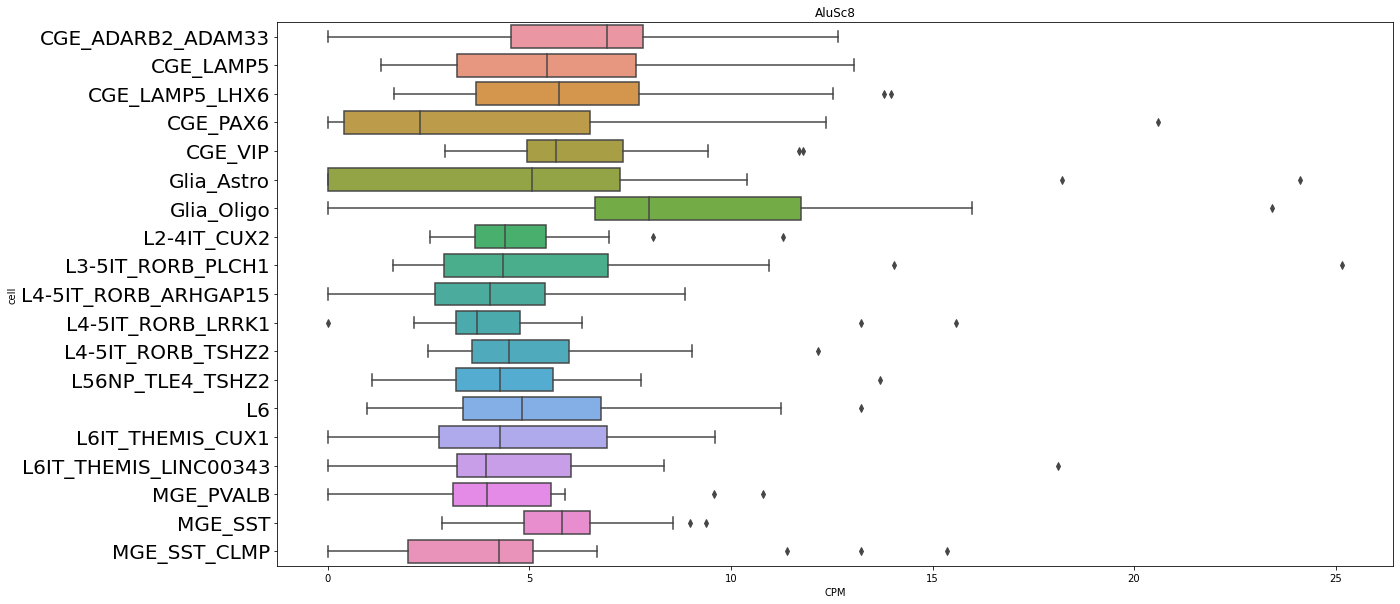

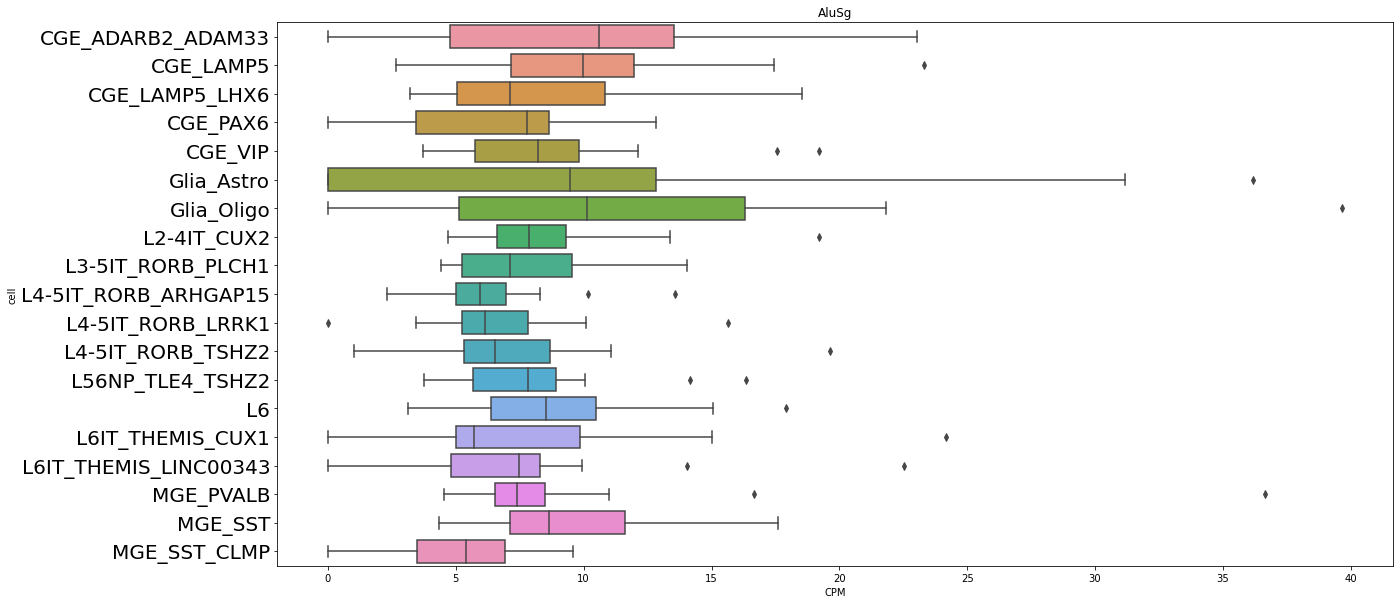

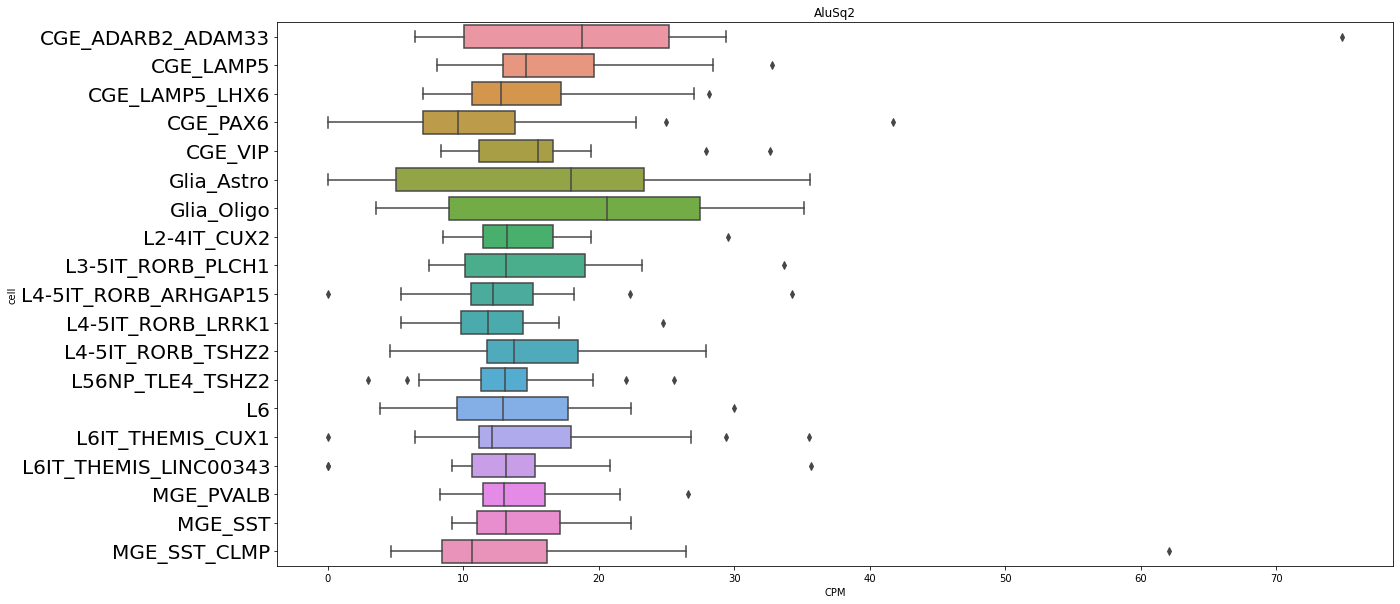

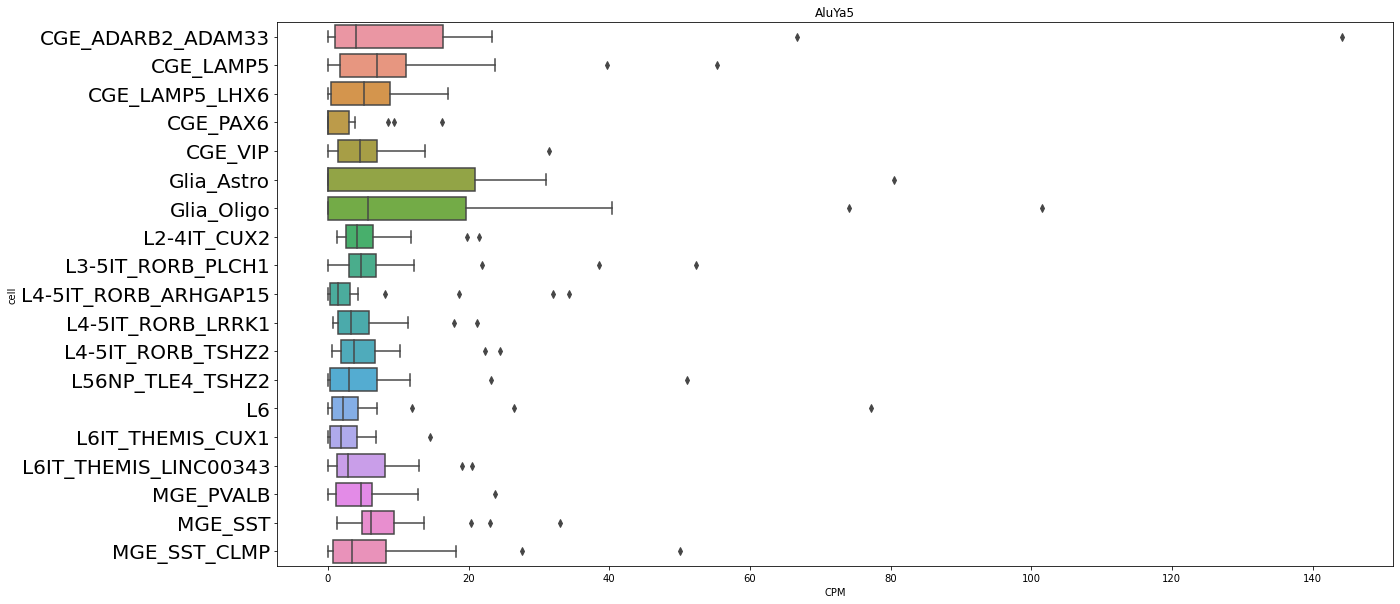

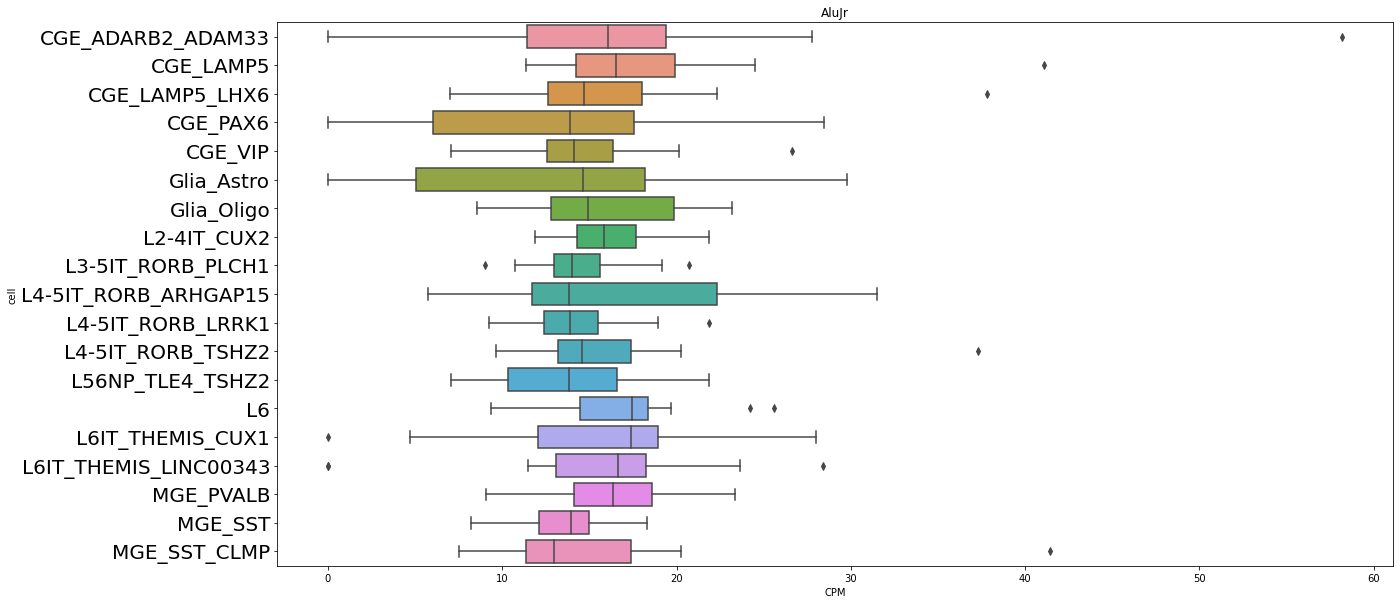

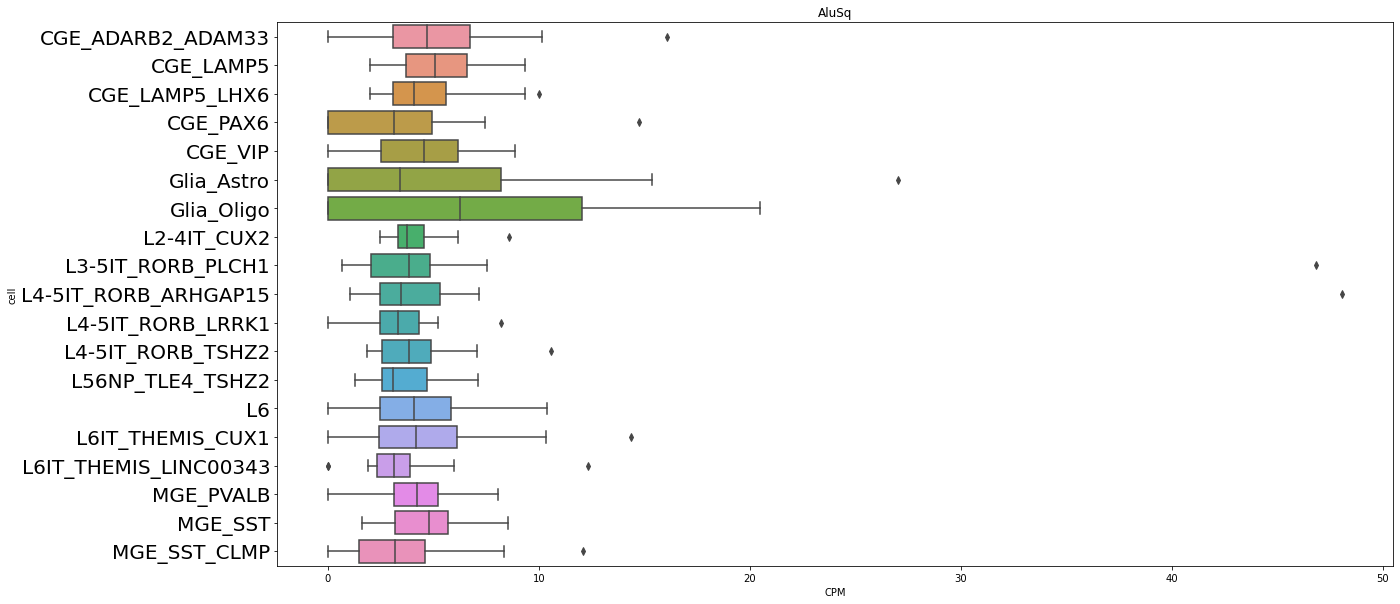

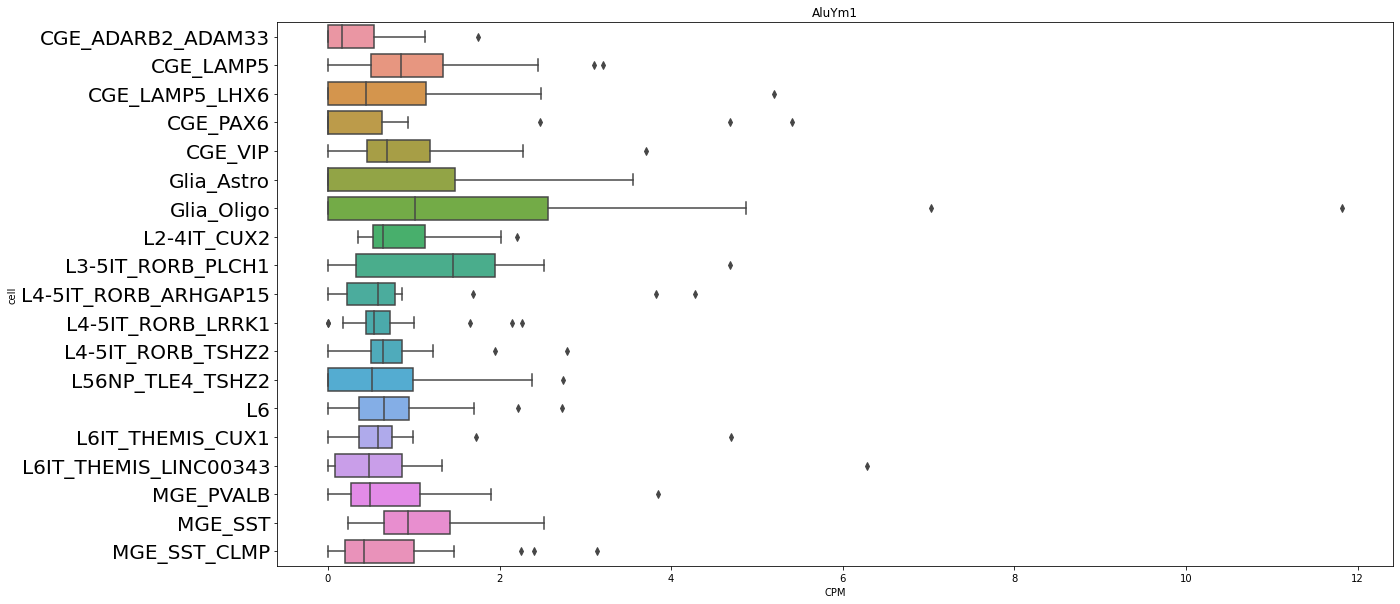

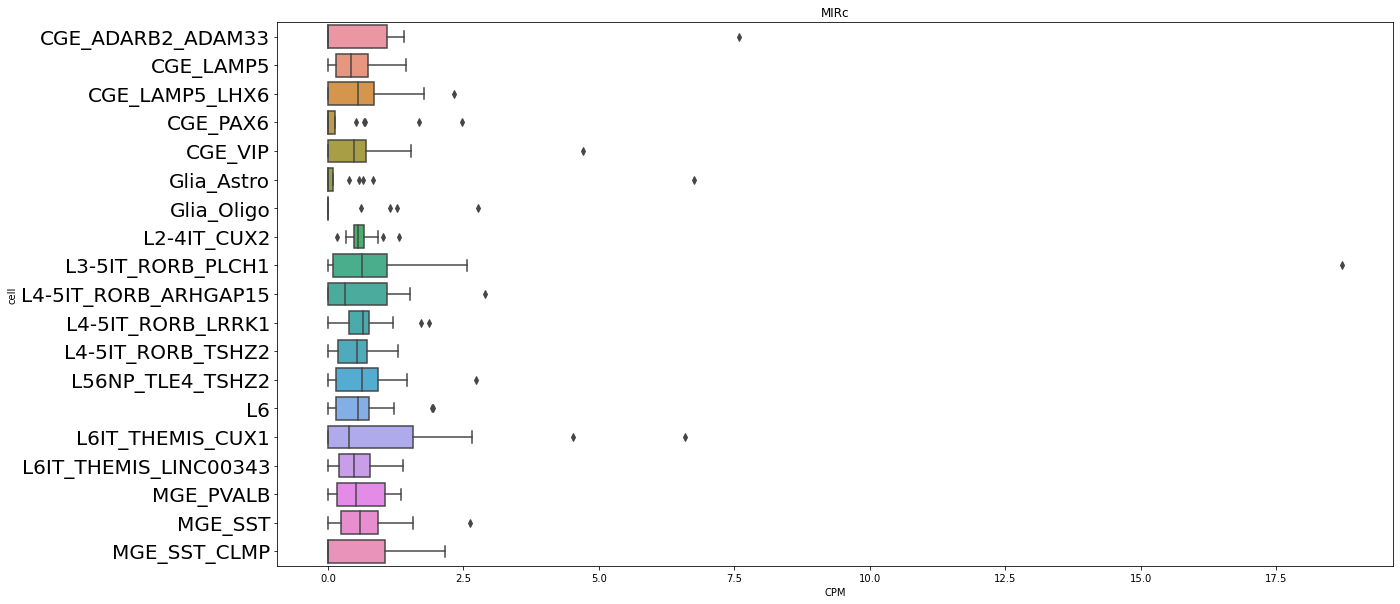

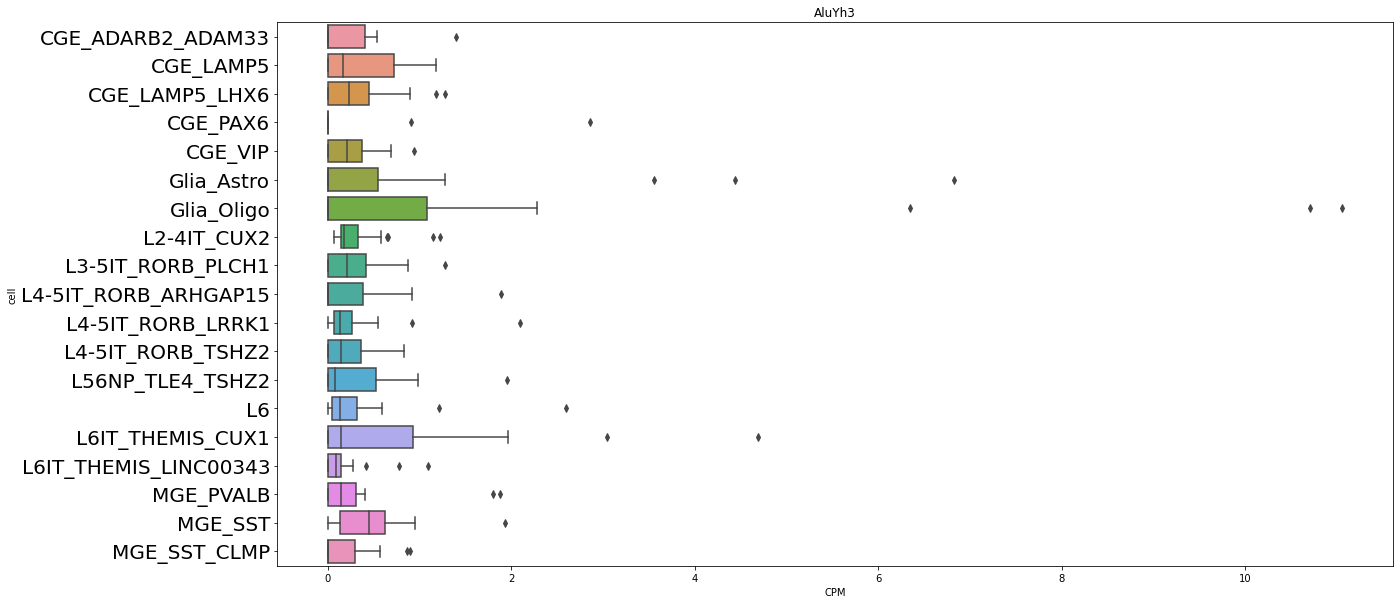

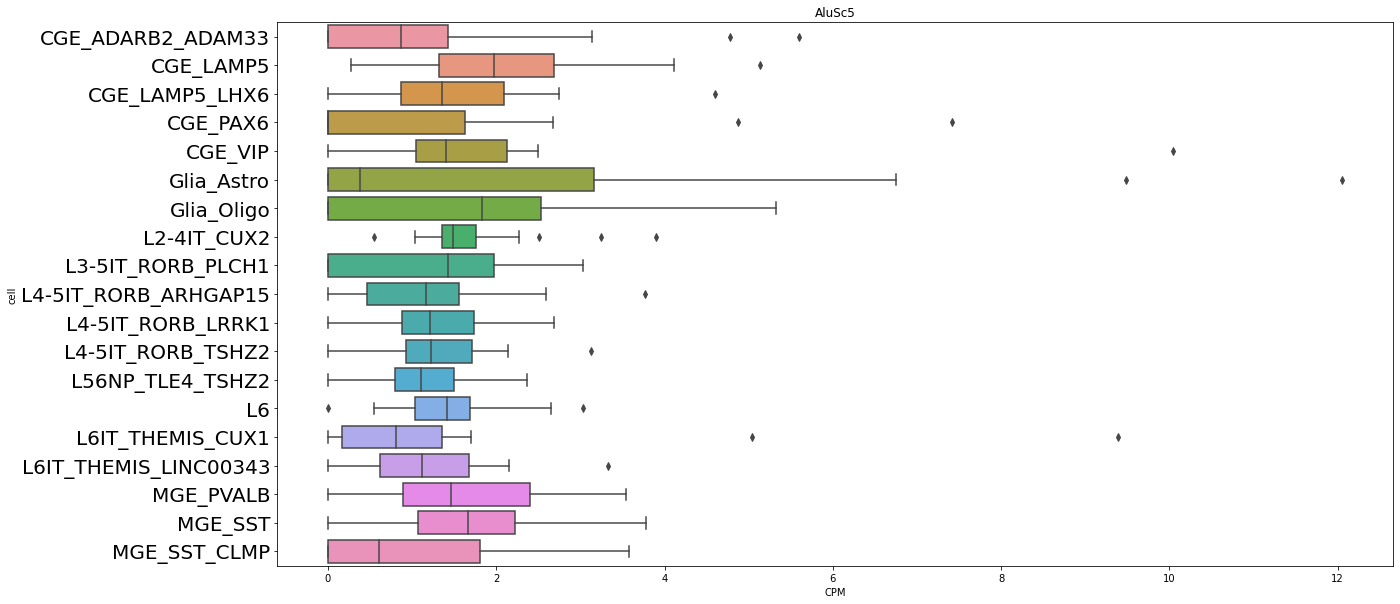

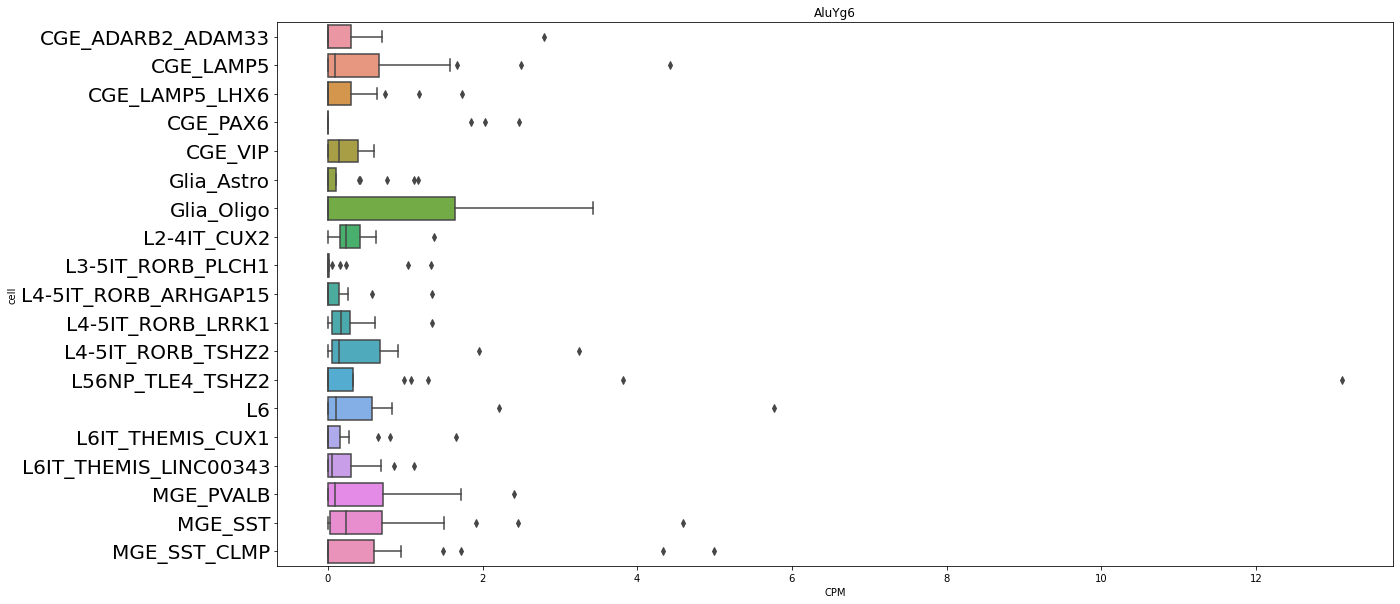

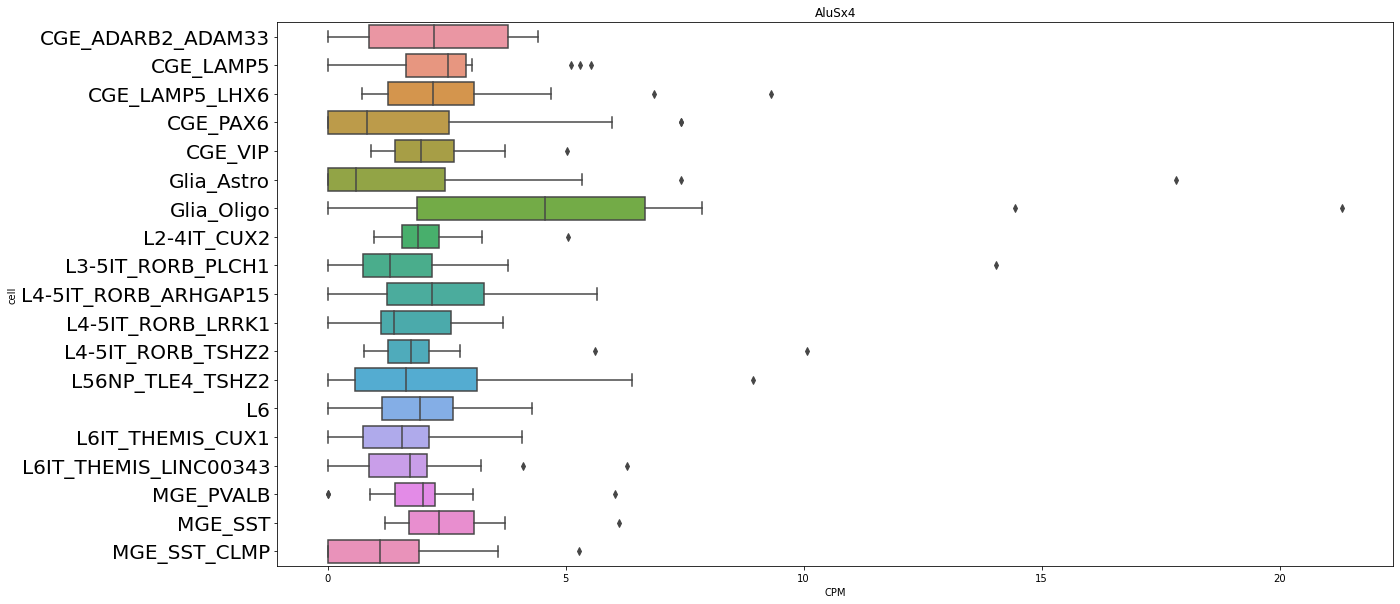

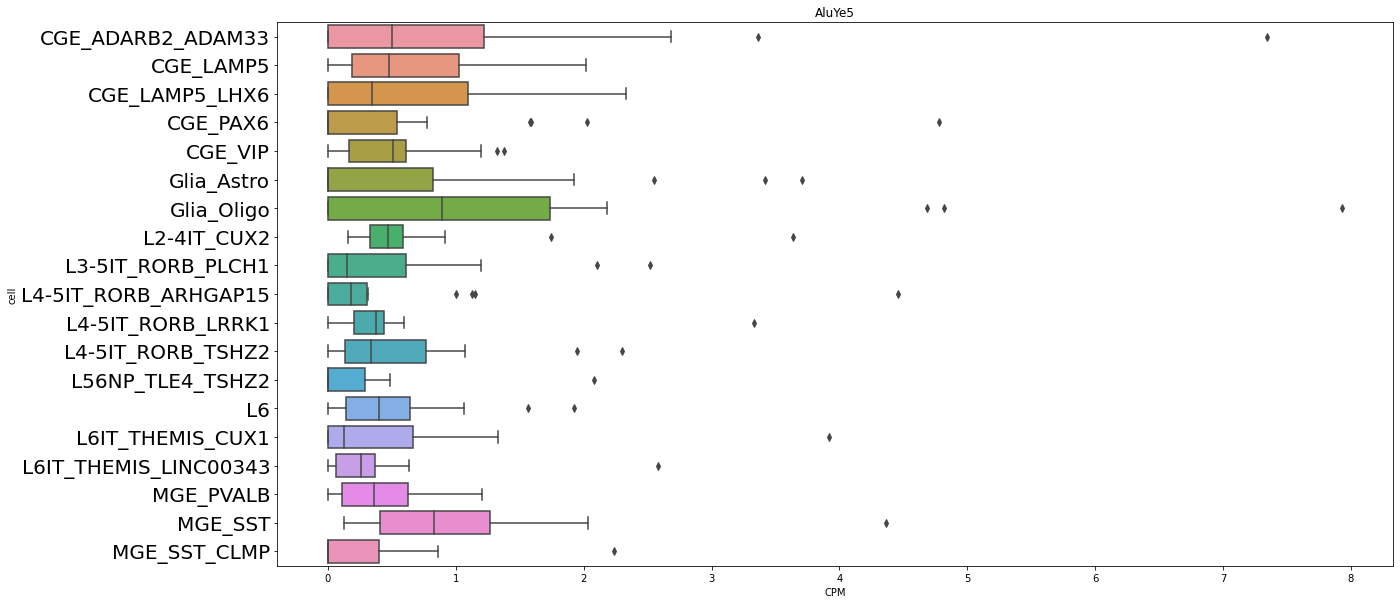

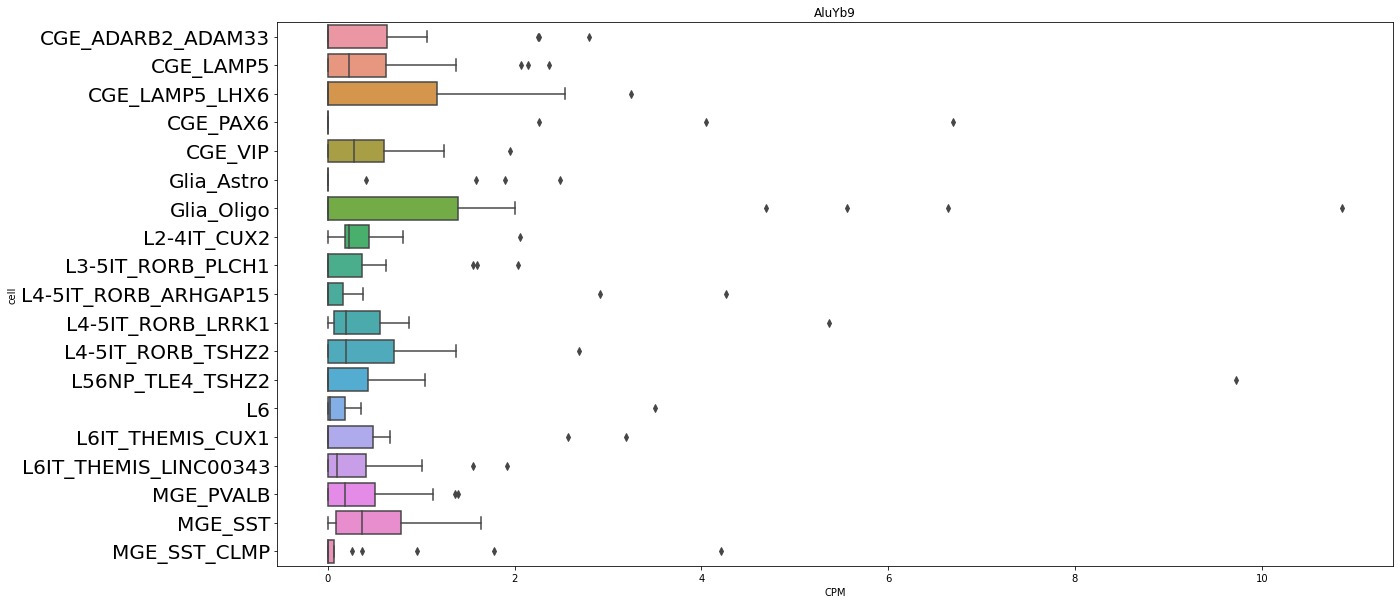

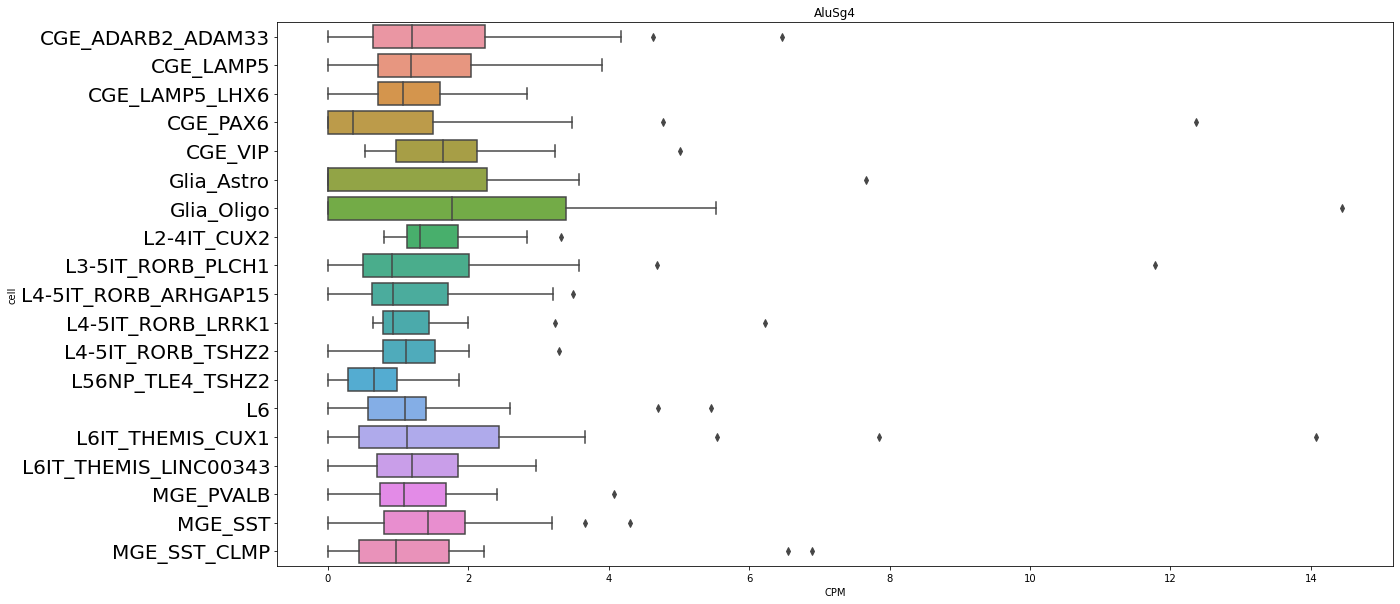

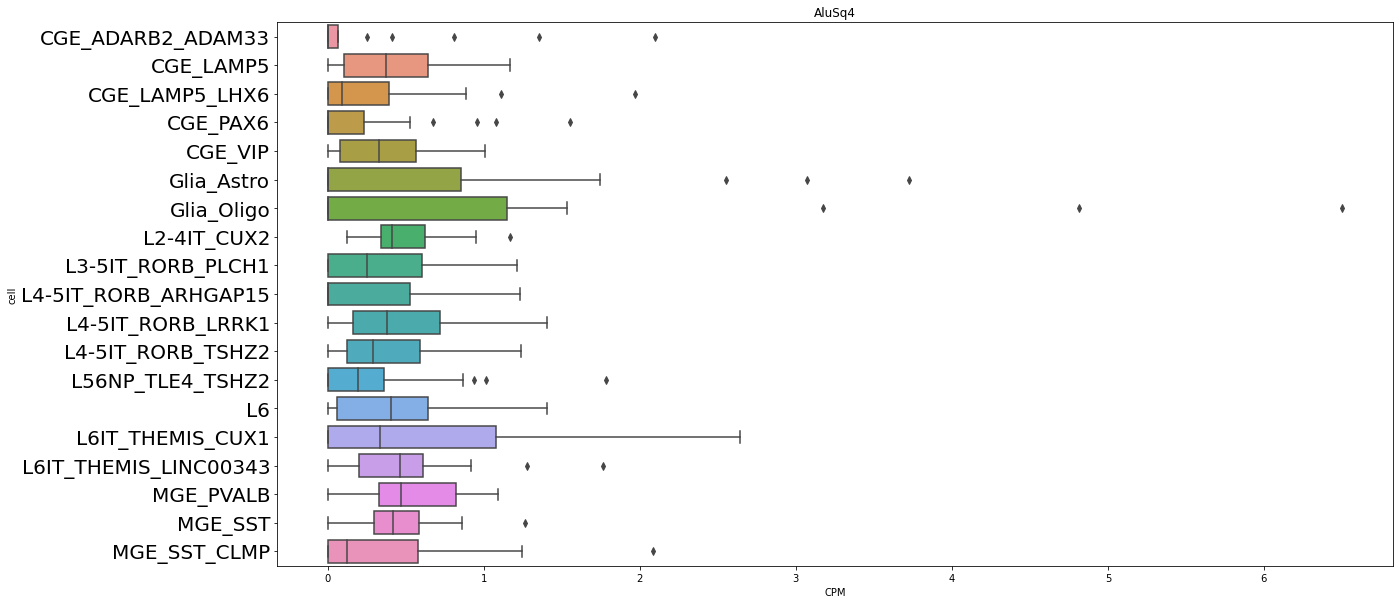

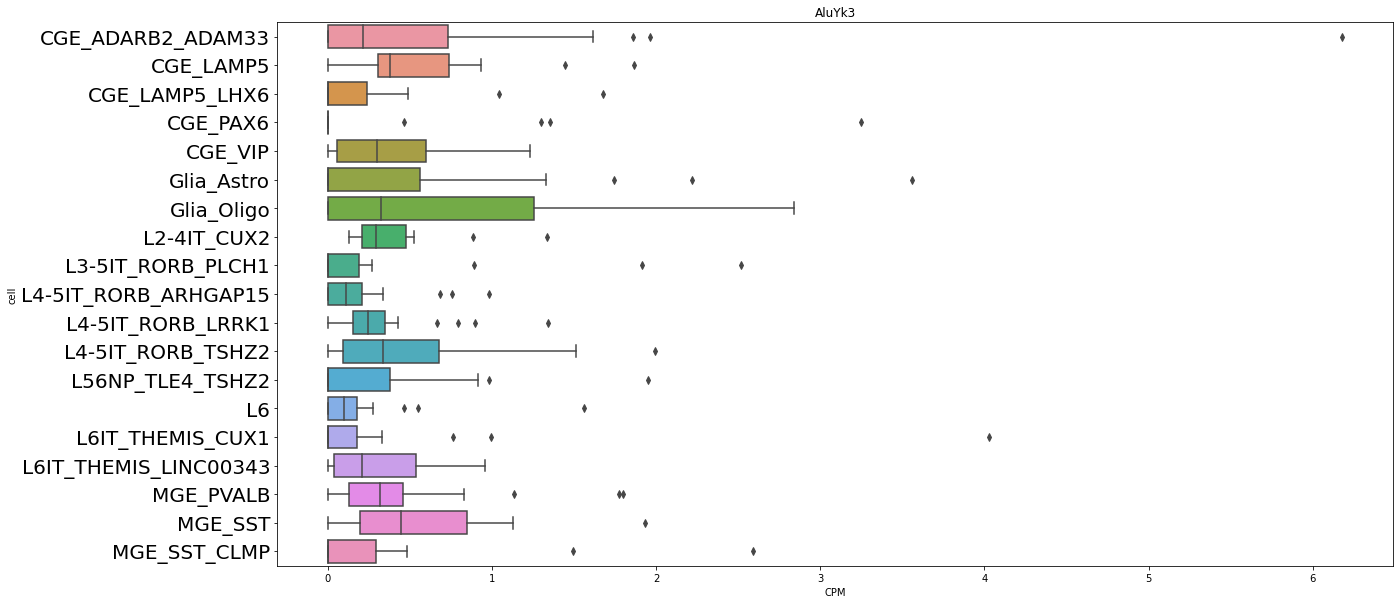

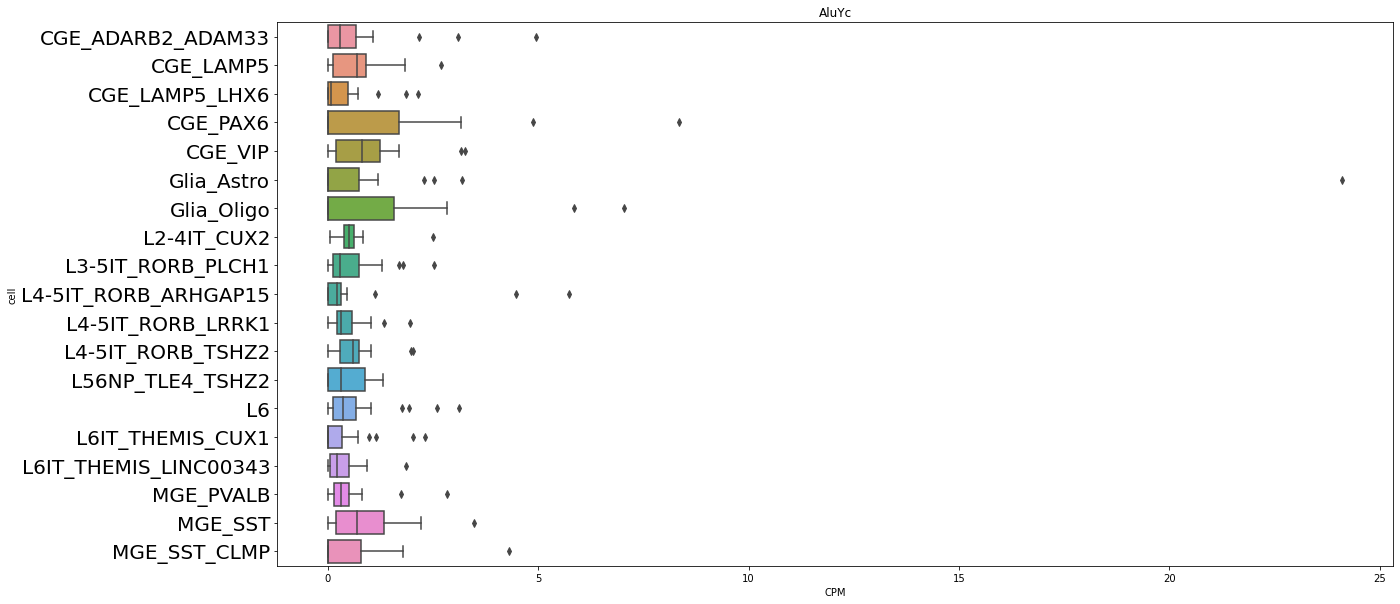

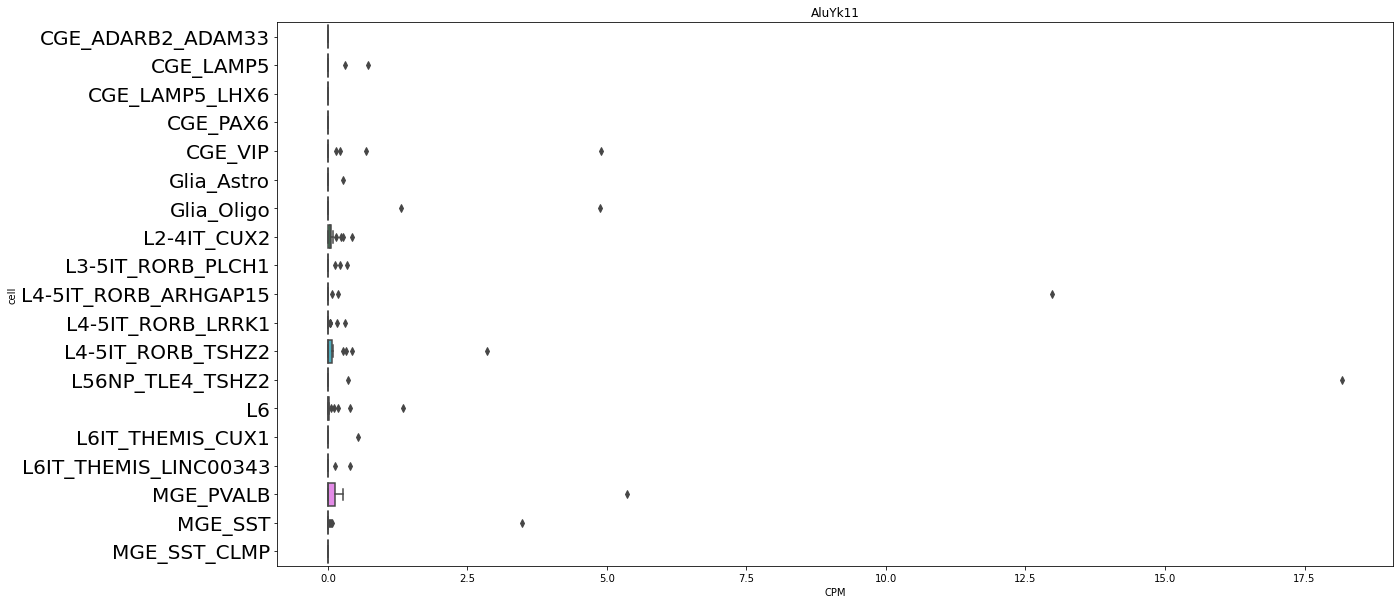

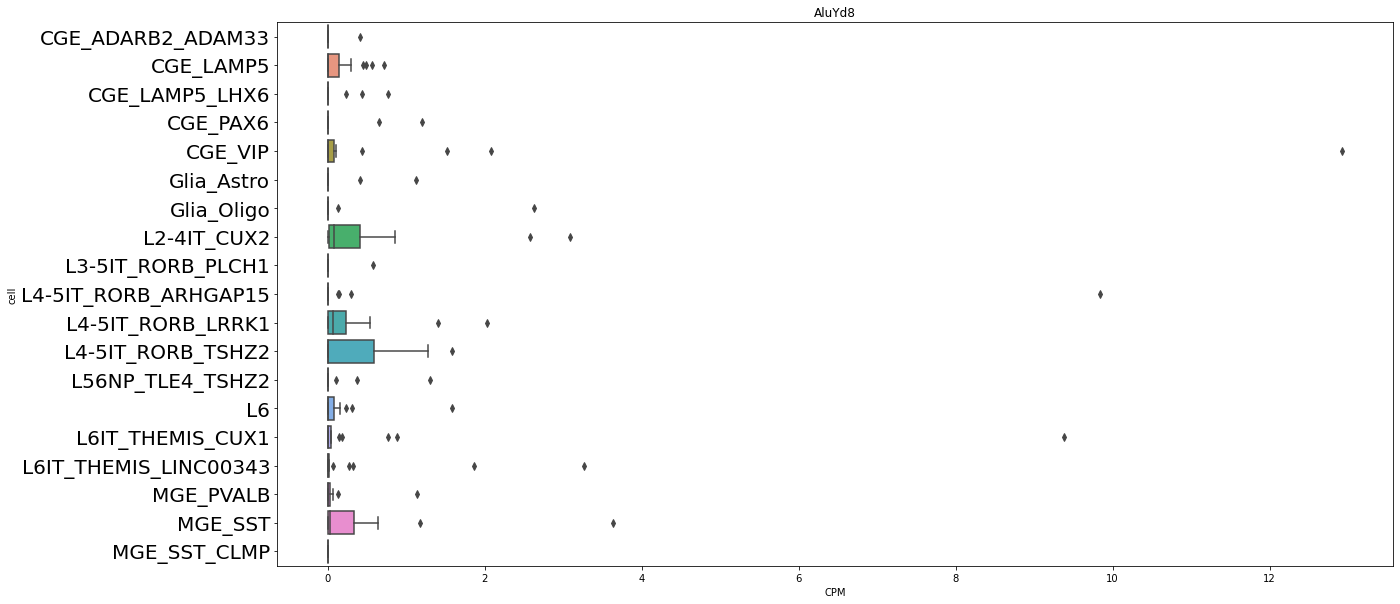

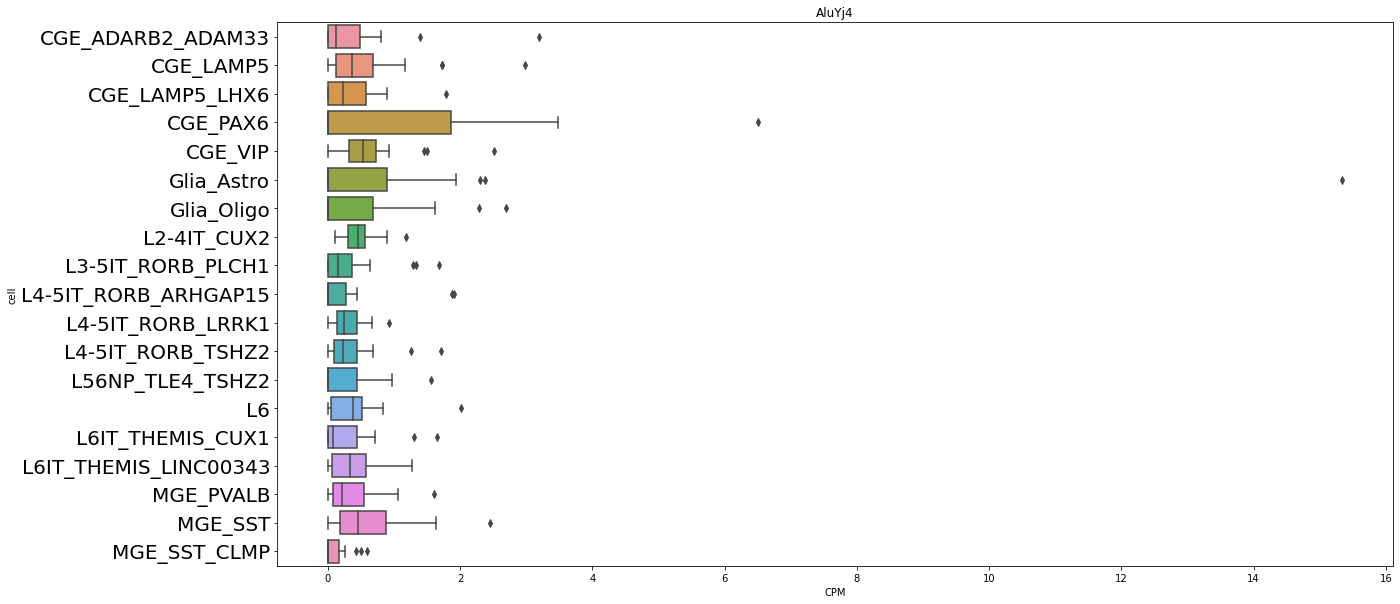

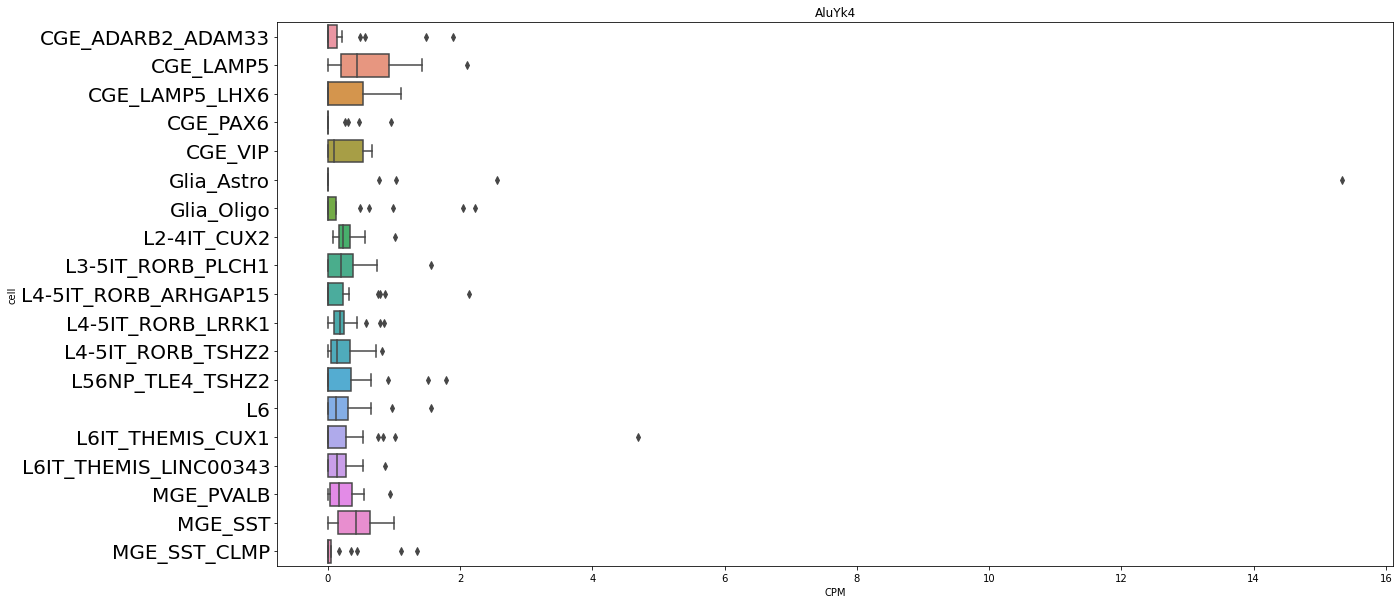

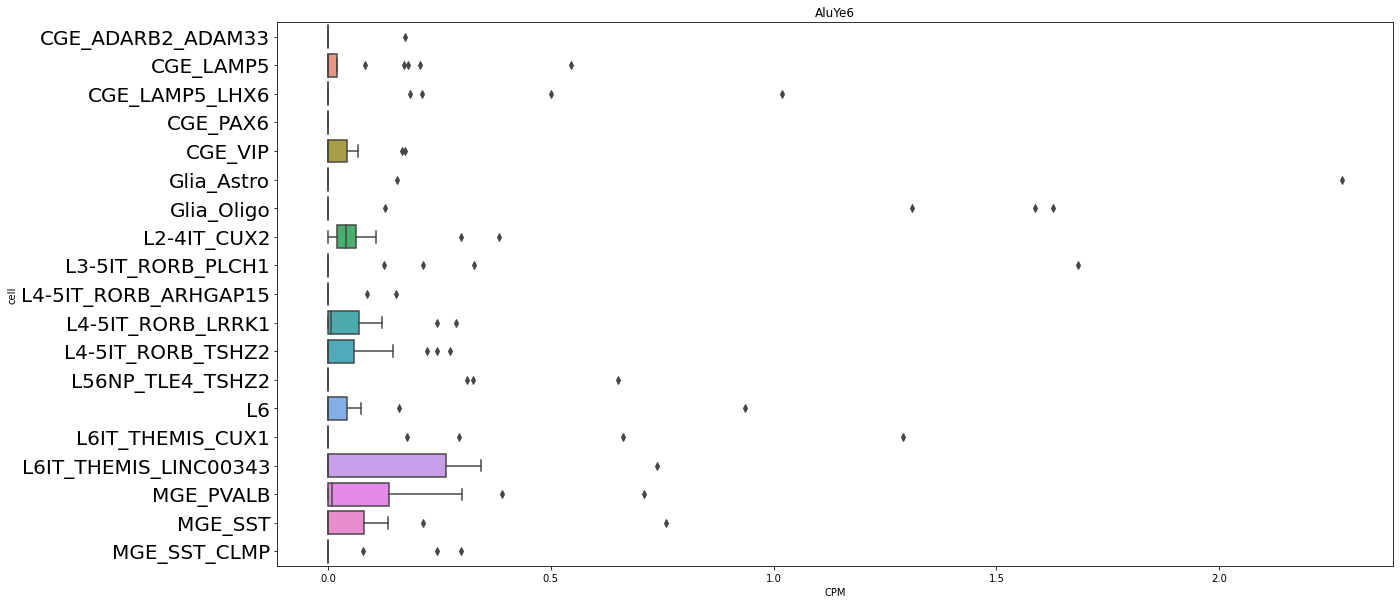

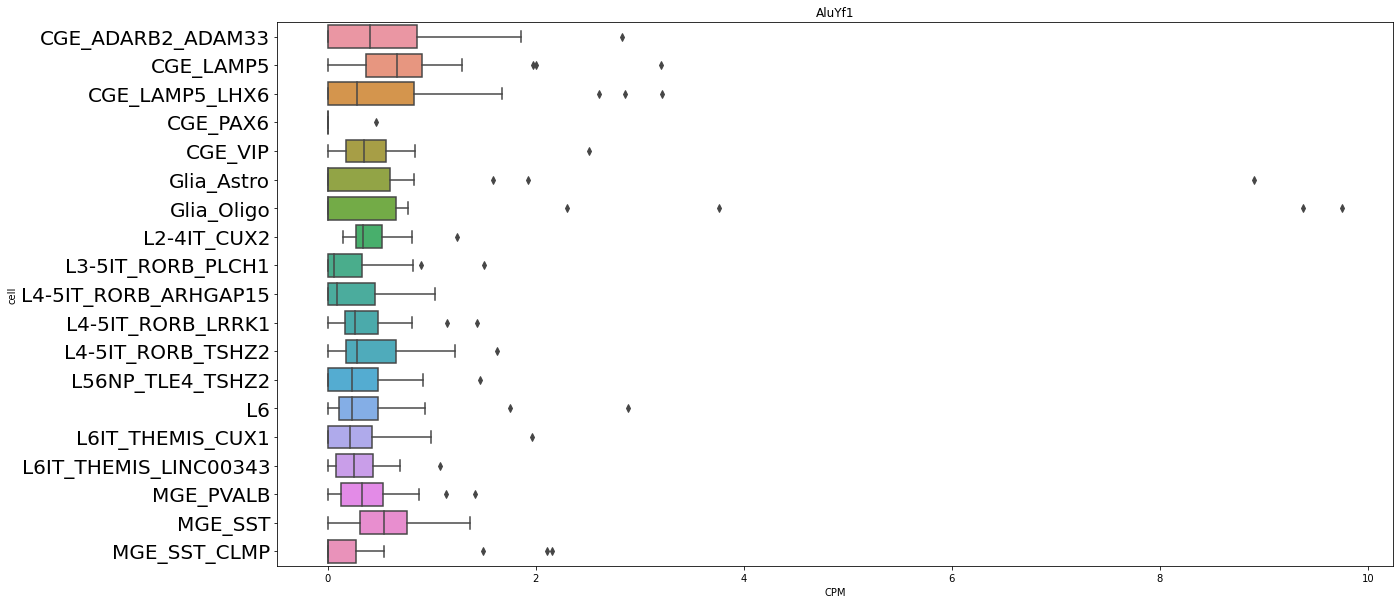

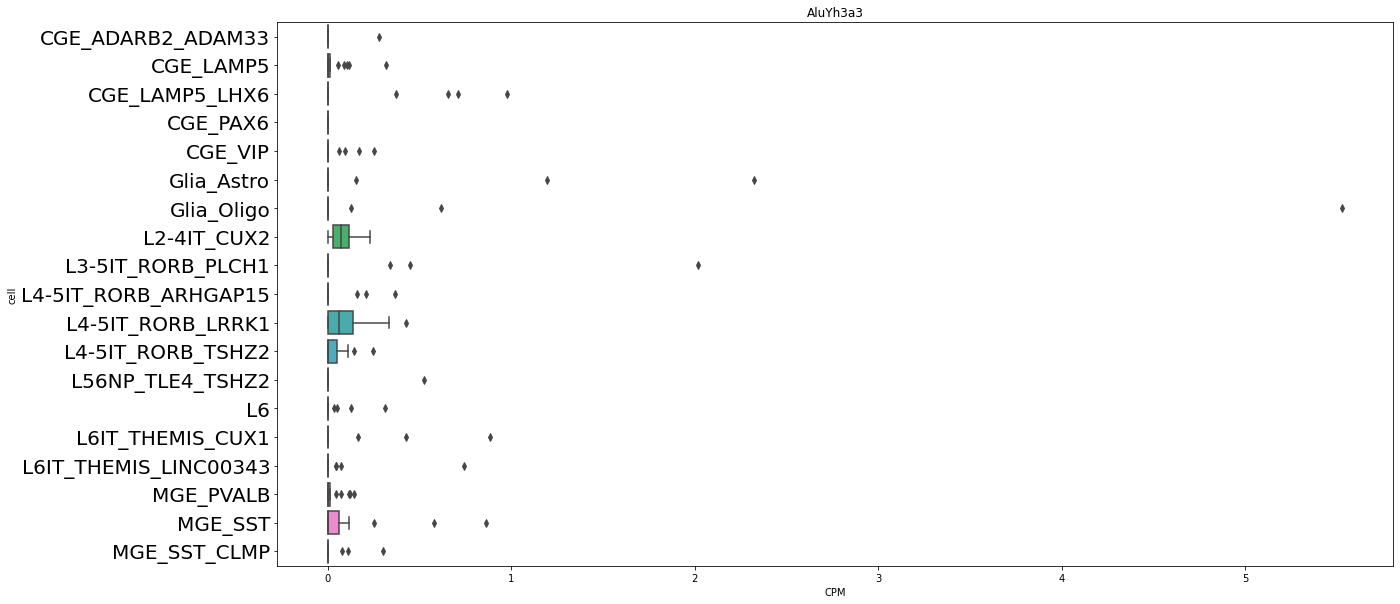

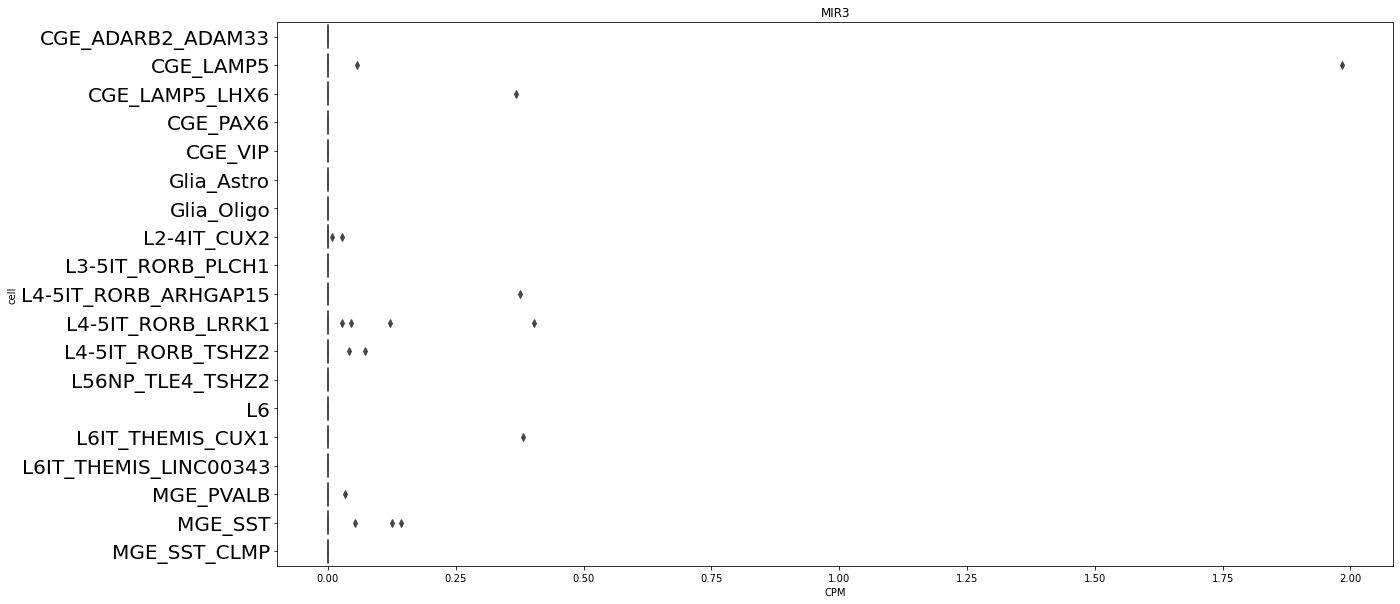

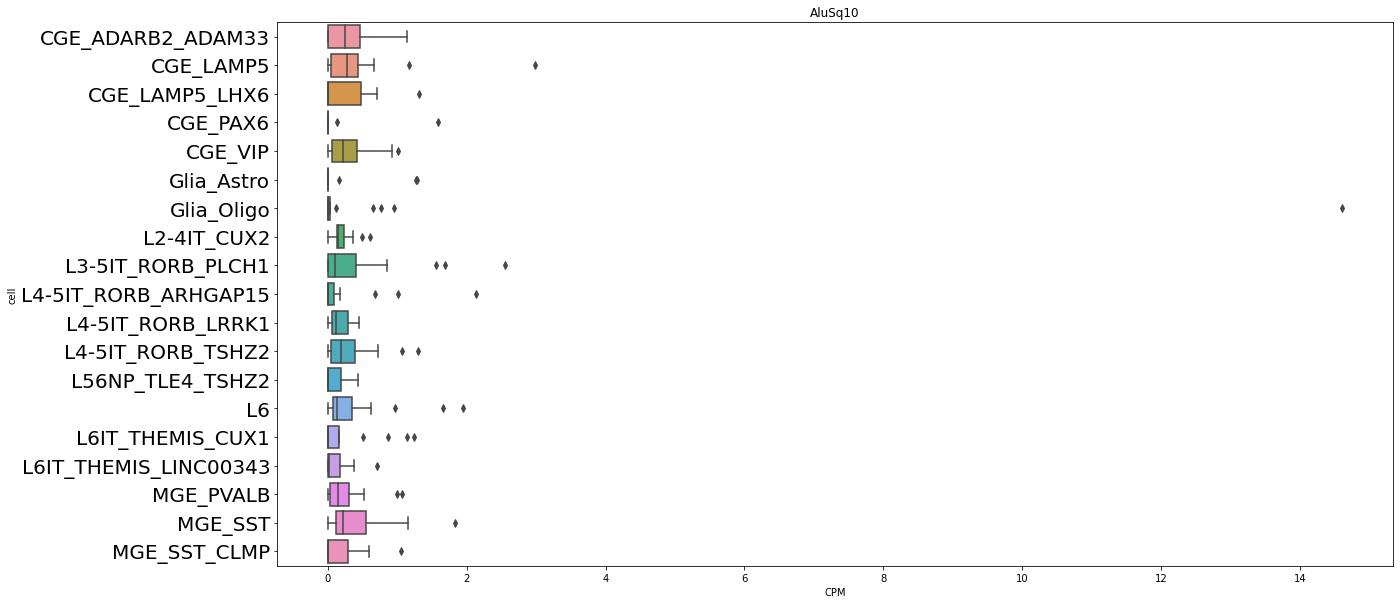

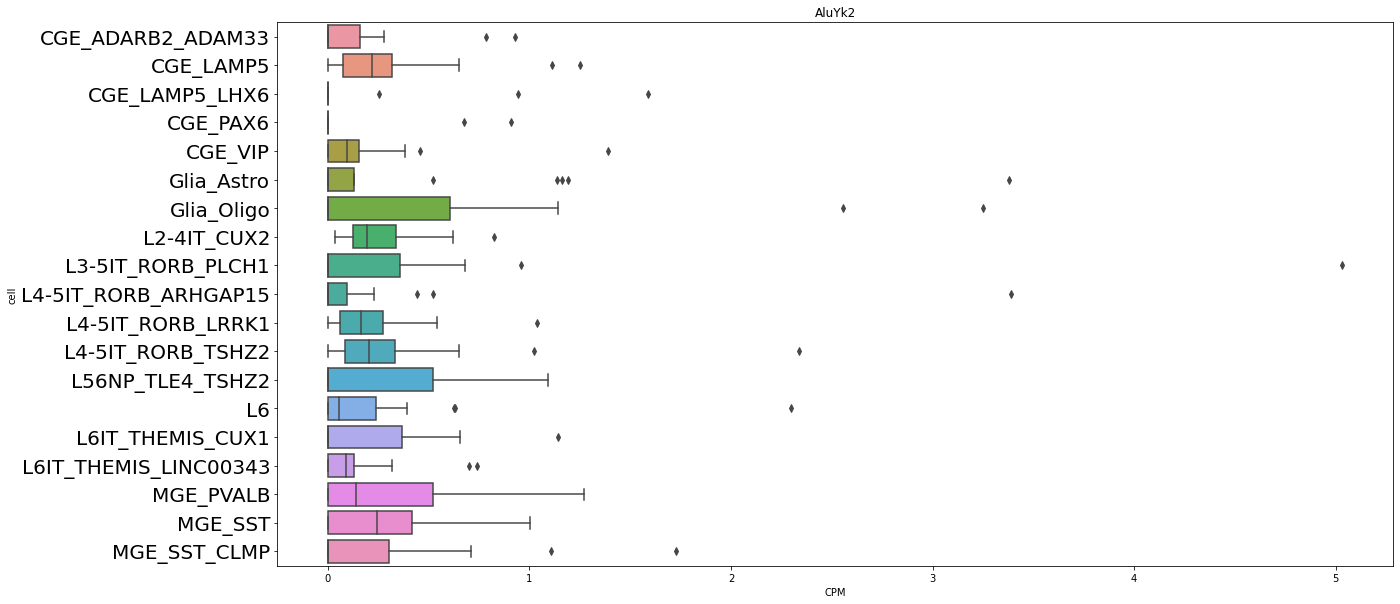

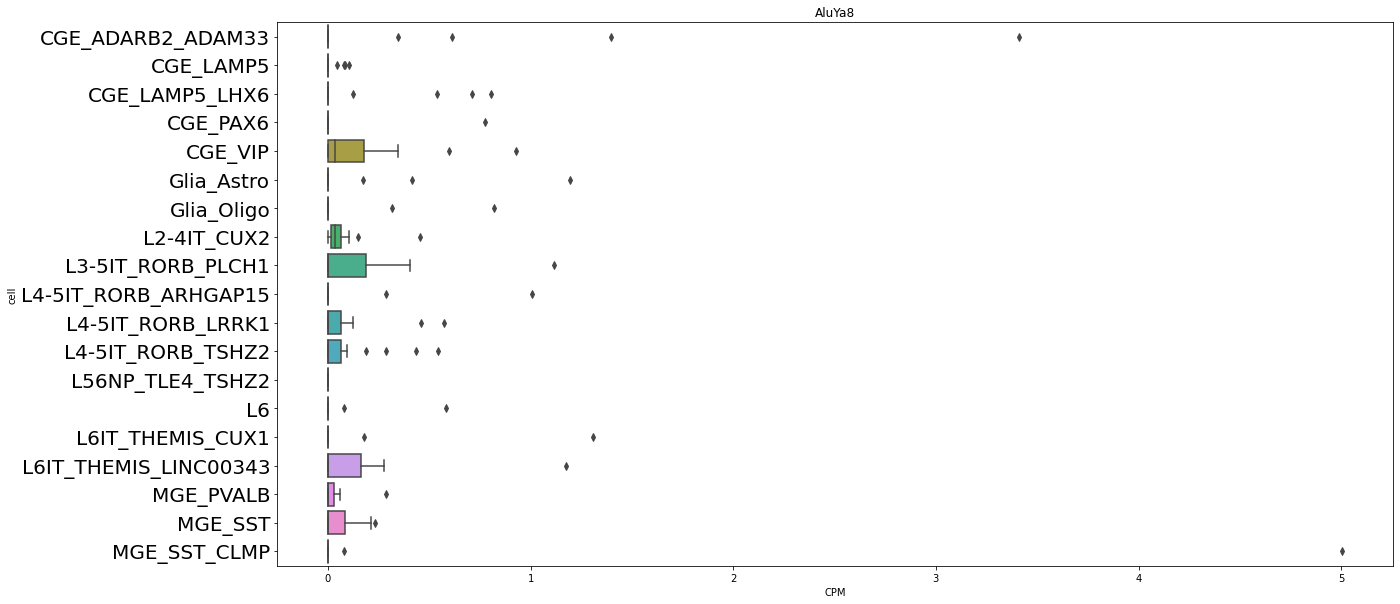

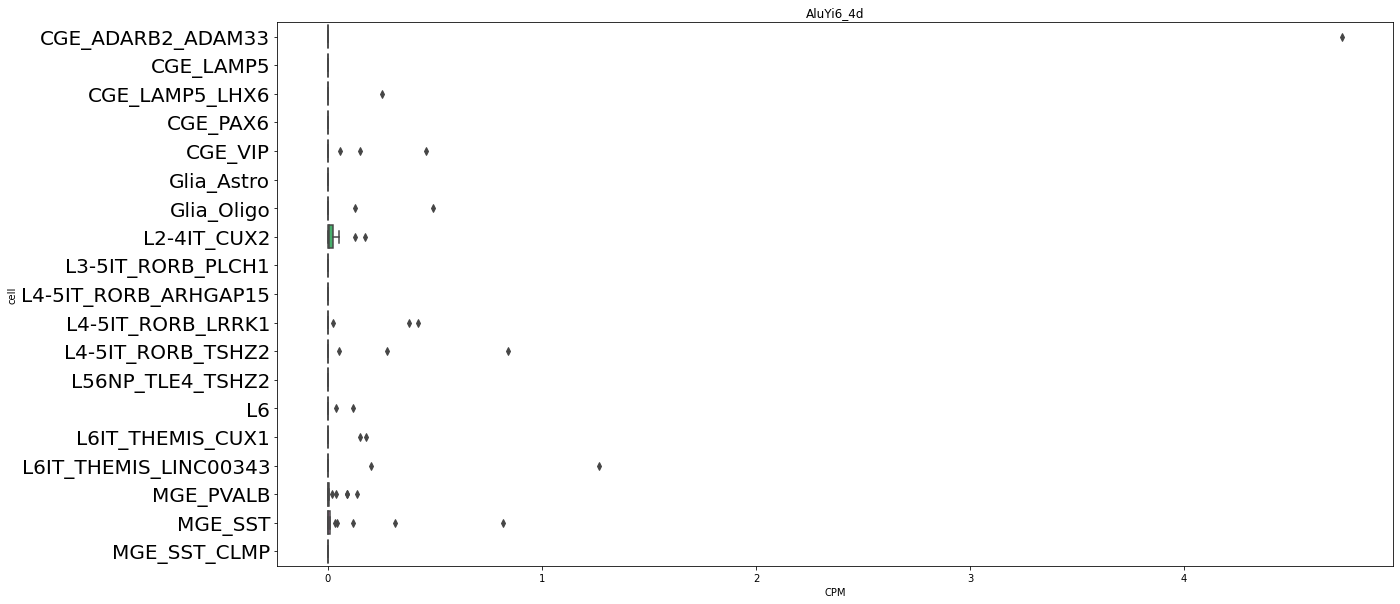

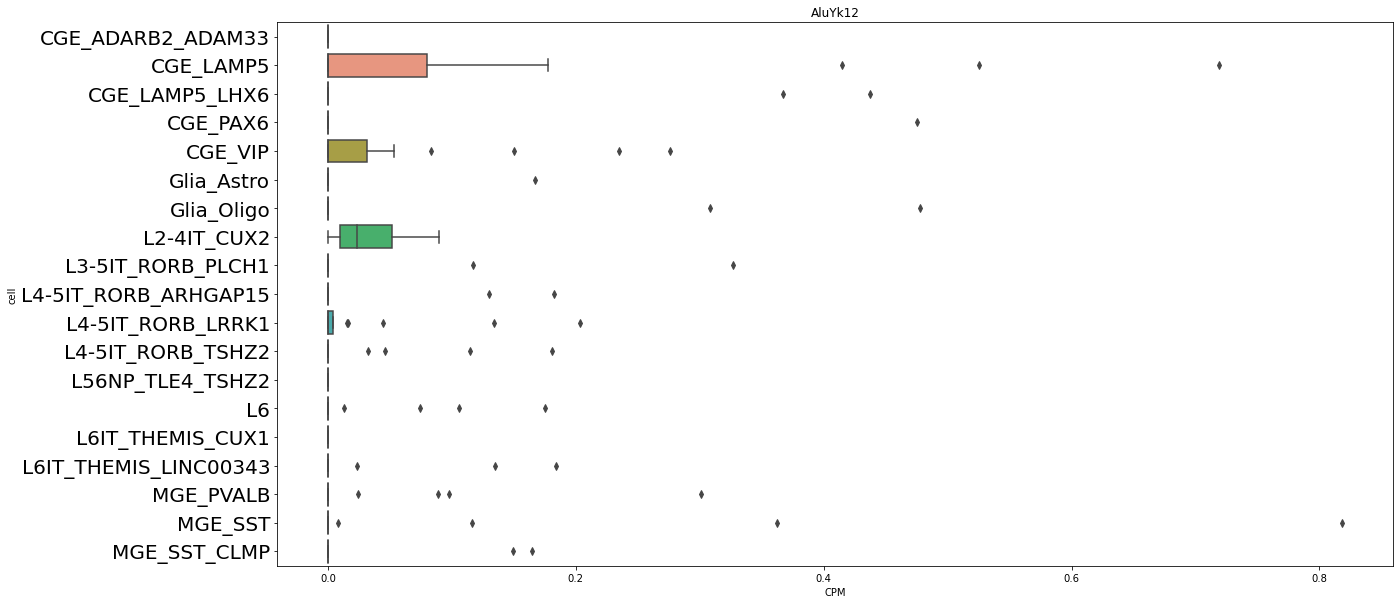

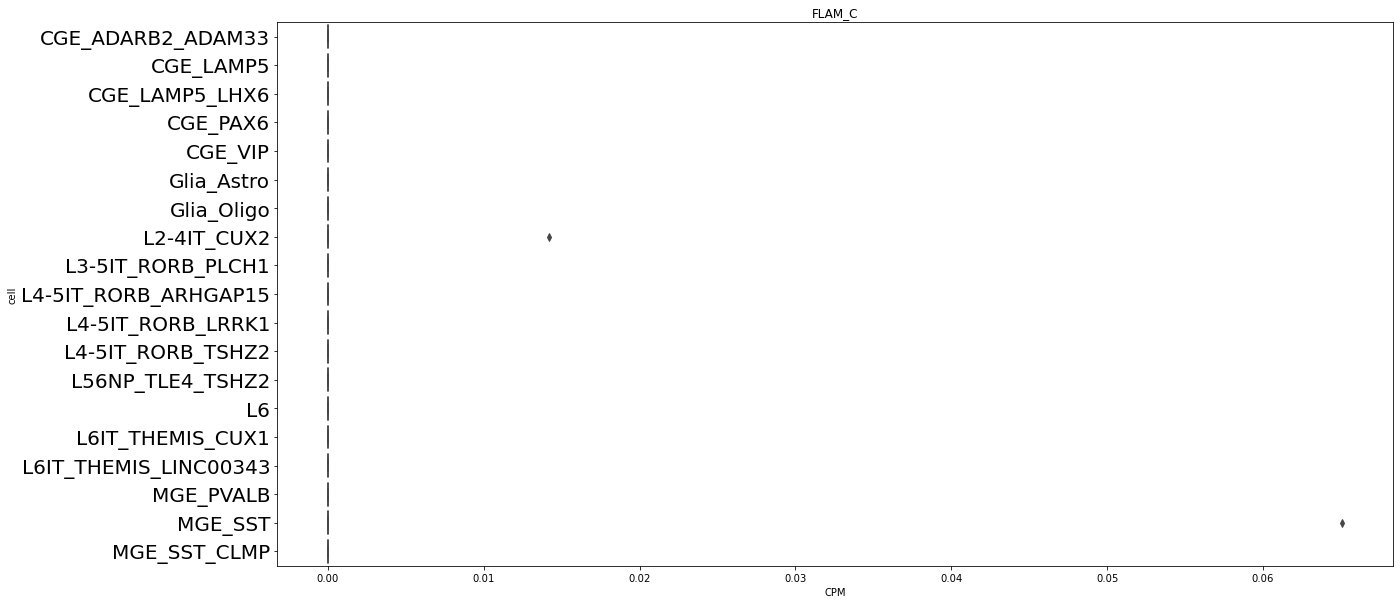

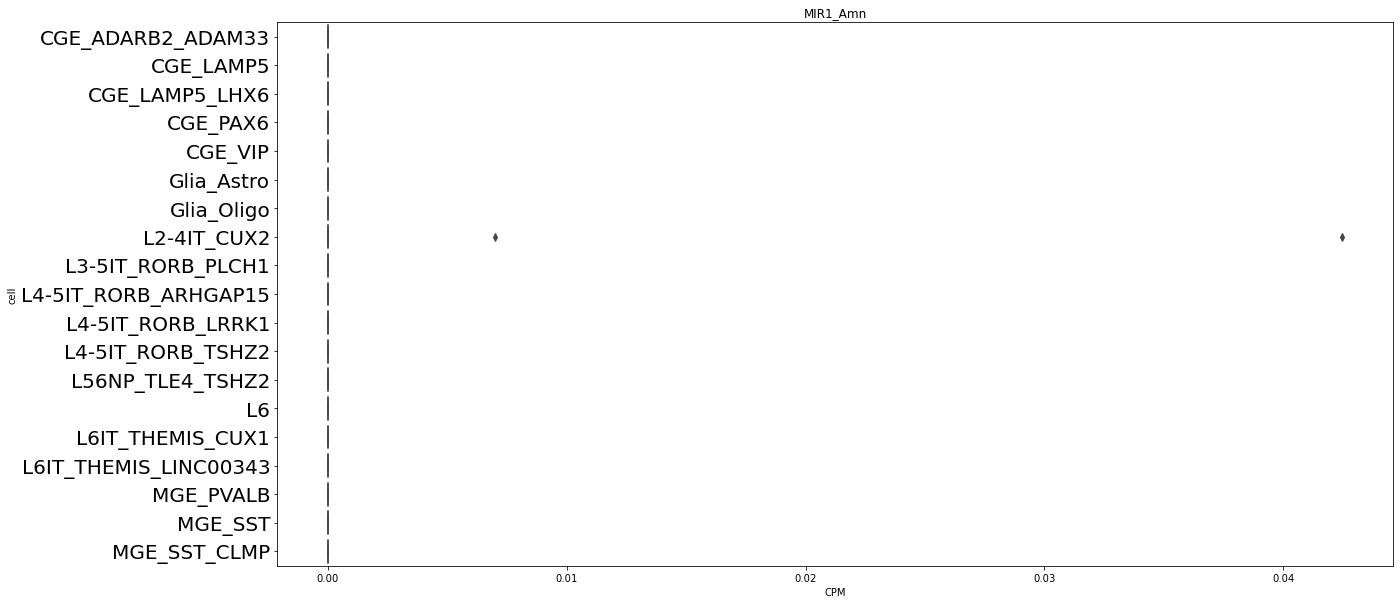

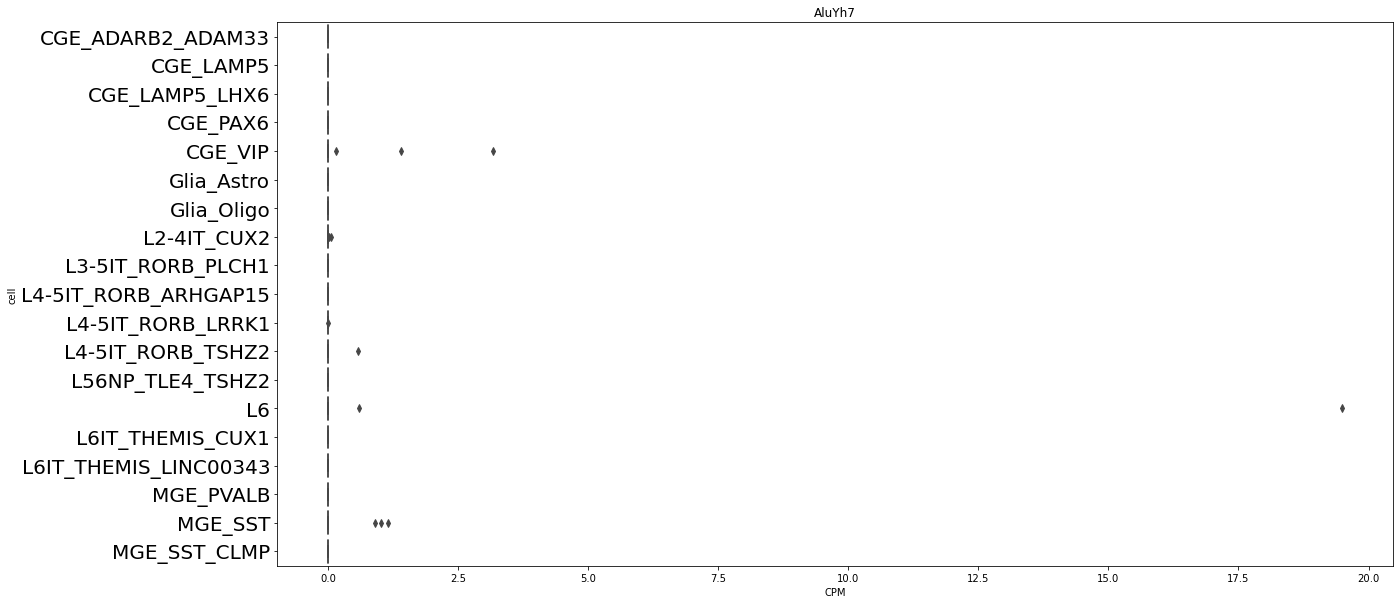

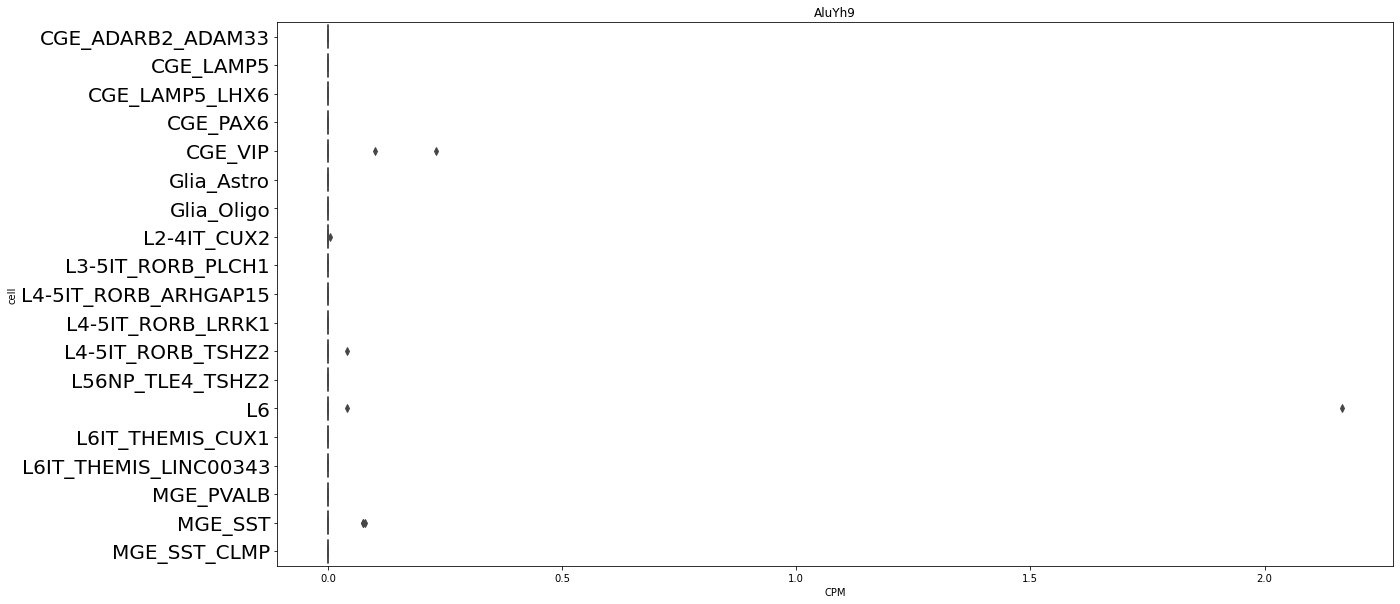

In [481]:
#Compare cell types

#loop over TE and do comparison
os.chdir('/cndd3/dburrows/DATA/te/rna/CZI.counts/ATEM/pseudobulk/')
te = ev_df['element'].values
samp_l = dm['sequencing_id'].values

for t in te:
    
    dict = pd.DataFrame()
    all_counts = []
    all_names = []
    for cell in unq_cell:
        fill_v = []
        for s in samp_l:
            os.chdir(glob.glob('*' + s + '_*')[0])
            curr_cell = glob.glob(cell + '.*ATEM*')
            if len(curr_cell) == 0:
                fill_v = np.append(fill_v,0)
            else:
                count_mat = pd.read_csv(curr_cell[0], sep="\t", header=0) 
                count_sum = count_mat.groupby('gene_id').sum() #Sum counts for each element

                if t in count_sum.index:
                    fill_v = np.append(fill_v,count_sum.loc[t]['CPM'])

                else:
                    fill_v = np.append(fill_v,0)

            os.chdir('..')
        all_names = np.append(all_names,np.full(len(fill_v), cell))
        all_counts = np.append(all_counts, fill_v)

    dict['cell'] = all_names
    dict['CPM'] = all_counts

    fig,ax = plt.subplots(figsize=(20,10))
    sns.boxplot(data=dict, y = 'cell', x='CPM')
    plt.title(t)
    plt.yticks(fontsize=20)
    plt.show()

In [384]:
cell = unq_cell[0]
s = samp_l[0]
cell, t, s

('CGE_ADARB2_ADAM33', 'L1PA3', 'CZI2')

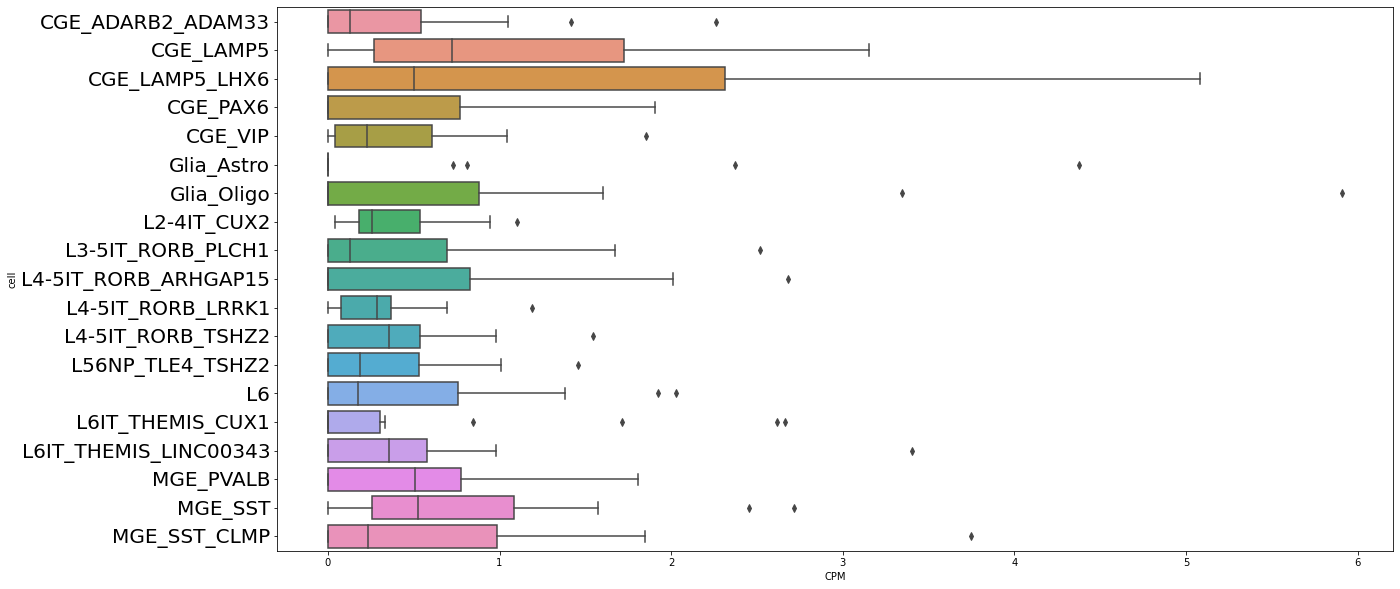

In [480]:
dict = pd.DataFrame()
all_counts = []
all_names = []
for cell in unq_cell:
    fill_v = []
    for s in samp_l:
        os.chdir(glob.glob('*' + s + '_*')[0])
        curr_cell = glob.glob(cell + '.*ATEM*')
        if len(curr_cell) == 0:
            fill_v = np.append(fill_v,0)
        else:
            count_mat = pd.read_csv(curr_cell[0], sep="\t", header=0) 
            count_sum = count_mat.groupby('gene_id').sum() #Sum counts for each element

            if t in count_sum.index:
                fill_v = np.append(fill_v,count_sum.loc[t]['CPM'])

            else:
                fill_v = np.append(fill_v,0)

        os.chdir('..')
    all_names = np.append(all_names,np.full(len(fill_v), cell))
    all_counts = np.append(all_counts, fill_v)

dict['cell'] = all_names
dict['CPM'] = all_counts

fig,ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=dict, y = 'cell', x='CPM')
plt.yticks(fontsize=20)
plt.show()

In [474]:
type(dict['counts'][0])

numpy.float64

<AxesSubplot:xlabel='cell', ylabel='counts'>

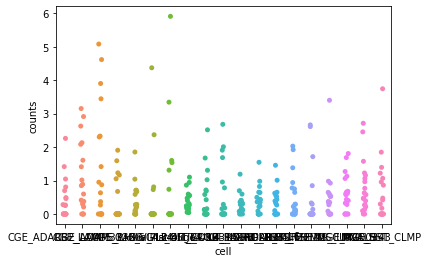

In [475]:
#plot stripplot of cells against samples
import seaborn as sns
sns.stripplot(data=dict, x = 'cell', y='counts')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

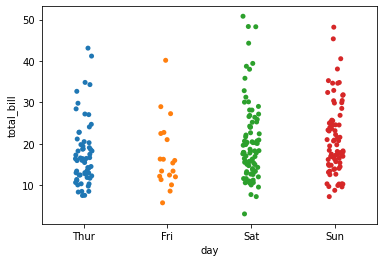

In [452]:
sns.stripplot(data=tips, x="day",y="total_bill")


In [462]:
#plot stripplot of cells against samples
import seaborn as sns
sns.stripplot(do, x = do['cell'].values, y=do['CPM'].values)

/home/dburrows/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [402]:
fill_v

array([0.])

In [390]:
count_sum = count_mat.groupby('gene_id').sum() #Sum counts for each element
count_sum

Start         End  Count         CPM
gene_id                                           
AluJb     550107699   550107959   13.0   32.900981
AluJo    1697232905  1697233285   19.0   48.086049
AluJr    1801648439  1801648899   23.0   58.209427
AluSc     344421195   344421275    4.0   10.123379
AluSc8    592528112   592528212    5.0   12.654223
AluSg     463632697   463632797    5.0   12.654223
AluSg7     73046944    73046964    1.0    2.530845
AluSp     179004492   179004572    4.0   10.123379
AluSq      51146291    51146371    4.0   10.123379
AluSq2   1197368507  1197368707   10.0   25.308447
AluSx    1265798266  1265798586   16.0   40.493515
AluSx1    693985279   693985479   10.0   25.308447
AluSx3    786400585   786400665    4.0   10.123379
AluSx4     21697352    21697372    1.0    2.530845
AluSz    1565330147  1565330587   22.0   55.678583
AluSz6   1039682032  1039682192    8.0   20.246757
AluY      377368497   377368617    6.0   15.185068
AluYa5   5480022975  5480024295   57.0  144.258146
L1PA16    348340418   348340458    2.0    5.061689
MIRc      260270121   260270181    3.0    7.592534

In [ ]:
for cell in unq_cell:
    for s in samp_l:
        os.chdir(glob.glob('*' + s + '_*')[0])
        if len(curr_cell)>0:
            curr_cell = glob.glob(cell + '.*ATEM*')
            count_mat = pd.read_csv(curr_cell[0], sep="\t", header=0) 
        os.chdir('..')


In [ ]:

count_mat = pd.read_csv(ATEM_path, sep="\t", header=0) 
count_sum = count_mat.groupby('gene_id').sum() #Sum counts for each element

#Calculate summed CPMs for each element
cpm_v =[]
for i in range(len(te)):
    if sum(te[i] == count_sum.index) > 0: cpm_v.append(count_sum[te[i] == count_sum.index]['Count'].values[0])
    else: cpm_v.append(0)
return cpm_v


In [370]:
os.chdir('/cndd3/dburrows/DATA/te/rna/CZI.counts/ATEM/pseudobulk/')
samp_l = dm['sequencing_id'].values

for cell in unq_cell:
    te = ev_df['element'].values
    dict = {'element':te}
    for s in samp_l:
        os.chdir(glob.glob('*' + s + '_*')[0])
        if len(curr_cell)>0:
            curr_cell = glob.glob(cell + '.*ATEM*')
            count_mat = pd.read_csv(curr_cell[0], sep="\t", header=0) 
        os.chdir('..')


In [ ]:
#Load ATEM counts table
count_mat = pd.read_csv(ATEM_path, sep="\t", header=0) 
count_sum = count_mat.groupby('gene_id').sum() #Sum counts for each element

In [380]:
count_sum

Start         End  Count        CPM
gene_id                                          
AluJb      74534579    74534599    1.0   3.377648
AluJo      33868311    33868331    1.0   3.377648
AluJr      71425526    71425566    2.0   6.755296
AluSc     373297811   373297911    5.0  16.888240
AluSc5     10533050    10533090    2.0   6.755296
AluSc8     48893010    48893050    2.0   6.755296
AluSg     130992384   130992444    3.0  10.132944
AluSg4    110356176   110356196    1.0   3.377648
AluSp     436712042   436712122    2.0   6.755296
AluSq     608105909   608106069    8.0  27.021185
AluSq2    305737685   305737825    7.0  23.643537
AluSx    1031409536  1031409856   16.0  54.042369
AluSx1    511172823   511172963    7.0  23.643537
AluSx3    342491212   342491372    8.0  27.021185
AluSz     840374767   840375007   12.0  40.531777
AluY     2546046171  2546046631   23.0  77.685906
AluYk2     49506066    49506086    1.0   3.377648
L1MC1     320801360   320801400    2.0   6.755296
MIRb      169773308   169773328    1.0   3.377648
MIRc      165514444   165514484    2.0   6.755296

In [381]:
count_sum = count_mat.groupby('gene_id').sum() #Sum counts for each element
count_sum.loc['L1MC1']

Start    3.208014e+08
End      3.208014e+08
Count    2.000000e+00
CPM      6.755296e+00
Name: L1MC1, dtype: float64

In [ ]:
t = 

In [ ]:
#Make gene x sample matrix for each cell type for DESEQ
os.chdir('/cndd3/dburrows/DATA/te/rna/CZI.counts/ATEM/pseudobulk/')
samp_l = dm['sequencing_id'].values

for cell in unq_cell:
    te = ev_df['element'].values
    dict = {'element':te}
    for s in samp_l:
        os.chdir(glob.glob('*' + s + '_*')[0])
        curr_cell = glob.glob(cell + '.*ATEM*')
        if len(curr_cell)!=0:
            te_v = ter.load_ATEM_family(curr_cell[0], te)

        else:
            te_v = np.zeros(len(te))

        assert len(te) == len(te_v), 'Error: Not all TE elements were counted'
        #Add to dict
        dict[s] = te_v

        #if len(curr_cell) == 0:
        os.chdir('..')
    df = pd.DataFrame(dict)
    #set first column to index
    df.set_index('element', inplace=True)
    df = df.astype(int)
    df+=1
    df.to_csv('/cndd3/dburrows/DATA/te/rna/CZI.counts/DESEQ/' + cell + '.ATEM.csv')
